# EDA ( Exploratory Data Analysis )
by Giovaldi JCDS Bandung

referensi bacaan

- https://www.geeksforgeeks.org/univariate-bivariate-and-multivariate-data-and-its-analysis/ Univariate, Bivariate, Multivariate
- https://python-graph-gallery.com buat seaborn,matplotlib, wordcloud
- https://python-visualization.github.io/folium/ buat folium
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html buat pandas
- https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html buat pandas pivot table

# GOALS

- Mendapatkan analisis data Airbnb yang legal berdasarkan aturan "Minpaku Law" mengenai maksimum hari dapat beroperasinya sebuah Airbnb pertahun.
- Mendapatkan analisis tentang perkembangan untuk Airbnb yang berlokasi dekat dengan venue yang akan dipakai pada 2020 Olympics.

# Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster,HeatMap
import seaborn as sns
import wordcloud
from wordcloud import WordCloud
import scipy
from scipy import stats
from feature_engine.outlier_removers import Winsorizer
from collections import Counter
import math
import scipy.stats as ss

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [2]:
print('pandas version:', pd.__version__,'per Agustus 2020')
print('numpy version:', np.__version__,'per Agustus 2020')
print('folium version:', folium.__version__,'per Agustus 2020')
print('matplotlib version:', matplotlib.__version__,'per Agustus 2020')
print('seaborn version:', sns.__version__,'per Agustus 2020')
print('wordcloud version:', wordcloud.__version__,'per Agustus 2020')
print('scipy version:', scipy.__version__,'per Agustus 2020')

pandas version: 1.1.0 per Agustus 2020
numpy version: 1.19.1 per Agustus 2020
folium version: 0.11.0 per Agustus 2020
matplotlib version: 3.1.3 per Agustus 2020
seaborn version: 0.10.0 per Agustus 2020
wordcloud version: 1.7.0 per Agustus 2020
scipy version: 1.4.1 per Agustus 2020


In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

# Import Data

In [4]:
airbnb = pd.read_csv('./Desktop/airbnbl1.csv')

In [5]:
airbnb.head()

listing_url       scrape_id last_scraped  \
0   https://www.airbnb.com/rooms/35303  20200530034812   2020-05-30   
1  https://www.airbnb.com/rooms/197677  20200530034812   2020-05-30   
2  https://www.airbnb.com/rooms/289597  20200530034812   2020-05-30   
3  https://www.airbnb.com/rooms/370759  20200530034812   2020-05-30   
4  https://www.airbnb.com/rooms/700253  20200530034812   2020-05-30   

                                                name experiences_offered  \
0  La Casa Gaienmae C Harajuku, Omotesando is nearby                none   
1                          Oshiage Holiday Apartment                none   
2                  Private apt in central Tokyo #203                none   
3  Cozy flat #203, local area YET 10 mins to shib...                none   
4                  Private apt in central Tokyo #201                none   

                                         picture_url  host_id  \
0  https://a0.muscache.com/im/pictures/67365319/c...   151977   
1  https://a0.muscache.com/im/pictures/38437056/d...   964081   
2  https://a0.muscache.com/im/pictures/6454753/a8...   341577   
3  https://a0.muscache.com/im/pictures/34594282-f...  1573631   
4  https://a0.muscache.com/im/pictures/9888693/af...   341577   

                                    host_url            host_name  host_since  \
0   https://www.airbnb.com/users/show/151977               Miyuki  2010-06-25   
1   https://www.airbnb.com/users/show/964081      Yoshimi & Marek  2011-08-13   
2   https://www.airbnb.com/users/show/341577             Hide&Kei  2011-01-10   
3  https://www.airbnb.com/users/show/1573631  Gilles,Mayumi,Taiki  2012-01-06   
4   https://www.airbnb.com/users/show/341577             Hide&Kei  2011-01-10   

           host_location  host_response_rate  host_acceptance_rate  \
0  Shibuya, Tokyo, Japan           96.488942                 100.0   
1                  Tokyo          100.000000                  86.0   
2           Tokyo, Japan          100.000000                  82.0   
3     Imari, Saga, Japan          100.000000                  92.0   
4           Tokyo, Japan          100.000000                  82.0   

  host_is_superhost                                 host_thumbnail_url  \
0                 f  https://a0.muscache.com/im/users/151977/profil...   
1                 t  https://a0.muscache.com/im/users/964081/profil...   
2                 f  https://a0.muscache.com/im/users/341577/profil...   
3                 t  https://a0.muscache.com/im/pictures/user/a419d...   
4                 f  https://a0.muscache.com/im/users/341577/profil...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/users/151977/profil...   Shibuya District   
1  https://a0.muscache.com/im/users/964081/profil...    Sumida District   
2  https://a0.muscache.com/im/users/341577/profil...    Nerima District   
3  https://a0.muscache.com/im/pictures/user/a419d...  Setagaya District   
4  https://a0.muscache.com/im/users/341577/profil...    Nerima District   

   host_listings_count  host_total_listings_count  \
0                  3.0                        3.0   
1                  1.0                        1.0   
2                  2.0                        2.0   
3                  3.0                        3.0   
4                  2.0                        2.0   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'facebook', 'reviews', 'jum...                    t   
1  ['email', 'phone', 'facebook', 'reviews', 'jum...                    t   
2  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   
3  ['email', 'phone', 'facebook', 'reviews', 'jum...                    t   
4  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   

  host_identity_verified                 street      neighbourhood  \
0                      t  Shibuya, Tokyo, Japan   Shibuya District   
1                      t  

# UNIVARIATE
- numerical features
- categorical features
- datetime

In [6]:
airbnb.columns # mengeluarkan kolom

Index(['listing_url', 'scrape_id', 'last_scraped', 'name',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maxim

In [7]:
airbnb_describe =[]

for i in airbnb.columns:
    airbnb_describe.append([
        i,
        airbnb[i].dtypes,
        airbnb[i].isna().sum(),
        round((((airbnb[i].isna().sum())/(len(airbnb)))*100),2),
        airbnb[i].nunique(),
        airbnb[i].unique()
    ])

In [8]:
DESC = pd.DataFrame(airbnb_describe, columns=['column','type','nan','nan%','nunique','unique'])
DESC

column     type  nan  nan%  nunique  \
0                                    listing_url   object    0   0.0    12600   
1                                      scrape_id    int64    0   0.0        1   
2                                   last_scraped   object    0   0.0        2   
3                                           name   object    0   0.0    11669   
4                            experiences_offered   object    0   0.0        1   
5                                    picture_url   object    0   0.0    11962   
6                                        host_id    int64    0   0.0     3236   
7                                       host_url   object    0   0.0     3236   
8                                      host_name   object    0   0.0     2266   
9                                     host_since   object    0   0.0     1638   
10                                 host_location   object    0   0.0      296   
11                            host_response_rate  float64    0   0.0       34   
12                          host_acceptance_rate  float64    0   0.0       66   
13                             host_is_superhost   object    0   0.0        2   
14                            host_thumbnail_url   object    0   0.0     3235   
15                              host_picture_url   object    0   0.0     3235   
16                            host_neighbourhood   object    0   0.0       59   
17                           host_listings_count  float64    0   0.0       68   
18                     host_total_listings_count  float64    0   0.0       68   
19                            host_verifications   object    0   0.0      203   
20                          host_has_profile_pic   object    0   0.0        2   
21                        host_identity_verified   object    0   0.0        2   
22                                        street   object    0   0.0      513   
23                                 neighbourhood   object    0   0.0       37   
24                        neighbourhood_cleansed   object    0   0.0       55   
25                                          city   object    0   0.0      348   
26                                         state   object    0   0.0       35   
27                                        market   object    0   0.0        2   
28                                smart_location   object    0   0.0      349   
29                                  country_code   object    0   0.0        1   
30                                       country   object    0   0.0        1   
31                                      latitude  float64    0   0.0     7186   
32                                     longitude  float64    0   0.0     8332   
33                             is_location_exact   object    0   0.0        2   
34                                 property_type   object    0   0.0       28   
35                                     room_type   object    0   0.0        4   
36                                  accommodates    int64    0   0.0       16   
37                                     bathrooms  float64    0   0.0       30   
38                                      bedrooms  float64    0   0.0       23   
39                                          beds  float64    0   0.0       30   
40                                      bed_type   object    0   0.0        4   
41                                     amenities   object    0   0.0     9182   
42                                         price  float64    0   0.0      544   
43                              security_deposit  float64    0   0.0      178   
44                                  cleaning_fee  float64    0   0.0      469   
45                               guests_included    int64    0   0.0       20   
46                                  extra_people  float64    0   0.0      216   
47                                minimum_nights    int64    0   0.0       33   
48                                maximum_nights    int64    0   0.0     

Berdasarkan data diatas, dapat dilihat bahwa NaN sudah tidak ada di keseluruhan 85 kolom ini. Berdasarkan penelusuran ini, ada beberapa kolom yang rancu atau serupa seperti minimum_maximum_nights, dan maximum_minmum_nights yang memiliki isi data yang serupa. Lalu ada juga yang lain seperti neighbourhood,neighbourhood_cleansed,city. Hal ini membuat saya harus memilih langkah FEATURE SELECTION agar kedepannya tidak membuat analisis yang ambigu terkait kemiripan kolom-kolom tersebut. FEATURE SELECTION akan dilakukan dengan theils U dan Heatmap.

In [9]:
airbnb.describe().T

count          mean  \
scrape_id                                     12600.0  2.020053e+13   
host_id                                       12600.0  1.717053e+08   
host_response_rate                            12600.0  9.648894e+01   
host_acceptance_rate                          12600.0  9.707111e+01   
host_listings_count                           12600.0  1.529960e+01   
host_total_listings_count                     12600.0  1.529960e+01   
latitude                                      12600.0  3.569490e+01   
longitude                                     12600.0  1.397354e+02   
accommodates                                  12600.0  4.484841e+00   
bathrooms                                     12600.0  1.334008e+00   
bedrooms                                      12600.0  1.370317e+00   
beds                                          12600.0  2.752460e+00   
price                                         12600.0  2.651892e+04   
security_deposit                              12600.0  1.223576e+04   
cleaning_fee                                  12600.0  6.153630e+03   
guests_included                               12600.0  2.350556e+00   
extra_people                                  12600.0  1.423890e+03   
minimum_nights                                12600.0  3.372937e+00   
maximum_nights                                12600.0  6.630230e+02   
minimum_minimum_nights                        12600.0  3.168333e+00   
maximum_minimum_nights                        12600.0  4.663810e+00   
minimum_maximum_nights                        12600.0  7.681067e+02   
maximum_maximum_nights                        12600.0  7.736447e+02   
minimum_nights_avg_ntm                        12600.0  3.763730e+00   
maximum_nights_avg_ntm                        12600.0  7.726316e+02   
availability_30                               12600.0  2.097119e+01   
availability_60                               12600.0  4.429151e+01   
availability_90                               12600.0  6.769738e+01   
availability_365                              12600.0  1.805533e+02   
number_of_reviews                             12600.0  2.675690e+01   
number_of_reviews_ltm                         12600.0  1.100286e+01   
review_scores_rating                          12600.0  9.331270e+01   
review_scores_accuracy                        12600.0  9.557432e+00   
review_scores_cleanliness                     12600.0  9.378958e+00   
review_scores_checkin                         12600.0  9.687452e+00   
review_scores_communication                   12600.0  9.756111e+00   
review_scores_location                        12600.0  9.551905e+00   
review_scores_value                           12600.0  9.214524e+00   
calculated_host_listings_count                12600.0  1.373111e+01   
calculated_host_listings_count_entire_homes   12600.0  8.949286e+00   
calculated_host_listings_count_private_rooms  12600.0  2.831667e+00   
calculated_host_listings_count_shared_rooms   12600.0  6.612698e-01   
reviews_per_month                             12600.0  1.595049e+00   

                                                       std           min  \
scrape_id                                     3.433730e+00  2.020053e+13   
host_id                                       1.015409e+08  1.519770e+05   
host_response_rate                            1.130988e+01  0.000000e+00   
host_acceptance_rate                          8.984109e+00  0.000000e+00   
host_listings_count                           2.320154e+01  0.000000e+00   
host_total_listings_count                     2.320154e+01  0.000000e+00   
latitude                                      1.554545e-01  2.707233e+01   
longitude                                     8.243526e-02  1.391232e+02   
accommodates                                  3.201356e+00  1.000000e+00   
bathrooms                                     1.153958e+00  0.000000e+00   
bedrooms                                      1.465320e+00  0.000000e+00   
beds       

Berdasarkan data diatas dan juga penelusuran sebelumnya, banyak ditemukan data dengan outliers di dalamnya, sehingga akan lebih baik untuk dihandle agar tidak menjadi rancu dalam memvisualisasikan suatu data. Cara handle yang saya lakukan adalah windsoriser agar isi data masih dapat digunakan atau tidak dihapus yang menyebabkan informasi hilang. Akan tetapi sebelumnya saya akan melihat dahulu visualisasi data2nya di univariate untuk nantinya menjadi landasan melakukan handling outliers

In [10]:
airbnb.shape[0] # baris

12600

In [11]:
airbnb.shape[1] # kolom

85

# FEATURE SELECTION

# Theils U
untuk melihat asosiasi antar kolom categorical. Asosiasi diibaratkan keterkaitan kolom tersebut dengan yang lain. selain itu, thelis U digunakan karena memiliki sifat yang asimetris/uncertainty coefficient

In [12]:
def conditional_entropy(x,y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theils_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

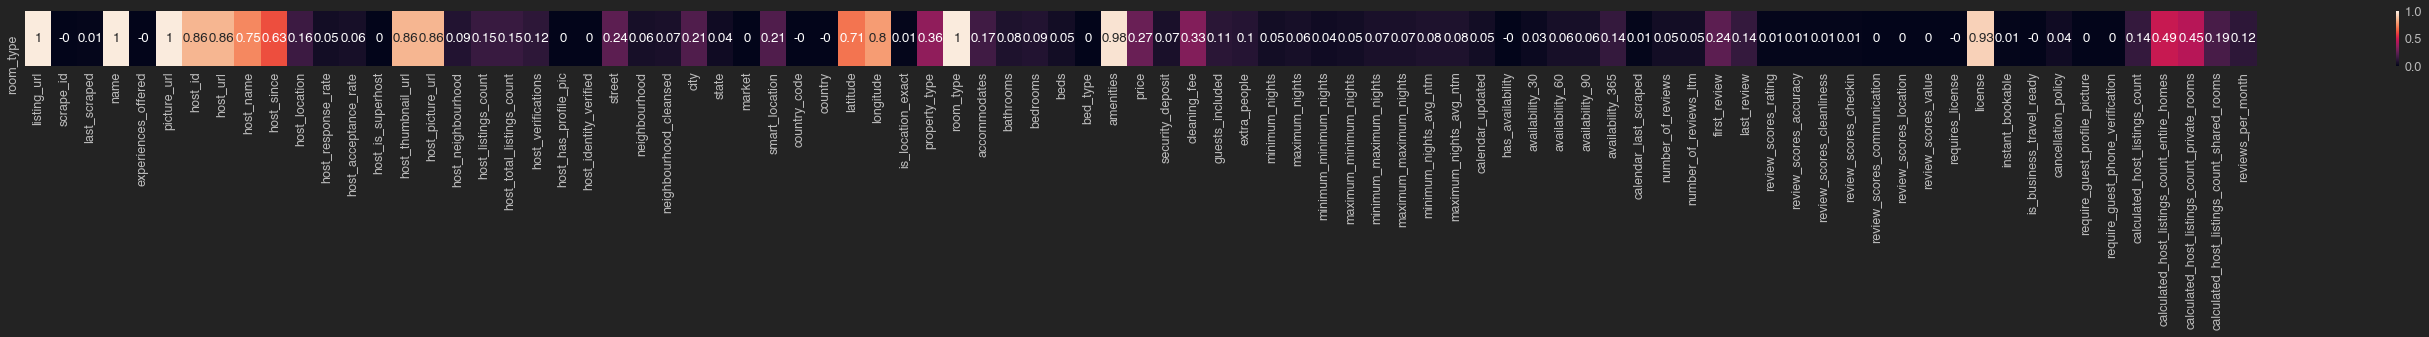

In [13]:
asosiasi_theils_u = []
for i in list(airbnb.columns):
    x = round((theils_u(airbnb['room_type'], airbnb[i])),2)
    asosiasi_theils_u.append(x)
    
data = pd.DataFrame(data=[asosiasi_theils_u], columns=list(airbnb.columns), index=['room_type'])
plt.figure(figsize=(50,1))
sns.heatmap(data, annot=True)

Berdasarkan visualisasi diatas, dapat dilihat bahwa kolom room_type memiliki asosiasi yang beragam dari range 0-1. Yang akan saya ambil adalah yang memiliki range tinggi atau mendekati satu karena hal tersebut menandakan kolom tersebut berhubungan/berkaitan. Akan tetapi angka asosiasi 1 seharusnya hanya ada pada kolom itu sendiri. sehingga apabila ada kolom dengan asosiasi sama, maka hal tersebut diperkirakan data yang serupa sehingga tidak akan dipilih.

# HEATMAP
heatmap bertujuan untuk melihat korelasi antar numerical data. Korelasi disini menunjukan pengaruh antar kolom-kolom numerical tersebut. Berbeda dengan asosiasi, korelasi dibagi menjadi dua yaitu korelasi positif dan negatif. Hal tersebut akan dijelaskan dibawah berdasarkan visualisasi Heatmap yang saya dapatkan. Sebelum melakukan uji korelasi, saya akan melihat skew di dataset Airbnb untuk melihat distribusi data ini untuk menentukan Heatmap yang akan saya pakai nantinya

In [14]:
airbnb.skew()

scrape_id                                        0.000000
host_id                                         -0.069634
host_response_rate                              -5.927533
host_acceptance_rate                            -5.292959
host_listings_count                              3.173786
host_total_listings_count                        3.173786
latitude                                       -43.139002
longitude                                        4.837166
accommodates                                     1.623815
bathrooms                                       12.171237
bedrooms                                        14.521297
beds                                             6.025617
price                                            9.955357
security_deposit                                11.483211
cleaning_fee                                     2.686769
guests_included                                  2.723961
extra_people                                     3.962313
minimum_nights

Berdasarkan uji skew diatas, ditemukan bahwa kolom banyak yang tidak terdistribusi normal sehingga akan dilakukan uji korelasi "spearman"

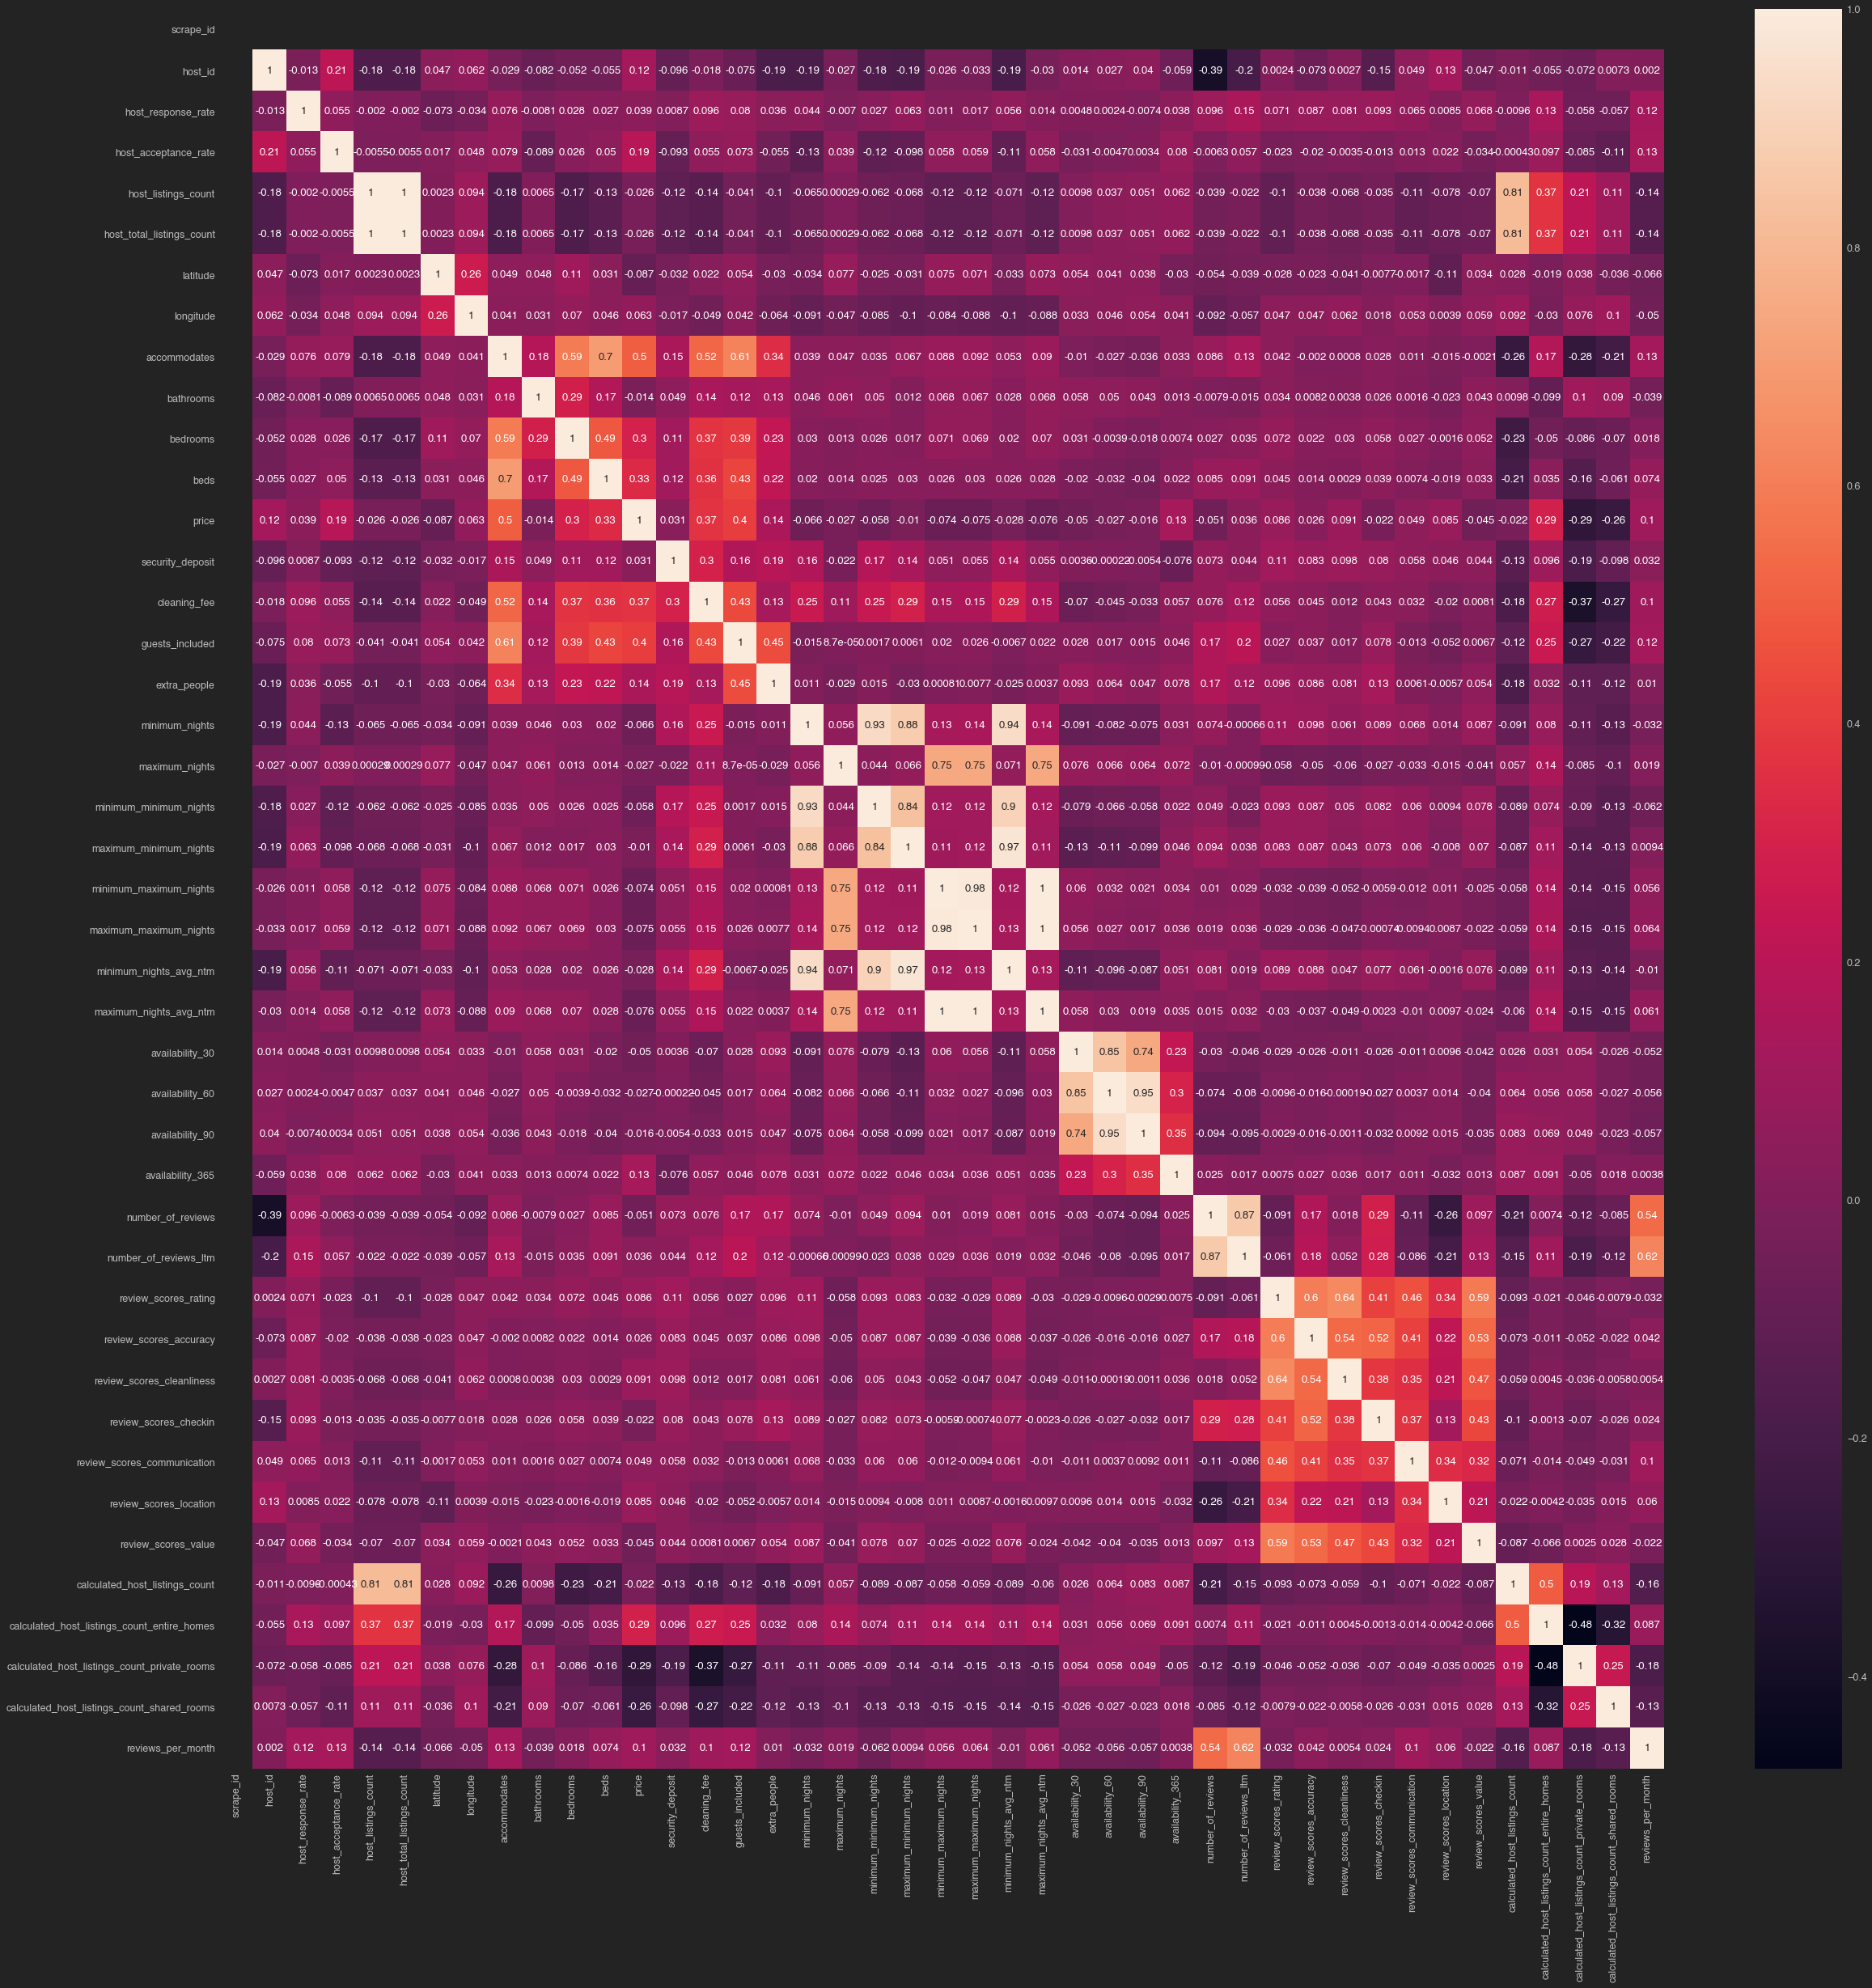

In [15]:
plt.figure(figsize=(40, 40))
sns.heatmap(airbnb.corr('spearman'),annot=True)
plt.savefig('Corr.png')

Berdasrkan data ini dapat dilihat bahwa korelasi di target "price" sangat beragam. Korelasi positif mengartikan bahwa pengaruh kolom tersebut sejalan. Sedangkan negatif maka pengaruh kolom tersebut memiliki pengaruh yang terbalik. Korelasi positif yang sangat baik saya dapatkan di Accommodates. Kedua jenis korelasi ini akan sangat berguna untuk feature selection

In [16]:
airbnb.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maxim

In [17]:
airbnb = airbnb[['host_id','name','host_is_superhost','host_verifications','host_identity_verified','neighbourhood_cleansed','host_since','property_type','room_type','amenities','license','instant_bookable','cancellation_policy','reviews_per_month','review_scores_rating','availability_365','guests_included','beds','bedrooms','accommodates','longitude','latitude','host_acceptance_rate','host_response_rate','price','security_deposit', 'cleaning_fee', 'extra_people']]

In [18]:
airbnb.head()

host_id                                               name  \
0   151977  La Casa Gaienmae C Harajuku, Omotesando is nearby   
1   964081                          Oshiage Holiday Apartment   
2   341577                  Private apt in central Tokyo #203   
3  1573631  Cozy flat #203, local area YET 10 mins to shib...   
4   341577                  Private apt in central Tokyo #201   

  host_is_superhost                                 host_verifications  \
0                 f  ['email', 'phone', 'facebook', 'reviews', 'jum...   
1                 t  ['email', 'phone', 'facebook', 'reviews', 'jum...   
2                 f  ['email', 'phone', 'reviews', 'jumio', 'govern...   
3                 t  ['email', 'phone', 'facebook', 'reviews', 'jum...   
4                 f  ['email', 'phone', 'reviews', 'jumio', 'govern...   

  host_identity_verified neighbourhood_cleansed  host_since property_type  \
0                      t             Shibuya Ku  2010-06-25     Apartment   
1                      t              Sumida Ku  2011-08-13     Apartment   
2                      t              Nerima Ku  2011-01-10     Apartment   
3                      t            Setagaya Ku  2012-01-06     Apartment   
4                      t              Nerima Ku  2011-01-10     Apartment   

         room_type                                          amenities  \
0     Private room  {TV,Internet,Wifi,Kitchen,"Paid parking off pr...   
1  Entire home/apt  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
2  Entire home/apt  {TV,Wifi,"Air conditioning",Kitchen,"Hot tub",...   
3  Entire home/apt  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
4  Entire home/apt  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   

                                             license instant_bookable  \
0  Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...                f   
1                                         M130003350                f   
2  Other reasons | 1か月以上の賃貸借契約のみ対応とする。ゲストには賃貸契約の署...                f   
3  Other reasons | We called Setagaya ku hokenjo ...                f   
4  Other reasons | 1か月以上の賃貸借契約のみ対応とする。ゲストには賃貸契約の署...                f   

           cancellation_policy  reviews_per_month  review_scores_rating  \
0  strict_14_with_grace_period               0.18                  94.0   
1                     moderate               1.56                  95.0   
2  strict_14_with_grace_period               1.17                  95.0   
3                     moderate               1.37                  95.0   
4  strict_14_with_grace_period               1.12                  96.0   

   availability_365  guests_included  beds  bedrooms  accommodates  longitude  \
0                89                1   1.0       1.0             1  139.71203   
1               270                1   2.0       1.0             2  139.82596   
2               242                1   1.0       1.0             2  139.65810   
3               364                1   1.0       0.0             2  139.65707   
4               353                1   1.0       1.0             2  139.65832   

   latitude  host_acceptance_rate  host_response_rate    price  \
0  35.67152                 100.0           96.488942   4192.0   
1  35.71721                  86.0          100.000000  10965.0   
2  35.74267                  82.0          100.000000   4192.0   
3  35.66443                  92.0          100.000000   6987.0   
4  35.74264                  82.0          100.000000   3977.0   

   security_deposit  cleaning_fee  extra_people  
0           30000.0        5000.0           0.0  
1           40000.0        5000.0           0.0  
2           32250.0        5375.0        1075.0  
3           20000.0        6000.0           0.0  
4           32250.0        5375.0        1075.0

In [19]:
# airbnb.to_csv('./Desktop/airbnb__1.csv',index=False)

# NUMERICAL FEATURES

In [20]:
numerical_feature = [feature for feature in airbnb.columns if airbnb[feature].dtypes != 'O'] #list comprehention untuk menyeleksi untuk setiap kolom di airbnb jika bukan object
print ('Number of numerical feature:' , len(numerical_feature)) # untuk memprint jumlah numerical feature

airbnb[numerical_feature].head() # mengeluarkan lima data teratas

Number of numerical feature: 16


host_id  reviews_per_month  review_scores_rating  availability_365  \
0   151977               0.18                  94.0                89   
1   964081               1.56                  95.0               270   
2   341577               1.17                  95.0               242   
3  1573631               1.37                  95.0               364   
4   341577               1.12                  96.0               353   

   guests_included  beds  bedrooms  accommodates  longitude  latitude  \
0                1   1.0       1.0             1  139.71203  35.67152   
1                1   2.0       1.0             2  139.82596  35.71721   
2                1   1.0       1.0             2  139.65810  35.74267   
3                1   1.0       0.0             2  139.65707  35.66443   
4                1   1.0       1.0             2  139.65832  35.74264   

   host_acceptance_rate  host_response_rate    price  security_deposit  \
0                 100.0           96.488942   4192.0           30000.0   
1                  86.0          100.000000  10965.0           40000.0   
2                  82.0          100.000000   4192.0           32250.0   
3                  92.0          100.000000   6987.0           20000.0   
4                  82.0          100.000000   3977.0           32250.0   

   cleaning_fee  extra_people  
0        5000.0           0.0  
1        5000.0           0.0  
2        5375.0        1075.0  
3        6000.0           0.0  
4        5375.0        1075.0

terdapat 16 kolom numerical di dataset ini, akan tetapi host_id akan diperlakukan sebagai kolom categorical krn tidak akan ada kalkulasi yang diperlukan di kolom tersebut. 

# DATETIME

In [21]:
datetime_feature = [feature for feature in airbnb.columns if 'since' in feature ] # list comprehension untuk menyeleksi kolom yang mengandung 'since' untuk dimasukkan dalam datetime
print ('Number of datetime features:' , len(datetime_feature))

airbnb[datetime_feature].head()

Number of datetime features: 1


host_since
0  2010-06-25
1  2011-08-13
2  2011-01-10
3  2012-01-06
4  2011-01-10

In [74]:
airbnb['host_since'] = pd.to_datetime(airbnb['host_since']) #membuat tahun bulan pada kolom baru
airbnb['year']= airbnb['host_since'].dt.year
airbnb['month'] = airbnb['host_since'].dt.month
airbnb['day']=airbnb['host_since'].dt.day

# CATEGORICAL FEATURES

In [35]:
categorical_feature = [feature for feature in airbnb.columns if airbnb[feature].dtypes == 'O']  #list comprehention untuk menyeleksi untuk setiap kolom di airbnb jika object
print ('Number of categorical feature:' , len(categorical_feature))

airbnb[categorical_feature].head()

Number of categorical feature: 12


name host_is_superhost  \
0  La Casa Gaienmae C Harajuku, Omotesando is nearby                 f   
1                          Oshiage Holiday Apartment                 t   
2                  Private apt in central Tokyo #203                 f   
3  Cozy flat #203, local area YET 10 mins to shib...                 t   
4                  Private apt in central Tokyo #201                 f   

                                  host_verifications host_identity_verified  \
0  ['email', 'phone', 'facebook', 'reviews', 'jum...                      t   
1  ['email', 'phone', 'facebook', 'reviews', 'jum...                      t   
2  ['email', 'phone', 'reviews', 'jumio', 'govern...                      t   
3  ['email', 'phone', 'facebook', 'reviews', 'jum...                      t   
4  ['email', 'phone', 'reviews', 'jumio', 'govern...                      t   

  neighbourhood_cleansed  host_since property_type        room_type  \
0             Shibuya Ku  2010-06-25     Apartment     Private room   
1              Sumida Ku  2011-08-13     Apartment  Entire home/apt   
2              Nerima Ku  2011-01-10     Apartment  Entire home/apt   
3            Setagaya Ku  2012-01-06     Apartment  Entire home/apt   
4              Nerima Ku  2011-01-10     Apartment  Entire home/apt   

                                           amenities  \
0  {TV,Internet,Wifi,Kitchen,"Paid parking off pr...   
1  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
2  {TV,Wifi,"Air conditioning",Kitchen,"Hot tub",...   
3  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
4  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   

                                             license instant_bookable  \
0  Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...                f   
1                                         M130003350                f   
2  Other reasons | 1か月以上の賃貸借契約のみ対応とする。ゲストには賃貸契約の署...                f   
3  Other reasons | We called Setagaya ku hokenjo ...                f   
4  Other reasons | 1か月以上の賃貸借契約のみ対応とする。ゲストには賃貸契約の署...                f   

           cancellation_policy  
0  strict_14_with_grace_period  
1                     moderate  
2  strict_14_with_grace_period  
3                     moderate  
4  strict_14_with_grace_period

Terdapat 11 kolom categorical di kolom ini, lalu ada kolom-kolom yang berbentuk list seperti amenities. Kolom-kolom tersebut akan dilakukan visualisasi wordcloud nantinya untuk melihat pembobotan untuk setiap kata di dalam list tersebut. Lalu ada kolom dengan hanya dua unique yang mana akan lebih informatif jika di replace huruf tersebut dengan kata. 

# NUMERICAL FEATURE - Univariate

In [24]:
airbnb[numerical_feature].columns # mengeluarkan kolom

Index(['host_id', 'reviews_per_month', 'review_scores_rating',
       'availability_365', 'guests_included', 'beds', 'bedrooms',
       'accommodates', 'longitude', 'latitude', 'host_acceptance_rate',
       'host_response_rate', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people'],
      dtype='object')

In [25]:
airbnb.skew()

host_id                 -0.069634
reviews_per_month        3.268446
review_scores_rating    -3.059085
availability_365         0.279219
guests_included          2.723961
beds                     6.025617
bedrooms                14.521297
accommodates             1.623815
longitude                4.837166
latitude               -43.139002
host_acceptance_rate    -5.292959
host_response_rate      -5.927533
price                    9.955357
security_deposit        11.483211
cleaning_fee             2.686769
extra_people             3.962313
year                    -0.577091
month                   -0.060396
day                      0.080724
dtype: float64

https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

Berdasarkan uji skewness diatas, dapat diihat bahwa banyak data yang tidak terdistribusi normal. Berdasarkan data ini banyak skewness positif yang menandakan sebagian distribusi berada di sebelah kiri atau nilai yang kecil. Apabila kita ambil satu contoh disini, yaitu kolom target Price. Hal ini menandakan bahwa banyak harga sewa yang berhasil di rent dibawah rata-rata. Apakah ini hal buruk? tentu buruk, karena hal ini juga menandakan banyak outliers yang membuat hal ini terjadi.

In [23]:
airbnb.kurt()

host_id                   -1.283122
reviews_per_month         38.346885
review_scores_rating      17.403529
availability_365          -1.080939
guests_included           12.414123
beds                      80.668702
bedrooms                 393.597009
accommodates               2.676270
longitude                195.412886
latitude                2275.789811
host_acceptance_rate      35.983108
host_response_rate        42.315746
price                    116.182029
security_deposit         172.308154
cleaning_fee              18.200556
extra_people              53.892832
dtype: float64

https://thomassoseco.blogspot.com/2019/02/skewness-dan-kurtosis.html

Berdasarkan uji Kurtosis diatas, banyak ditemukan derajat keruncingan (tailedness) yang besar/melebihi 3. Kurtosis yang tinggi menandakan banyak outliers. Bila kita ambil contoh disini, bedrooms kemungkinan banyak yang memiliki distribusi di angka yang kecil akan tetapi kemungkinan ada airbnb yang memiliki nilai bedroom melebihi angka wajar. Tentu banyak alasan di dalamnya. Oleh karena itu, saya akan melihat data dengan nilai bedrooms terbesar untuk menelaah lebih dalam apakah terjadi kesalahan ketik atau benar adanya.

In [24]:
airbnb['bedrooms'].max()

50.0

In [25]:
bedroommax = airbnb[(airbnb['bedrooms']==50)]

In [26]:
bedroommax

host_id                                               name  \
1223  12014384  ｼﾝｸﾞﾙお1人様からどうぞ Guests with Rooms of S,D,Twin,T...   
1224  12014384   お1人様~専用個室｡日暮里駅至近! Tokyo Guest House 2020-Opening   

     host_is_superhost                                 host_verifications  \
1223                 f  ['email', 'phone', 'reviews', 'offline_governm...   
1224                 f  ['email', 'phone', 'reviews', 'offline_governm...   

     host_identity_verified neighbourhood_cleansed  host_since property_type  \
1223                      f             Arakawa Ku  2014-02-07     Apartment   
1224                      f             Arakawa Ku  2014-02-07   Condominium   

         room_type                                          amenities  \
1223  Private room  {TV,Wifi,"Air conditioning",Kitchen,Heating,"F...   
1224  Private room  {TV,Wifi,"Air conditioning",Kitchen,"Hot tub",...   

                                                license instant_bookable  \
1223  Hotels and Inns Business Act | 荒川保健所 | 28荒保衛環き...                f   
1224  Hotels and Inns Business Act | 荒川保健所 | ２８荒保衛環き...                f   

              cancellation_policy  reviews_per_month  review_scores_rating  \
1223  strict_14_with_grace_period               0.05                  80.0   
1224  strict_14_with_grace_period               0.13                  90.0   

      availability_365  guests_included  beds  bedrooms  accommodates  \
1223               365                1  50.0      50.0            16   
1224               179                1  36.0      50.0            16   

      longitude  latitude  host_acceptance_rate  host_response_rate   price  \
1223  139.77187  35.74533                  96.0               100.0  2365.0   
1224  139.77200  35.74387                  96.0               100.0  3010.0   

      security_deposit  cleaning_fee  extra_people  
1223               0.0        2150.0        1290.0  
1224               0.0        2000.0        1500.0

Berdasakan data ini, dapat dilihat terdapat 2 airbnb yang memiliki angka 50 yang mana berlokasi di neighbourhood yang sama yaitu Arakawa Ku. Setelah ditelaah lebih dalam kedua Airbnb/listing ini benar adanya atau bukan kesalahan ketik/human error. Airbnb ini pun dimiliki oleh host yang sama bernama Niiyama. Airbnb ini sudah disewakan sudah cukup lama dan berfokus kepada komunitas-komunitas yang ingin berlibur. Dapat dilihat dari review-reviewnya, penyewa biasanya berasal dari komunitas kantor, keluarga, komunitas internasional, dan lain-lain. 

https://www.airbnb.com/rooms/17600334

https://www.airbnb.com/rooms/17600537

In [27]:
def diagnostic_plots(airbnb,variabel): # fungsi def untuk memplot istribusi kolom di dataset airbnb
    #ukuran
    plt.figure(figsize=(32,10)) #ukuran kesamping dan kebawah
    #histogram
    plt.subplot(1,2,1) #row, kolom, index
    sns.distplot(airbnb[variabel],bins=30) #distplot untuk memplot distribusi univariate dengan interval dibagi 30
    plt.title("Histogram") #titel/judul
    # Boxplot
    plt.subplot(1,2,2)#row,kolom,index
    sns.boxplot(y=airbnb[variabel]) #menggunakan plot boxplot 
    plt.title("Boxplot") #titel/judul
    
    plt.show() #mengeluarkan

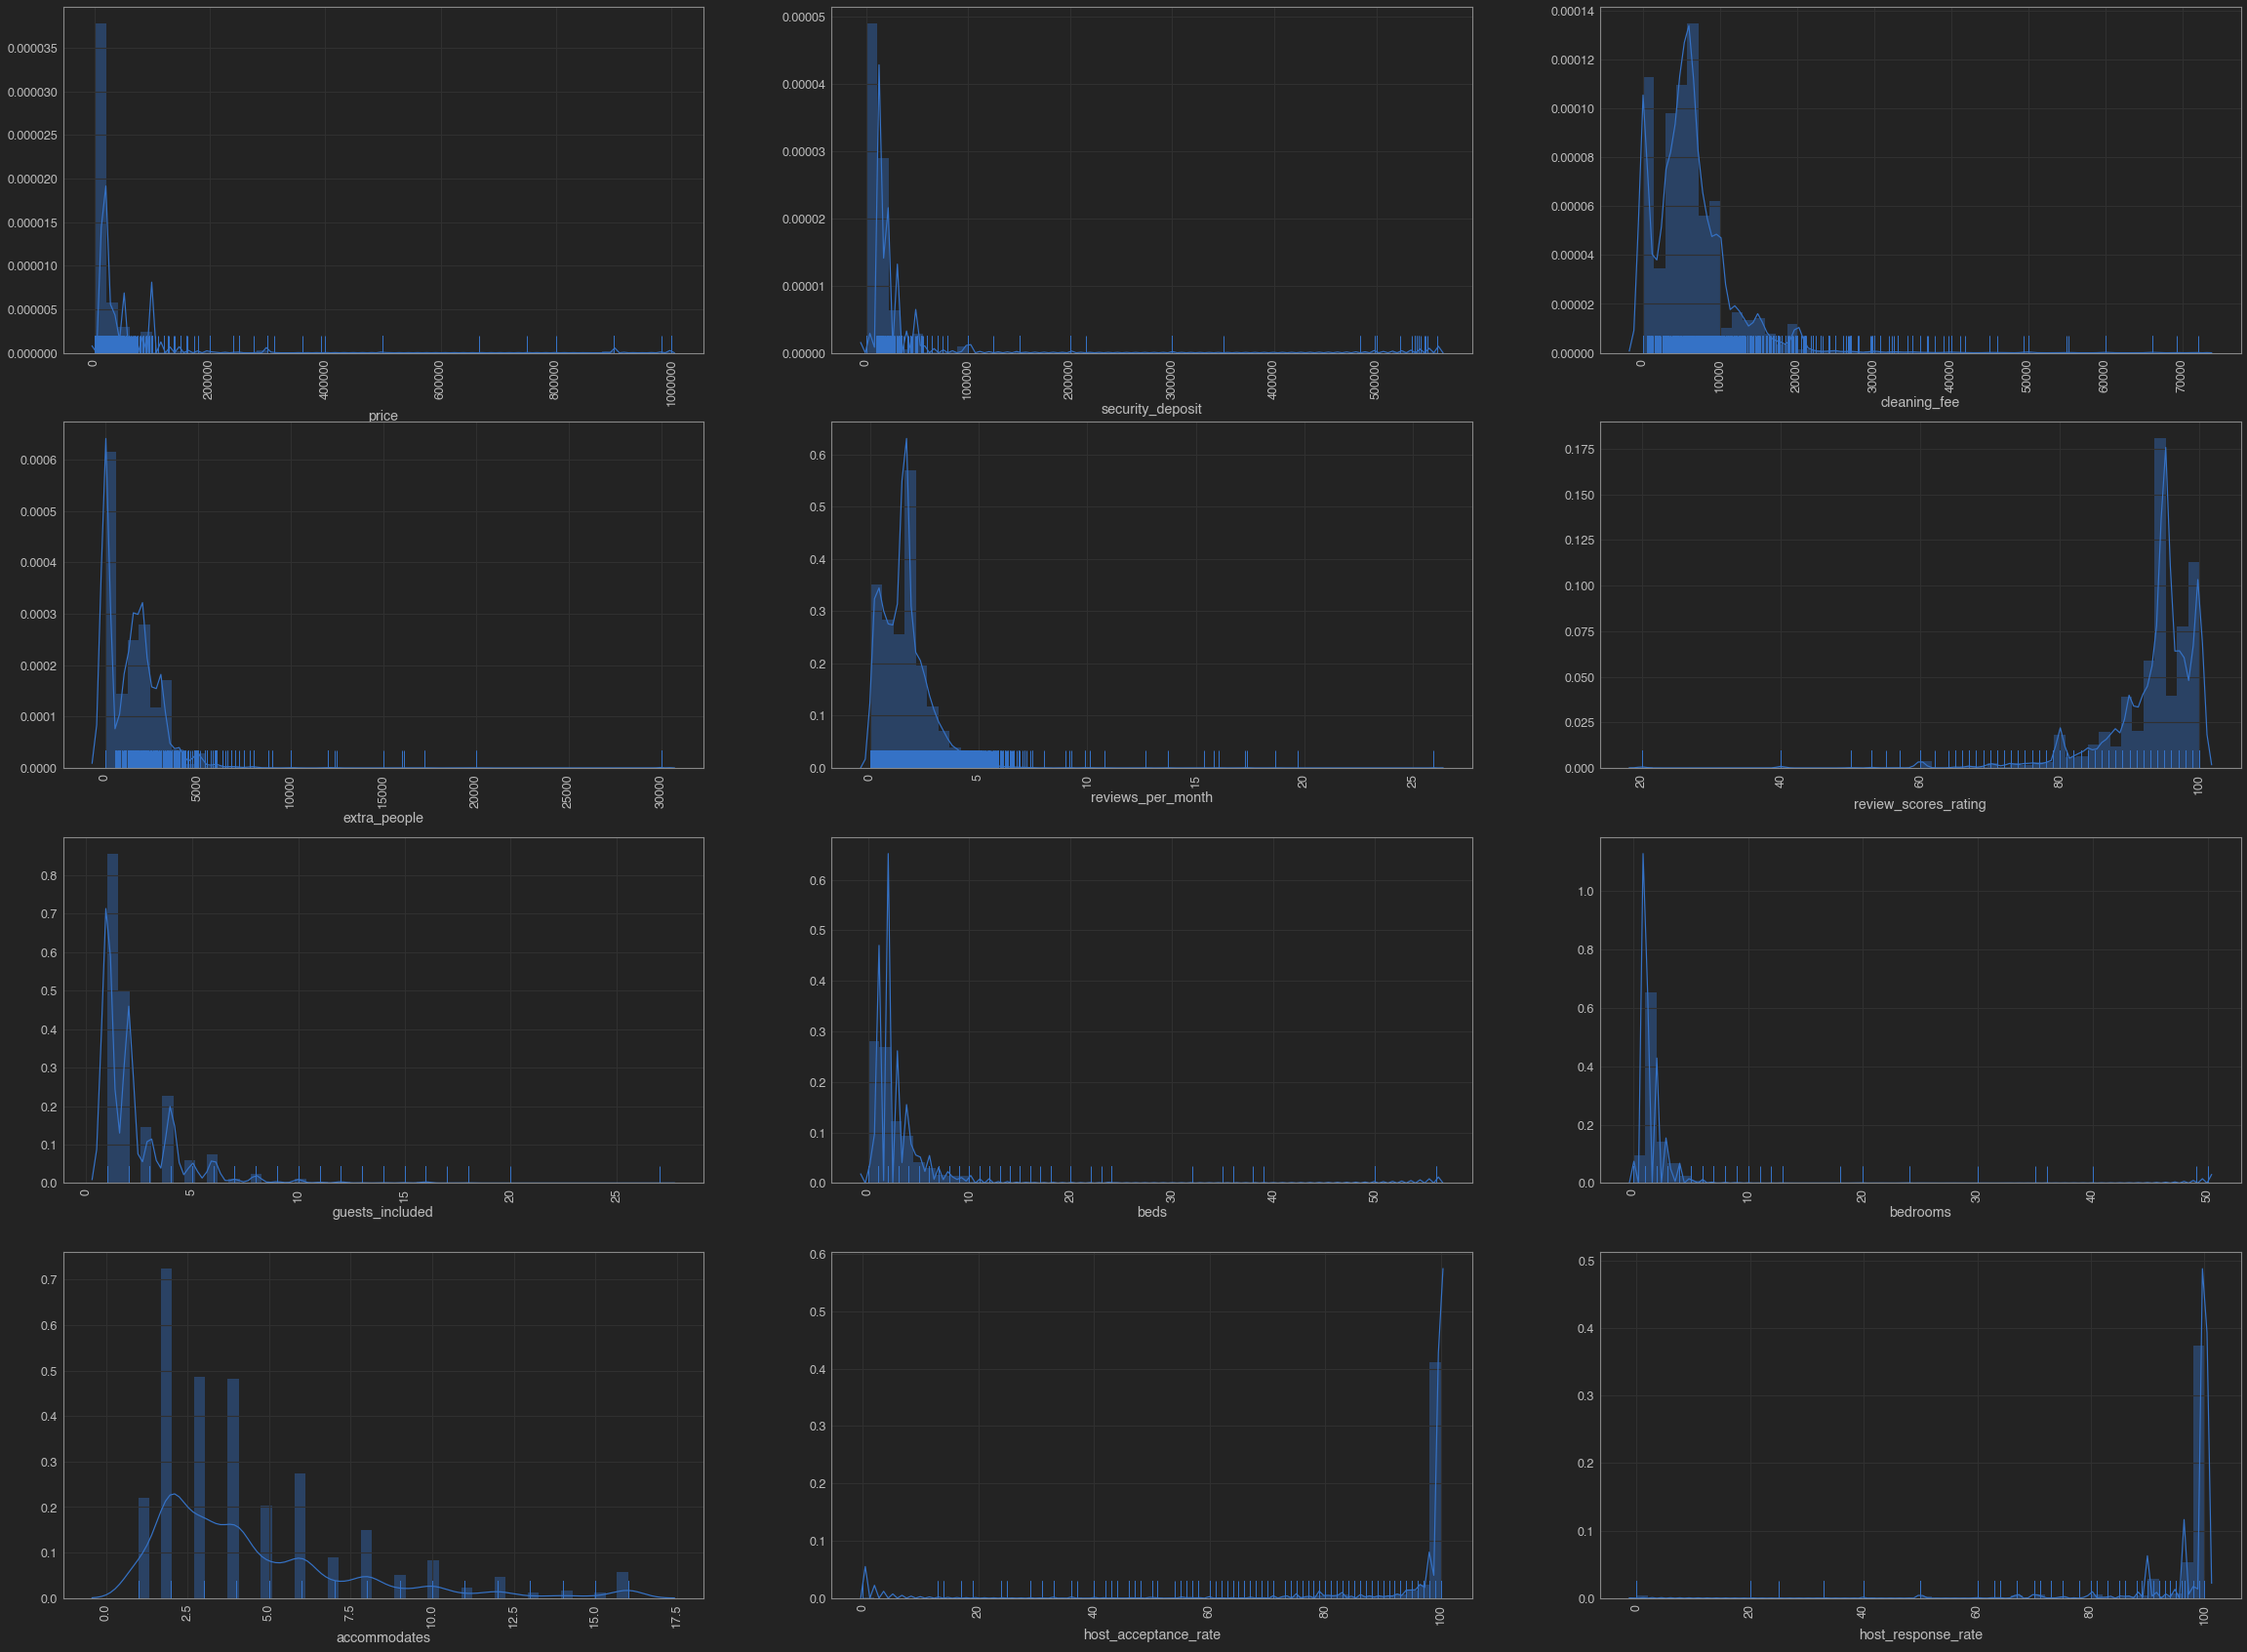

In [28]:
fig, ax = plt.subplots(4, 3, figsize=(40, 30)) #subplot adalah fungsi yang mengembalikan tuple yang berisi objek figur dan sumbu. Jadi ketika menggunakan fig, ax = plt.subplots() saya mengeluarkan tuple ite ke dalam variabel fig dan ax
for variable, subplot in zip(['price', # mengiterasi price, security deposit dll yang diratakan
                              'security_deposit',
                              'cleaning_fee',
                              'extra_people',
                              'reviews_per_month',
                              'review_scores_rating',
                              'guests_included',
                              'beds',
                              'bedrooms',
                              'accommodates',
                              'host_acceptance_rate',
                              'host_response_rate'], ax.flatten()):
    sns.distplot(airbnb[variable], rug=True, ax=subplot) # displot dengan rug untuk menandakan persebaran data di setiap sumbu x
    for label in subplot.get_xticklabels(): #mendapatkan label di sumbu x
        label.set_rotation(90) #meroptasi tulisan
        
plt.savefig('Numerical.png') #save figure kedalam png

Selain data yang tidak terdistribusi dengan normal, ada beberapa keunikan yang saya temukan dari distribusi numerical ini yaitu frekuensi terbanyak kebanyakkan berada di kisaran nilai-nilai yang kecil. kecuali untuk kolom-kolom penilaian seperti rate dan rating yang menandakan keseluruhan Airbnb memiliki rating yang baik. Lalu dengan jenis kurtosis positif ini, dapat ditarik kesimpulan juga bahwa nilai modus lebih kecil dibandingkan nilai mean dan median nya. Hal ini tidak baik karena akan menyebabkan kesalahan terhadap penarikan kesimpulan. Untuk langkah selanjutnya akan dilakukan handling dengan Winsorizer. Karena metode ini terbilang aman dibandingkan membuang outliers yang jumlahnya sangat besar berdasarkan uji kurtosis yang membuat sangat mudah hilangnya informasi.

In [29]:
windsoriser = Winsorizer(distribution='skewed',
                         tail='both',
                         fold=1.5,
                         variables=['host_acceptance_rate',
                                    'host_response_rate',
                                    'price',
                                    'security_deposit',
                                    'cleaning_fee',
                                    'extra_people',
                                    'beds',
                                    'bedrooms',
                                    'reviews_per_month',
                                    'review_scores_rating',
                                    'guests_included'])

windsoriser.fit(airbnb)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['host_acceptance_rate', 'host_response_rate', 'price',
                      'security_deposit', 'cleaning_fee', 'extra_people',
                      'beds', 'bedrooms', 'reviews_per_month',
                      'review_scores_rating', 'guests_included'])

In [30]:
airbnb = windsoriser.transform(airbnb)

# HIPOTESIS 1
- jumlah airbnb yang dekat dengan venue yang mana berada di tengah kota cenderung lebih banyak dibandingkan yang jauh

# LONGITUDE - LATITUDE

In [31]:
latitude = airbnb['latitude'].tolist()
longitude = airbnb['longitude'].tolist()
locations = list(zip(latitude, longitude))
m = folium.Map([35.6812,139.7671],zoom_start=12,tiles='CartoDB dark_matter')
folium.Marker(location=[35.6812,139.7671],popup='<strong>Tokyo', tooltip='Click for more information',icon=folium.Icon(color='pink')).add_to(m)
folium.Marker(location=[35.6779, 139.7145],popup='<strong>Tokyo Olympic Stadium</strong><br>Sports: Athletics,Football', tooltip='Click for more information',icon=folium.Icon(color='blue')).add_to(m)
folium.Marker(location=[35.641014,139.792048],popup='<strong>Ariake Gymnastic Centre</strong><br>Sports: Gymnastic', tooltip='Click for more information',icon=folium.Icon(color='lightgray')).add_to(m)
folium.Marker(location=[35.651403, 139.815074],popup='<strong>Tokyo Aquatics Centre</strong><br>Sports: Swimming', tooltip='Click for more information',icon=folium.Icon(color='red')).add_to(m)
folium.Marker(location=[35.6933, 139.7499],popup='<strong>Nippon Budokan</strong><br>Sports: Karate', tooltip='Click for more information',icon=folium.Icon(color='beige')).add_to(m)
folium.Marker(location=[35.6767, 139.7638],popup='<strong>Tokyo International Forum</strong><br>Sports: Weightlifting', tooltip='Click for more information',icon=folium.Icon(color='darkpurple')).add_to(m)
FastMarkerCluster(data=locations).add_to(m)
m

Dapat kita lihat dari peta diatas bahwa persebaran angka Airbnb memang terpusat di tengah kota yang cenderung dekat dengan Stadium-Stadium yang akan digunakan di 2020 Olympics . Berdasarkan angka kasat mata, Shinjuku merupakan area yang paling banyak memiliki Airbnb yang disewakan

In [32]:
# m.save('tokyomap1.html')

In [33]:
tokyo = folium.Map(location=[35.6962, 139.7503], zoom_start=13, control_scale=True, tiles='CartoDB dark_matter')
folium.Marker(location=[35.6812,139.7671],popup='<strong>Tokyo', tooltip='Click for more information',icon=folium.Icon(color='pink')).add_to(tokyo)
folium.Marker(location=[35.6779, 139.7145],popup='<strong>Tokyo Olympic Stadium</strong><br>Sports: Athletics,Football', tooltip='Click for more information',icon=folium.Icon(color='blue')).add_to(tokyo)
folium.Marker(location=[35.641014,139.792048],popup='<strong>Ariake Gymnastic Centre</strong><br>Sports: Gymnastic', tooltip='Click for more information',icon=folium.Icon(color='lightgray')).add_to(tokyo)
folium.Marker(location=[35.651403, 139.815074],popup='<strong>Tokyo Aquatics Centre</strong><br>Sports: Swimming', tooltip='Click for more information',icon=folium.Icon(color='red')).add_to(tokyo)
folium.Marker(location=[35.6933, 139.7499],popup='<strong>Nippon Budokan</strong><br>Sports: Karate', tooltip='Click for more information',icon=folium.Icon(color='beige')).add_to(tokyo)
folium.Marker(location=[35.6767, 139.7638],popup='<strong>Tokyo International Forum</strong><br>Sports: Weightlifting', tooltip='Click for more information',icon=folium.Icon(color='darkpurple')).add_to(tokyo)
# Adding a heatmap to the base map
HeatMap(data=airbnb[['latitude', 'longitude']], radius=10).add_to(tokyo)

# Displaying the map
tokyo

Setelah sebelumnya melihat angka-angkany berdasarkan cluster, disini dapat dilihat jelas dan benar bahwa Shinjuku memiliki angka Airbnb terbesar. Setelah ditelaah, Shinjuku memang dijuluki salah satu kota teramai di Tokyo. Terlebih lagi Stasiun di Shinjuku ini atau Stasiun Shinjuku merupakan stasiun tersibuk di dunia sejak tahun 2007. untuk setiap harinya dengan berbagai line baik bawah tanah , maupun biasa.

# " Shinjuku station was used by an average of 3.64 million people per day in 2007, making it, by far, the world's busiest transport hub (and registered as such with Guinness World Records)." 
-via wikipedia

# CATEGORICAL FEATURE - Univariate

In [36]:
airbnb[categorical_feature].columns

Index(['name', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_since',
       'property_type', 'room_type', 'amenities', 'license',
       'instant_bookable', 'cancellation_policy'],
      dtype='object')

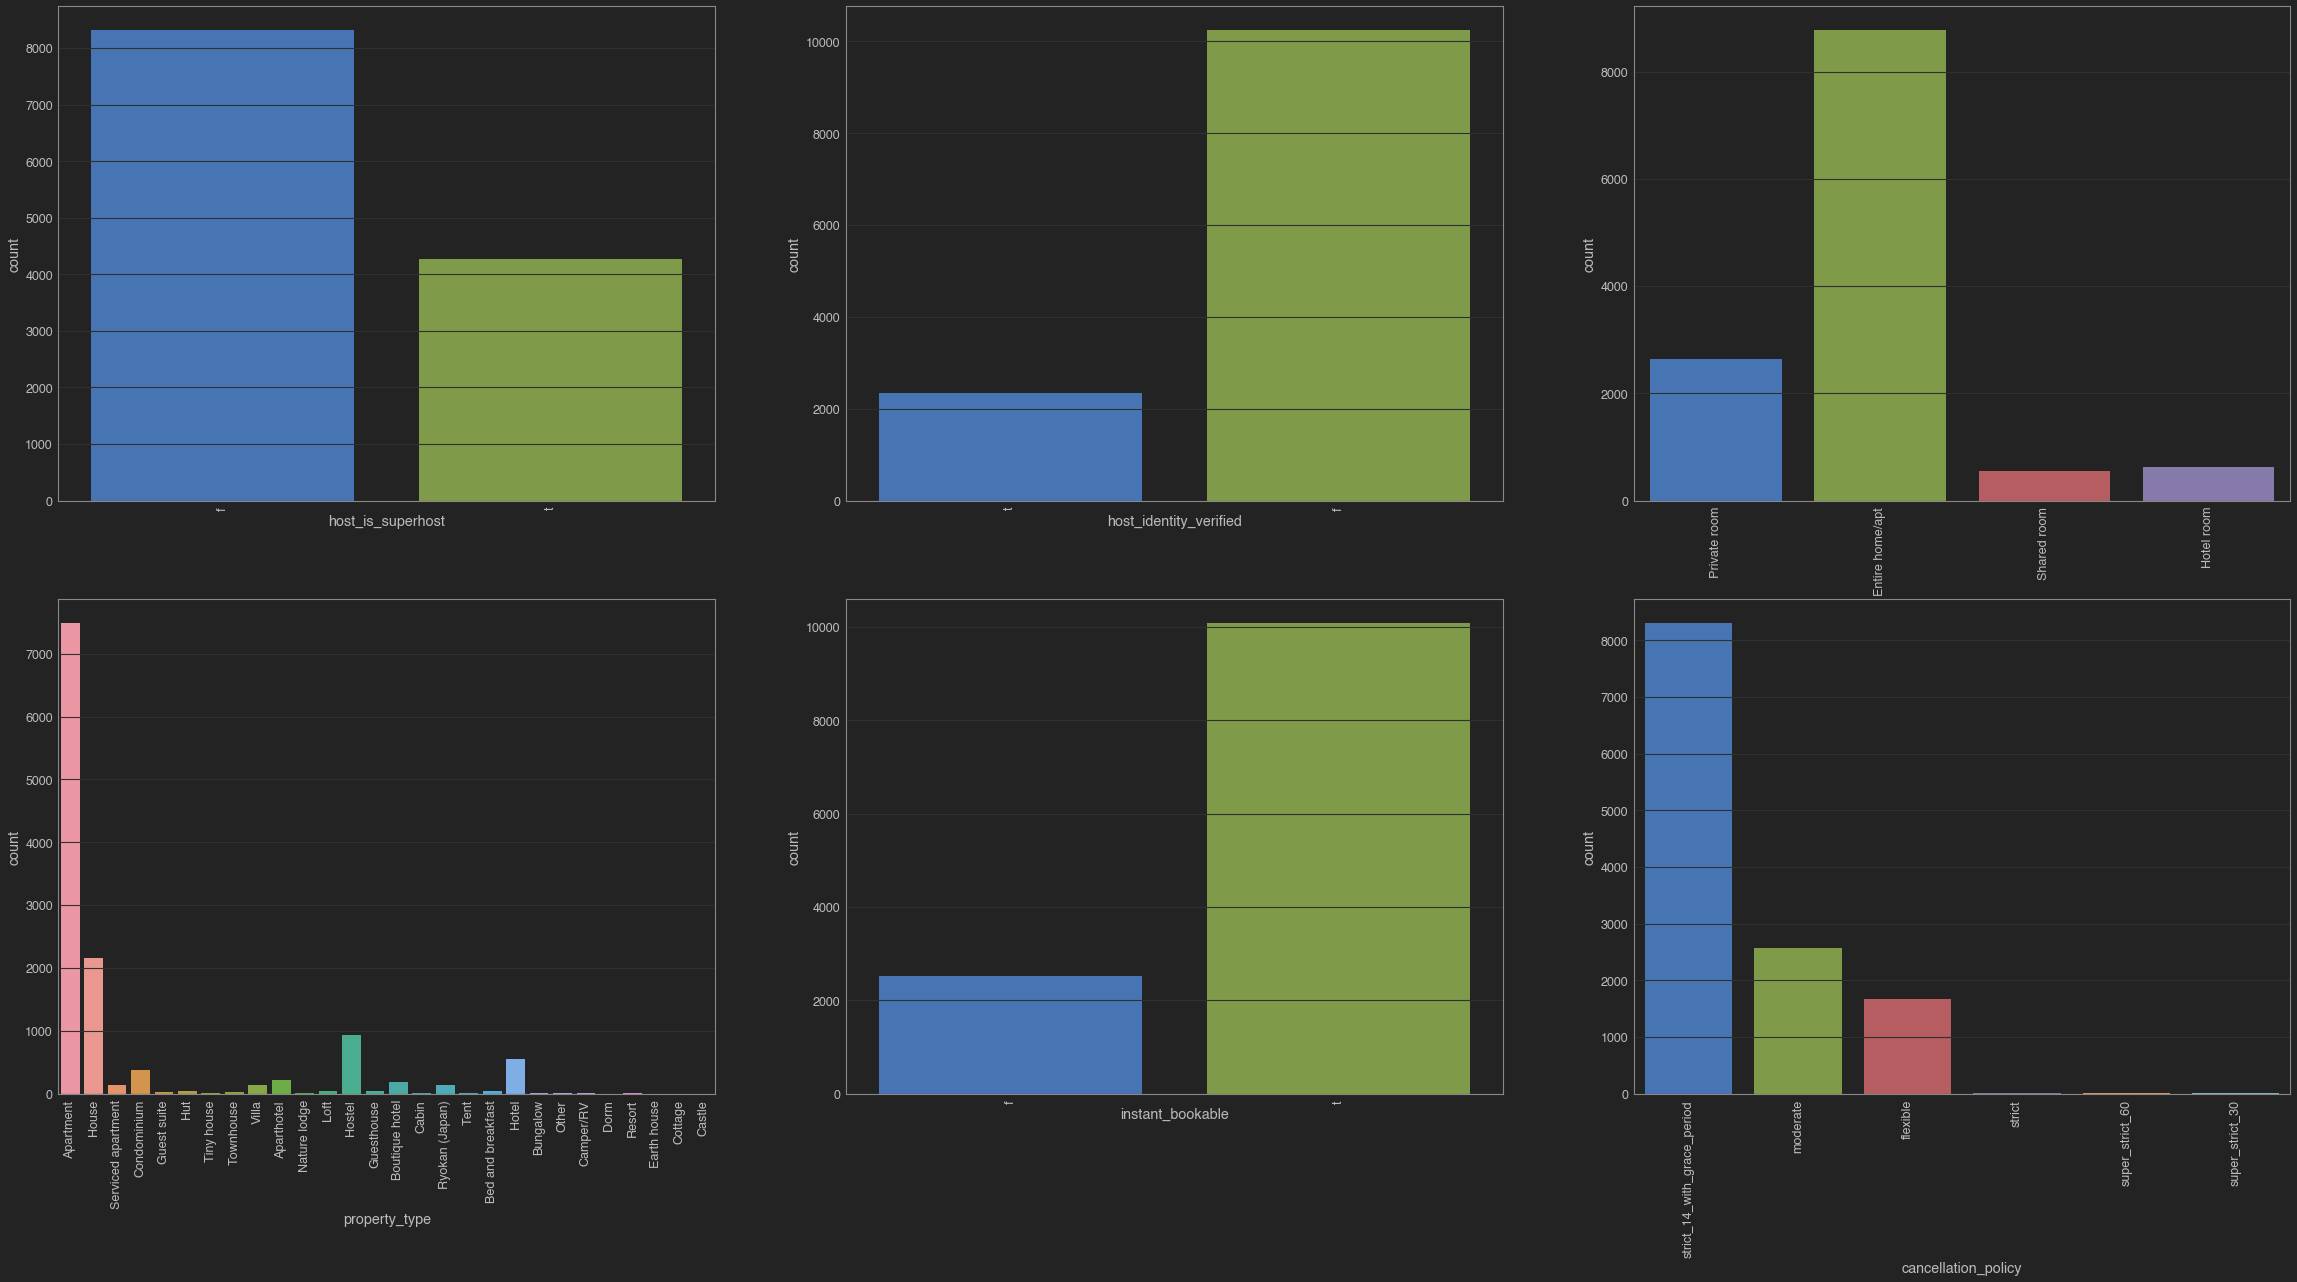

In [37]:
fig, ax = plt.subplots(2, 3, figsize=(40, 20))
for variable, subplot in zip(['host_is_superhost','host_identity_verified','room_type','property_type','instant_bookable','cancellation_policy'], ax.flatten()):
    sns.countplot(airbnb[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.savefig('Categorical.png')

Berdasarkan data diatas, dapat dilihat  host_is_superhost f nya kok lebih besar? jelek semua dong? tentu tidak, jd superhost ini diberikan oleh airbnb kepada host yang mana memberikan contoh teladan untuk host yang lain dan memberikan experience yang lebih baik kepada guest nya. Apa sisanya berarti jelek? tentu engga, jd kayak pemberian mvp atau murid teladan. seluruh host ini bisa dibilang sama-sama berjuang disini tp hanya beberapa aja yg dipilih. Dan jg badge superhost ini tidak tetap jg krn akan diperbaharui terus selama 4 tahun sekali menurut situs resmi airbnb. Lalu belum dilakukan bivariate dengan Price sehingga tidak dapat disimpulkan hanya dengan melihat jumlahnya saja

host_identity_verified. 
Hal ini juga terasa janggal karena anyak yg ga terverifikasi? apakah menandakan banyak yang ilegal? jd menurut situs airbnb nya. ada yang disebut host_verifications yang berbentuk list tentang bagaimana cara host memverifikasi akunnya. ada by email, government id, facebook dll. Lalu setelah disetujui, tentu mereka akan dpt balasan dari airbnb untuk mengklik verifikasi, disinilah banyak yang tidak memperdulikan hal tsb. Akan lebih jelas kegunaannya nanti setelah dilakukan uji bivariate

Room Type.
Entire home/apt merupakan yang paling banyak, hal ini terjadi karena tipe ini dinilai sangat cocok untuk orang jepang dan turis yang menginap yang membutuhkan ketenangan. Dimana ruangan dengan tipe ini memiliki seluruh tempat untuk diri mereka sendiri tanpa harus share dengan orang lain atau pemilik rumah. Yang biasanya mencakup kamar tidur, kamar mandi, dan dapur.

Property Type.
Property jenis apartment paling banyak digunakan untuk pengusaha Airbnb karena memiliki beberapa kemudahan untuk yang menginap dan turis yang ingin tinggal dalam jangka waktu pendek

Cancelation policies.
Pembatalan yang selain tiga teratas terasa sangat kontras, sehingga nantinya akan dilihat lebih dalam.

In [38]:
airbnb["host_is_superhost"].replace(["t","f"],[True,False],inplace=True)
airbnb["host_identity_verified"].replace(["t","f"],[True,False],inplace=True)
airbnb["instant_bookable"].replace(["t","f"],[True,False],inplace=True)

In [39]:
airbnb_describe =[]

for i in airbnb[categorical_feature].columns:
    airbnb_describe.append([
        i,
        airbnb[i].nunique(),
        airbnb[i].unique(),
        airbnb[i].value_counts()
    ])

In [40]:
DESC_CAT = pd.DataFrame(airbnb_describe, columns=['column','nunique','unique','value_counts'])
DESC_CAT

column  nunique  \
0                     name    11669   
1        host_is_superhost        2   
2       host_verifications      203   
3   host_identity_verified        2   
4   neighbourhood_cleansed       55   
5               host_since     1638   
6            property_type       28   
7                room_type        4   
8                amenities     9182   
9                  license     7214   
10        instant_bookable        2   
11     cancellation_policy        6   

                                               unique  \
0   [La Casa Gaienmae C Harajuku, Omotesando is ne...   
1                                       [False, True]   
2   [['email', 'phone', 'facebook', 'reviews', 'ju...   
3                                       [True, False]   
4   [Shibuya Ku, Sumida Ku, Nerima Ku, Setagaya Ku...   
5   [2010-06-25, 2011-08-13, 2011-01-10, 2012-01-0...   
6   [Apartment, House, Serviced apartment, Condomi...   
7   [Private room, Entire home/apt, Shared room, H...   
8   [{TV,Internet,Wifi,Kitchen,"Paid parking off p...   
9   [Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります...   
10                                      [False, True]   
11  [strict_14_with_grace_period, moderate, flexib...   

                                         value_counts  
0   10㎡ Convenient Private Bath 1min Ikebukuro C1 ...  
1   False    8322
True     4278
Name: host_is_supe...  
2   ['email', 'phone']                            ...  
3   False    10252
True      2348
Name: host_ident...  
4   Shinjuku Ku            2398
Taito Ku          ...  
5   2019-04-28    92
2020-01-31    92
2018-12-07  ...  
6   Apartment             7489
House              ...  
7   Entire home/apt    8781
Private room       264...  
8   {TV,"Air conditioning",Kitchen,Elevator,Heatin...  
9   旅館業法の許可番号 | 台東区台東保健所 | 30台台健生環き第183号          ...  
10  True     10084
False     2516
Name: instant_bo...  
11  strict_14_with_grace_period    8308
moderate  ...

Berdasarkan data diatas, ketiga kolom sebelumnya telah berhasil di replace dengan True dan False agar mudah membacanya. Lalu, terdapat dua kolom yang akan dilakukan extract untuk melihat analisa tentang isi dari kolom tersebut. wordcloud dapat membantu untuk mengetahui pembobotan antar kata di dalam list tersebut untuk mendapatkan insight.

# HOST VERIFICATIONS

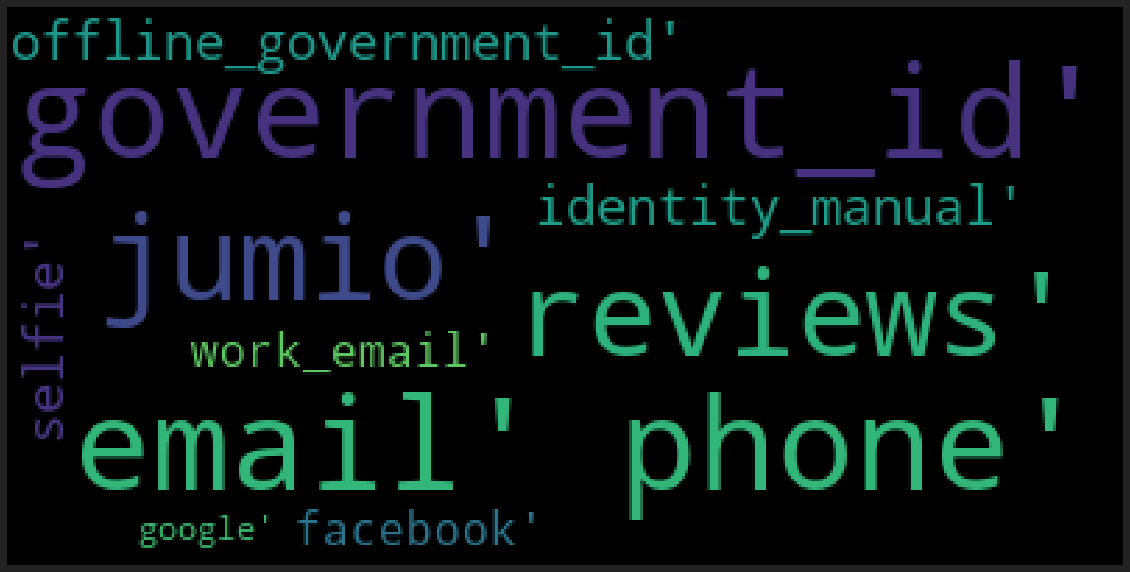

In [42]:
text = airbnb['host_verifications'].values
host_veri = WordCloud(max_words=20, colormap='viridis',background_color="black").generate(str(text))
plt.figure(figsize=(20,20))
plt.imshow(host_veri)
plt.axis("off")
plt.show()

Berikut ini adalah beberapa top yang digunakan host untuk memverifikasi akun mereka. Ada istilah yang baru disini yaitu "Jumio". jumio adalah identity verifications berbasis AI yang mana dipercaya dapat mengurangi kecurangan, kebohongan identitas dll. https://www.jumio.com/about/ . Dapat disimpulkan bahwa untuk menjadi host Airbnb, harus memiliki persyaratan-persyaratan tersebut. Tentu alasannya adalah untuk keamanan dan agar tidak terjadi kebohongan-kebohongan terkait identitas yang dapat merugikan guest nantinya.

# NEIGHBOURHOOD CLEANSED

In [43]:
airbnb['neighbourhood_cleansed'].nunique()

55

In [44]:
airbnb.pivot_table(index='neighbourhood_cleansed', values='host_id',aggfunc=['count']).T

neighbourhood_cleansed  Adachi Ku  Akiruno Shi  Akishima Shi  Arakawa Ku  \
count host_id                 184            8             2         339   

neighbourhood_cleansed  Bunkyo Ku  Chiyoda Ku  Chofu Shi  Chuo Ku  Edogawa Ku  \
count host_id                 141         208          8      520         201   

neighbourhood_cleansed  Fuchu Shi  Fussa Shi  Hachijo Machi  Hachioji Shi  \
count host_id                   6          3              6            43   

neighbourhood_cleansed  Hamura Shi  Higashikurume Shi  Higashimurayama Shi  \
count host_id                    3                  3                   13   

neighbourhood_cleansed  Higashiyamato Shi  Hino Shi  Hinohara Mura  Inagi Shi  \
count host_id                           1        26              5          2   

neighbourhood_cleansed  Itabashi Ku  Katsushika Ku  Kita Ku  Kodaira Shi  \
count host_id                   271            293      305           10   

neighbourhood_cleansed  Koganei Shi  Kokubunji Shi  Komae Shi  Koto Ku  \
count host_id                     3             13          9      189   

neighbourhood_cleansed  Kunitachi Shi  Machida Shi  Meguro Ku  Minato Ku  \
count host_id                       9           27         58        442   

neighbourhood_cleansed  Mitaka Shi  Miyake Mura  Musashimurayama Shi  \
count host_id                   11            2                    4   

neighbourhood_cleansed  Musashino Shi  Nakano Ku  Nerima Ku  Niijima Mura  \
count host_id                      11        358         78             2   

neighbourhood_cleansed  Nishitokyo Shi  Ogasawara Mura  Okutama Machi  \
count host_id                       15               3              3   

neighbourhood_cleansed  Ome Shi  Oshima Machi  Ota Ku  Setagaya Ku  \
count host_id                 4            15     413          324   

neighbourhood_cleansed  Shibuya Ku  Shinagawa Ku  Shinjuku Ku  Suginami Ku  \
count host_id                  800           209         2398          279   

neighbourhood_cleansed  Sumida Ku  Tachikawa Shi  Taito Ku  Tama Shi  \
count host_id                1185              6      1815        10   

neighbourhood_cleansed  Toshima Ku  
count host_id                 1304

In [45]:
airbnb['neighbourhood_cleansed'].value_counts()

Shinjuku Ku            2398
Taito Ku               1815
Toshima Ku             1304
Sumida Ku              1185
Shibuya Ku              800
Chuo Ku                 520
Minato Ku               442
Ota Ku                  413
Nakano Ku               358
Arakawa Ku              339
Setagaya Ku             324
Kita Ku                 305
Katsushika Ku           293
Suginami Ku             279
Itabashi Ku             271
Shinagawa Ku            209
Chiyoda Ku              208
Edogawa Ku              201
Koto Ku                 189
Adachi Ku               184
Bunkyo Ku               141
Nerima Ku                78
Meguro Ku                58
Hachioji Shi             43
Machida Shi              27
Hino Shi                 26
Oshima Machi             15
Nishitokyo Shi           15
Higashimurayama Shi      13
Kokubunji Shi            13
Musashino Shi            11
Mitaka Shi               11
Tama Shi                 10
Kodaira Shi              10
Kunitachi Shi             9
Komae Shi           

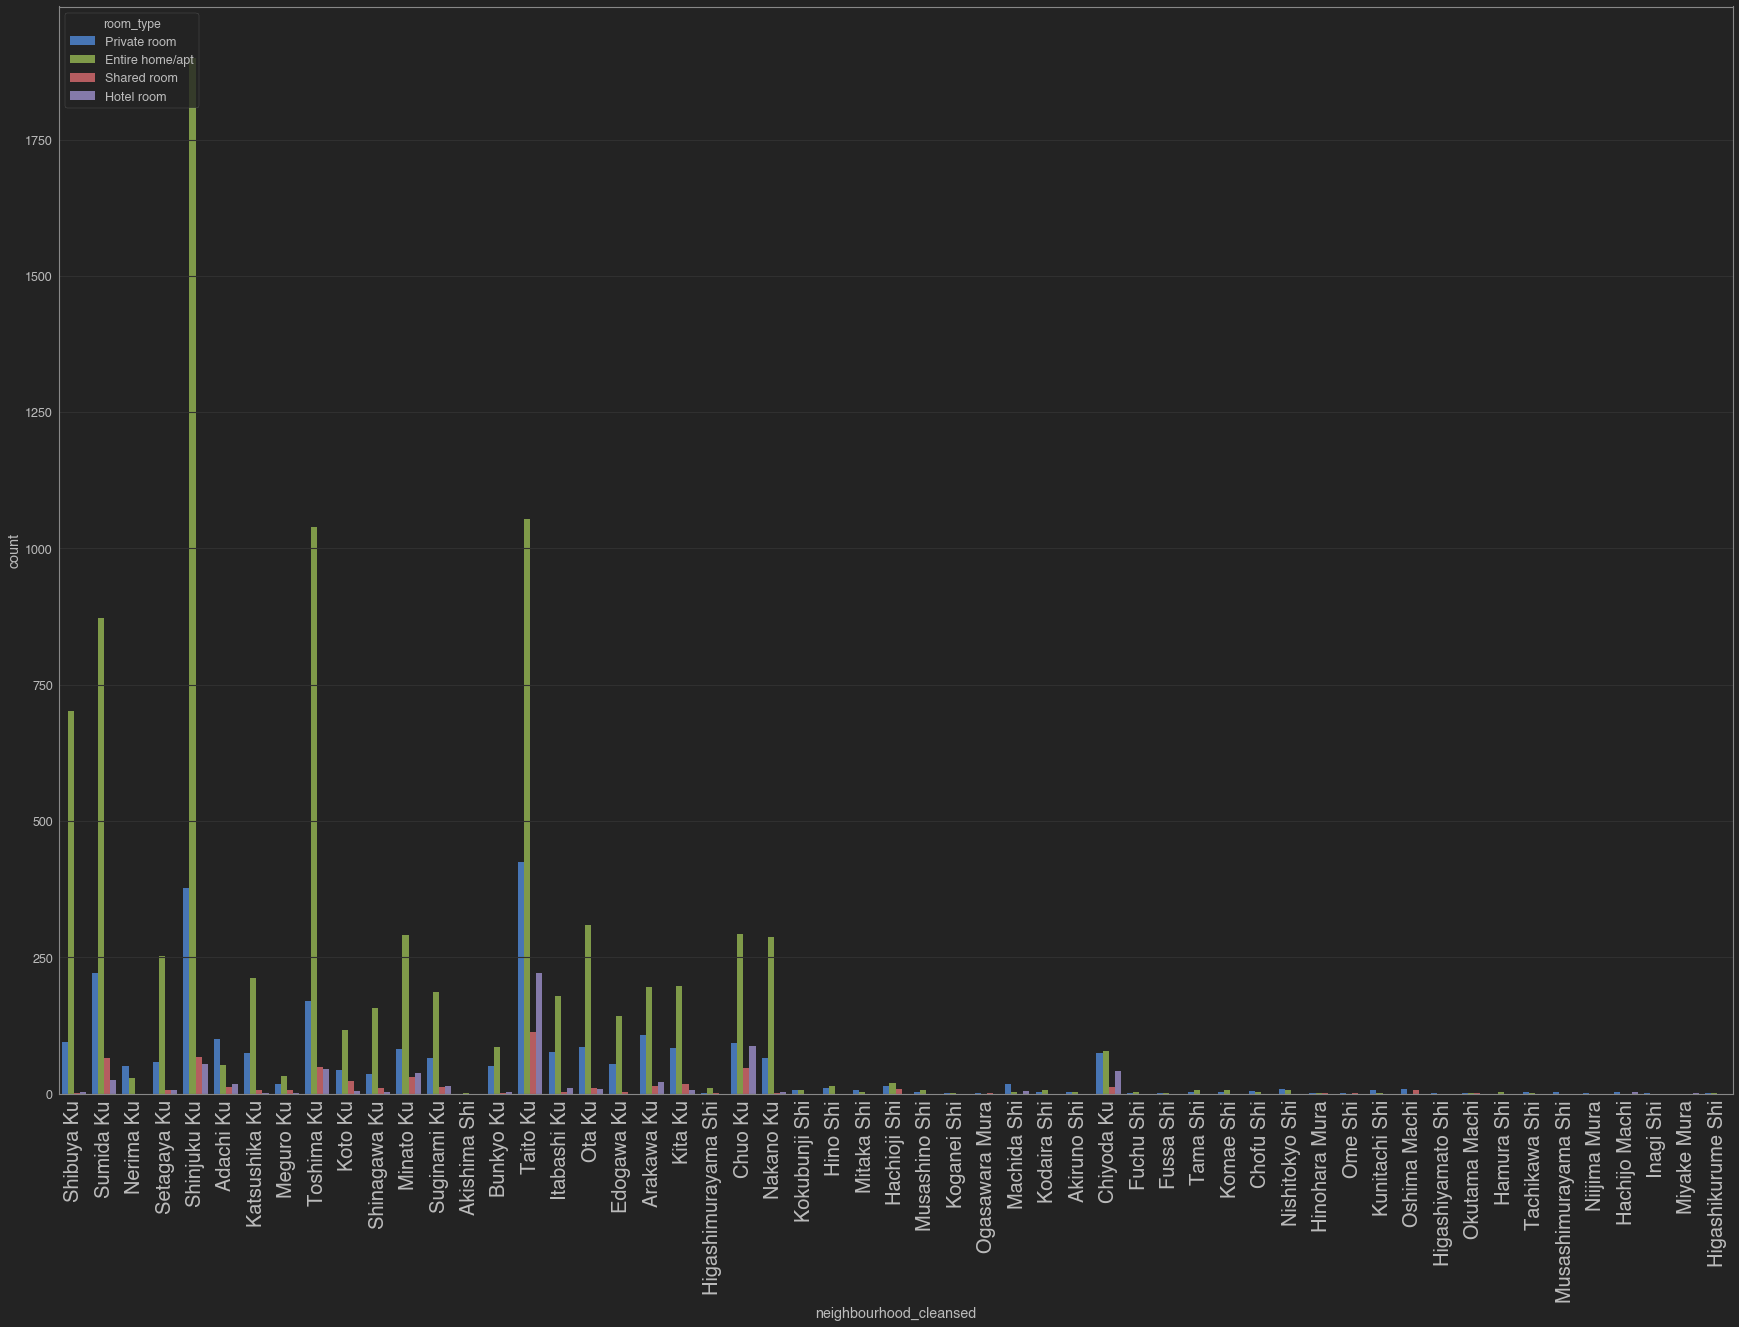

In [46]:
plt.figure(figsize=(30,20))
g= sns.countplot(data=airbnb, x='neighbourhood_cleansed',hue='room_type') #memvisualisasikan jumlah setiap type properti dengan seabron countplot
g.set_xticklabels(g.get_xticklabels(),fontsize=20, rotation=90)
plt.savefig('Neighbourhood.png')


Berdasarkan angka count sebelumnya, Shinjuku merupakan area terbanyak memiliki Airbnb. Untuk data berdasarkan tipe ruangan sendiri dapat dilihat tipe Entire Home/Apt paling banyak terletak di Shinjuku, Untuk Private Room,Hotel, dan Shared Room keseluruhan banyak di Taito Ku. Setelah ditelaah ternyata Taito ini merupakan area yang terkenal akan wisata budaya nya salah satunya Sensoji Temple di asakusa https://en.wikipedia.org/wiki/Taitō#Landmarks. Setelah ini akan ditelaah lebih dalam density masing-masing tipe ruangan dengan folium untuk melihat pemusatannya. Lalu dapat dilhat dimulai dari Kokubunji hingga Higashikumurume Shi sangat sepi jumlah Airbnb. Hal ini didasari karena airbnb baru berkembang disana dan juga fokus dari Airbnb sebelumnya yaitu dekat dengan pusat kota yang mana terlihat sekali disini. 

# ROOM TYPE

In [48]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [49]:
airbnb.pivot_table(index='room_type', values='host_id',aggfunc=['count']).round(2).T

room_type      Entire home/apt  Hotel room  Private room  Shared room
count host_id             8781         633          2641          545

In [47]:
entire = airbnb[airbnb['room_type'] == 'Entire home/apt']
hotel = airbnb[airbnb['room_type'] == 'Hotel room']
private = airbnb[airbnb['room_type'] == 'Private room']
shared = airbnb[airbnb['room_type'] == 'Shared room']

In [48]:
tokyo = folium.Map(location=[35.6762, 139.6503], zoom_start=13, control_scale=True, tiles='CartoDB dark_matter')

# Adding a heatmap to the base map
HeatMap(data=entire[['latitude', 'longitude']], radius=10).add_to(tokyo)

# Displaying the map
tokyo

In [49]:
tokyo = folium.Map(location=[35.6762, 139.6503], zoom_start=13, control_scale=True, tiles='CartoDB dark_matter')

# Adding a heatmap to the base map
HeatMap(data=hotel[['latitude', 'longitude']], radius=10).add_to(tokyo)

# Displaying the map
tokyo

In [50]:
tokyo = folium.Map(location=[35.6762, 139.6503], zoom_start=13, control_scale=True, tiles='CartoDB dark_matter')

# Adding a heatmap to the base map
HeatMap(data=private[['latitude', 'longitude']], radius=10).add_to(tokyo)

# Displaying the map
tokyo

In [51]:
tokyo = folium.Map(location=[35.6762, 139.6503], zoom_start=13, control_scale=True, tiles='CartoDB dark_matter')

# Adding a heatmap to the base map
HeatMap(data=shared[['latitude', 'longitude']], radius=10).add_to(tokyo)

# Displaying the map
tokyo

# AMENITIES

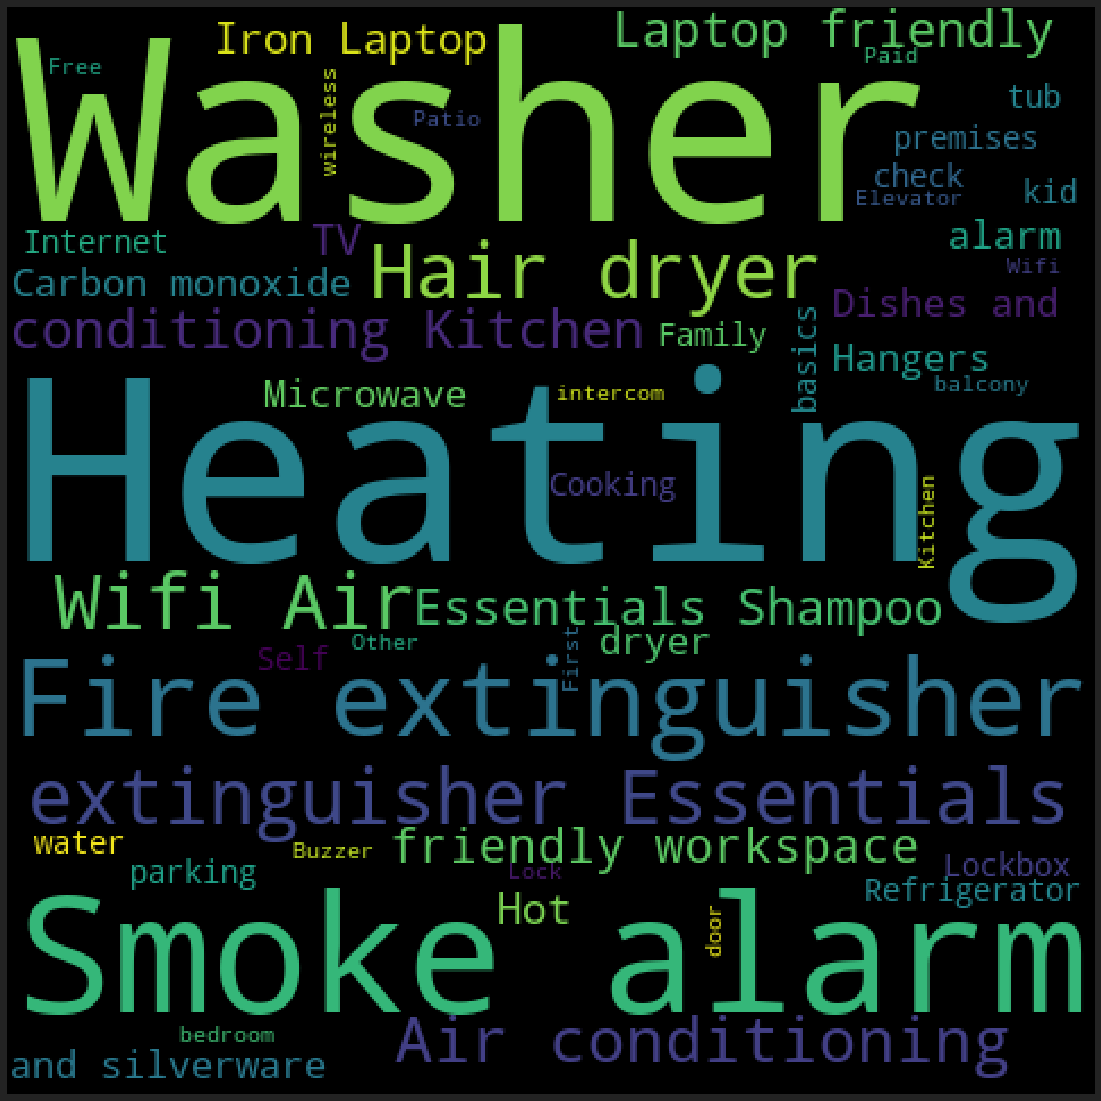

<Figure size 460.8x403.2 with 0 Axes>

In [56]:
text = airbnb['amenities'].values
amenities = WordCloud(width=480, height=480, max_words=50, colormap='viridis',background_color="black").generate(str(text))
plt.figure(figsize=(20,20))
plt.imshow(amenities)
plt.axis("off")
plt.show()
plt.savefig('Amenities.jpg')

Berdasarkan hal ini dapat dilihat bahwa kebutuhan fasilitas sangatlah beragam. Dapat dilihat Heating sangat diperlukan, tentu karena kita tahu Jepang merupakan salah satu negara dengan 4 musim, sehingga selain AC tentu perlu pemanas. Kemudian Washer, Smoke Alarm dan lain sebagainya. Berdasarkan ini, dapat kita simpulkan bahwa kenyamanan menginap sangat erat dengan fasilitas dari Airbnb tersebut, itulah kenapa banyak terlihat banyak sekali fasilitas-fasilitas yang mana saya atur 50 disini. Untuk kedepannya saya akan melakukan pembobotan berdasarkan perlengkapan-perlengkapan ini yang mana membantu dalam menentukan harga dari Airbnb tersebut nantinya di tahap Modeling. Ibarat kost-kostan, kost yang memiliki AC tentu akan lebih mahal dibandingkan yang tidak

# DATE TIME FEATURE

In [57]:
airbnb['host_since'] = pd.to_datetime(airbnb['host_since']) #membuat tahun bulan pada kolom baru
airbnb['year']= airbnb['host_since'].dt.year
airbnb['month'] = airbnb['host_since'].dt.month
airbnb['day']= airbnb['host_since'].dt.day

In [58]:
airbnb.pivot_table(index='year', values='host_id', aggfunc=['count']).round(2).T


year           2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
count host_id     3    34    24   233   556  1695  1695  1474  2945  3165   

year           2020  
count host_id   776

Berdasarkan data ini dapat dilihat bahwa, jumlah Airbnb Terus meningkat, meski ada penurunan kenaikan pada 2017, yang mana hal ini terjadi karena adanya waktu evaluasi untuk penerapan baru Minpaku Law yang telah dijelaskan sebelumnya sehingga banyak penundaan konfirmasi airbnb di tahun ini.

In [80]:
airbnb.pivot_table(index='month', values='host_id', aggfunc=['count']).round(2).T

month           1    2     3    4     5     6     7     8     9     10    11  \
count host_id  923  867  1075  972  1070  1007  1250  1107  1070  1047  1086   

month            12  
count host_id  1126

untuk angka paling banyak yaitu terletak di bulan ke 7 dan 12. Yang mana kedua tersebut merupakan jadwal berlibur seluruh dunia. Angka tersebut sejalan dengan kegiatan liburan tersebut disini.

In [81]:
airbnb.pivot_table(index='day', values='host_id', aggfunc=['count']).round(2).T

day             1    2    3    4    5    6    7    8    9    10   11   12  \
count host_id  374  374  376  541  532  466  469  495  393  370  361  442   

day             13   14   15   16   17   18   19   20   21   22   23   24  \
count host_id  452  405  440  368  488  421  403  304  352  424  413  335   

day             25   26   27   28   29   30   31  
count host_id  541  354  384  427  340  309  247

Text(0.5, 1.0, 'Price vs Year')

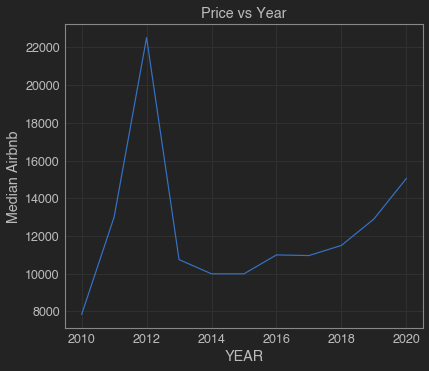

In [82]:
airbnb.groupby('year')['price'].median().plot()
plt.xlabel('YEAR')
plt.ylabel('Median Airbnb')
plt.title('Price vs Year')

# BIVARIATE 
## CATEGORICAL FEATURE
https://www.kaggle.com/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way

In [52]:
airbnb[categorical_feature].columns

Index(['name', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed', 'host_since',
       'property_type', 'room_type', 'amenities', 'license',
       'instant_bookable', 'cancellation_policy'],
      dtype='object')

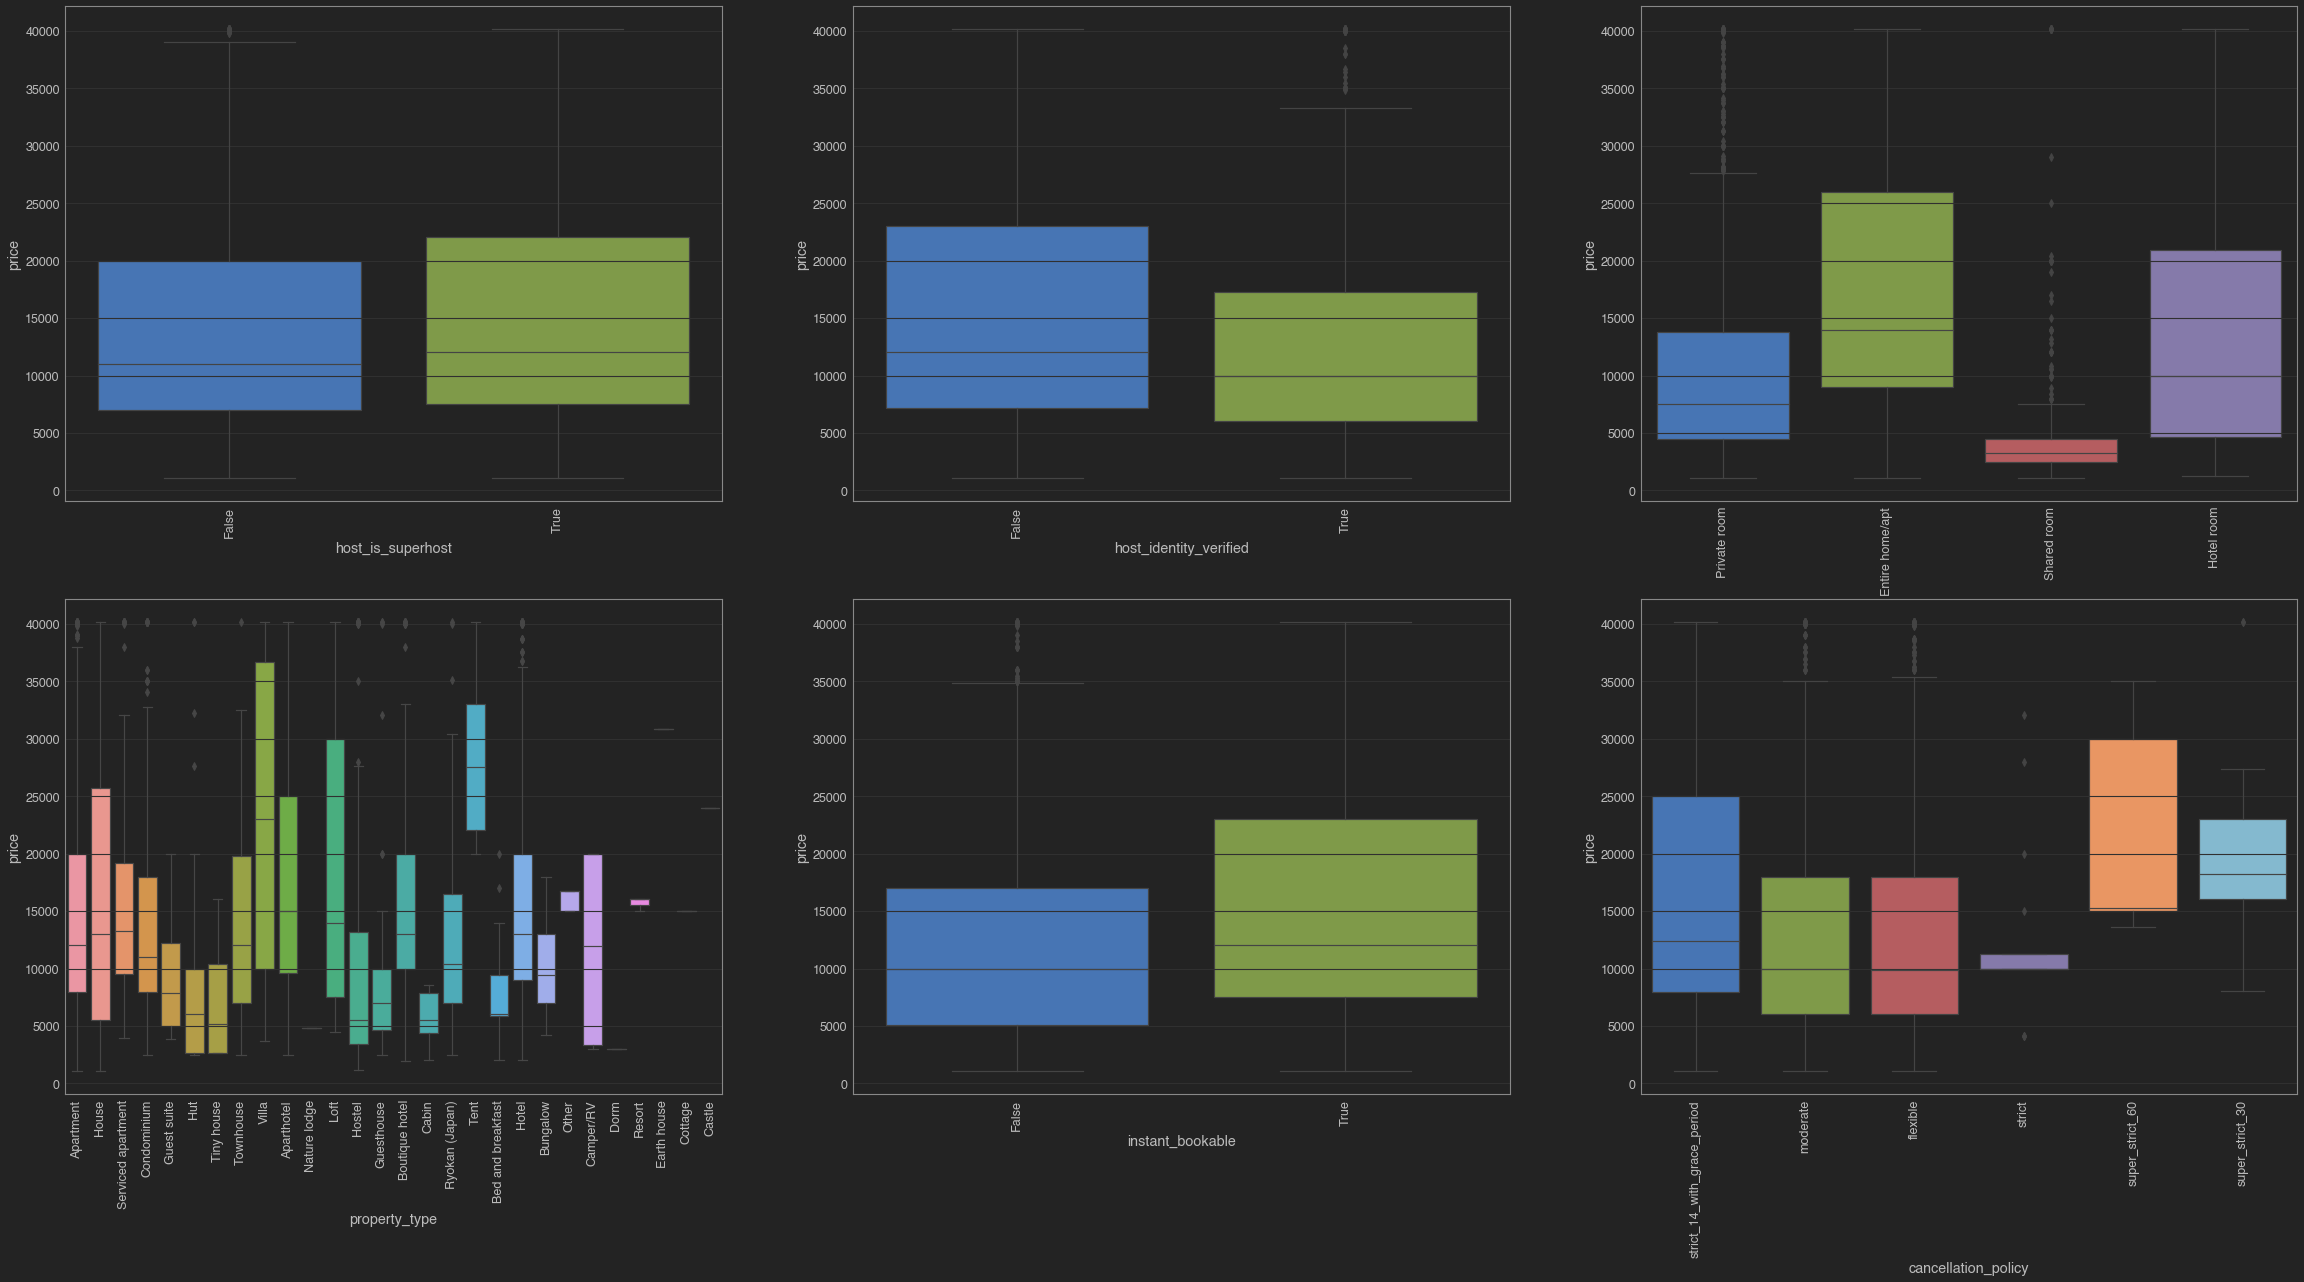

In [53]:
fig, ax = plt.subplots(2, 3, figsize=(40,20))
for var, subplot in zip(['host_is_superhost','host_identity_verified','room_type','property_type','instant_bookable','cancellation_policy'], ax.flatten()):
    sns.boxplot(x=var, y='price', data=airbnb, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        
plt.savefig('CategoricalvsPrice.png')

Berdasarkan analisis diatas, kita dapat simpulkan bahwa seluruh data sudah memperlihatkan kenormalannya. Sebelumnya dikarenakan outliers banyak data-data yang cenderung tidak masuk akal. Disini kita dapat menyimpulkan bahwa untuk airbnb tokyo harga yang paling mahal adalah yang memiliki type ruangan entire home/apt, ada reward tersendiri untuk host yang superhost meskipun tidak begitu jauh perbedaannya, verifikasi identitas tidak menentukan harga tersebut dapat tersewa dengan mahal, kemudahan untuk booking dapat menaikkan harga, meskipun tipe aparment memiliki kuantitas yang banyak akan tetapi tetap jauh apabila dibandingkan dengan sewa Villa.

# HOST IS SUPERHOST VS PRICE

In [54]:
airbnb['host_is_superhost'].value_counts()

False    8322
True     4278
Name: host_is_superhost, dtype: int64

In [55]:
airbnb.pivot_table(index='host_is_superhost', values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
                    price      price         price         price
host_is_superhost                                               
False              1075.0  40178.875  15827.610085  1.317174e+08
True               1075.0  40178.875  16398.104693  7.015109e+07

# HOST IDENTITY VERIFIED VS PRICE

In [56]:
airbnb['host_identity_verified'].value_counts()

False    10252
True      2348
Name: host_identity_verified, dtype: int64

In [57]:
airbnb.pivot_table(index='host_identity_verified', values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
                         price      price         price         price
host_identity_verified                                               
False                   1075.0  40178.875  16650.659981  1.707026e+08
True                    1075.0  40178.875  13273.380270  3.116590e+07

# NEIGHBOURHOOD vs PRICE

In [59]:
airbnb.pivot_table(index='neighbourhood_cleansed', values='price', aggfunc=['min','max','mean','sum']).T

neighbourhood_cleansed     Adachi Ku  Akiruno Shi  Akishima Shi    Arakawa Ku  \
min  price              1.075000e+03     3977.000        3870.0  1.720000e+03   
max  price              4.017888e+04    12040.000        3870.0  4.017888e+04   
mean price              7.126368e+03     5570.125        3870.0  1.456095e+04   
sum  price              1.311252e+06    44561.000        7740.0  4.936161e+06   

neighbourhood_cleansed     Bunkyo Ku    Chiyoda Ku  Chofu Shi       Chuo Ku  \
min  price              1.505000e+03  2.042000e+03   3989.000  1.182000e+03   
max  price              4.017888e+04  4.017888e+04  19995.000  4.017888e+04   
mean price              2.047657e+04  1.750948e+04   7790.625  2.096938e+04   
sum  price              2.887197e+06  3.641972e+06  62325.000  1.090408e+07   

neighbourhood_cleansed    Edogawa Ku     Fuchu Shi  Fussa Shi  Hachijo Machi  \
min  price              1.182000e+03   3774.000000     3235.0    3977.000000   
max  price              4.017888e+04  40178.875000     3450.0   16017.000000   
mean price              1.365743e+04  12041.145833     3375.0   10015.166667   
sum  price              2.745144e+06  72246.875000    10125.0   60091.000000   

neighbourhood_cleansed   Hachioji Shi    Hamura Shi  Higashikurume Shi  \
min  price                2042.000000   6038.000000        3450.000000   
max  price               40178.875000   6987.000000        3977.000000   
mean price               14872.159884   6670.666667        3801.333333   
sum  price              639502.875000  20012.000000       11404.000000   

neighbourhood_cleansed  Higashimurayama Shi  Higashiyamato Shi       Hino Shi  \
min  price                      3235.000000             3019.0    1827.000000   
max  price                     12040.000000             3019.0   29974.000000   
mean price                      6893.076923             3019.0    5214.692308   
sum  price                     89610.000000             3019.0  135582.000000   

neighbourhood_cleansed  Hinohara Mura  Inagi Shi   Itabashi Ku  Katsushika Ku  \
min  price                     3977.0     1617.0  1.182000e+03   1.075000e+03   
max  price                    33002.0     1833.0  4.017888e+04   4.017888e+04   
mean price                    18385.4     1725.0  1.473033e+04   1.526445e+04   
sum  price                    91927.0     3450.0  3.991921e+06   4.472483e+06   

neighbourhood_cleansed       Kita Ku  Kodaira Shi  Koganei Shi  Kokubunji Shi  \
min  price              1.075000e+03    3127.0000       4528.0    2049.000000   
max  price              4.017888e+04   40178.8750       9997.0   11968.000000   
mean price              1.262646e+04    9402.2875       7681.0    4913.153846   
sum  price              3.851070e+06   94022.8750      23043.0   63871.000000   

neighbourhood_cleansed      Komae Shi       Koto Ku  Kunitachi Shi  \
min  price                3019.000000  1.827000e+03    2472.000000   
max  price               26445.000000  4.017888e+04    4960.000000   
mean price               11962.666667  1.174608e+04    3494.888889   
sum  price              107664.000000  2.220008e+06   31454.000000   

neighbourhood_cleansed    Machida Shi      Meguro Ku     Minato Ku  \
min  price                1182.000000    3010.000000  2.472000e+03   
max  price               40178.875000   29992.000000  4.017888e+04   
mean price                5958.662037   12695.327586  1.837602e+04   
sum  price              160883.875000  736329.000000  8.122200e+06   

neighbourhood_cleansed     Mitaka Shi  Miyake Mura  Musashimurayama Shi  \
min  price                3332.000000       9997.0              1509.00   
max  price               29992.000000      19995.0              3666.00   
mean price               12345.454545      14996.0              2801.25   
sum  price              135800.000000      29992.0             11205.00   

neighbourhood_cleansed  Musashino Shi     Nakano Ku      Nerima Ku  \
min  price                4097.000000  1.505000e+03    1182.

# PROPERTY TYPE vs PRICE

In [61]:
airbnb.pivot_table(index='property_type', values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
                      price      price         price         price
property_type                                                     
Aparthotel           2472.0  40178.875  18444.309091  4.057748e+06
Apartment            1075.0  40178.875  16506.527607  1.236174e+08
Bed and breakfast    2042.0  19995.000   7690.162162  2.845360e+05
Boutique hotel       1935.0  40178.875  15981.043056  2.876588e+06
Bungalow             4192.0  17952.000  10319.600000  5.159800e+04
Cabin                2042.0   8600.000   5751.000000  4.600800e+04
Camper/RV            3010.0  19995.000  11650.400000  5.825200e+04
Castle              23972.0  23972.000  23972.000000  2.397200e+04
Condominium          2472.0  40178.875  14531.229167  5.405617e+06
Cottage             15050.0  15050.000  15050.000000  1.505000e+04
Dorm                 3019.0   3019.000   3019.000000  3.019000e+03
Earth house         30852.0  30852.000  30852.000000  3.085200e+04
Guest suite          3870.0  19995.000   8745.052632  1.661560e+05
Guesthouse           2472.0  40178.875  10253.044872  3.998688e+05
Hostel               1182.0  40178.875  10966.294710  1.020962e+07
Hotel                2042.0  40178.875  16371.840027  9.069999e+06
House                1075.0  40178.875  16740.972383  3.614376e+07
Hut                  2472.0  40178.875   9008.527778  4.053838e+05
Loft                 4515.0  40178.875  18780.233108  6.948686e+05
Nature lodge         4852.0   4852.000   4852.000000  9.704000e+03
Other               15050.0  16770.000  16032.857143  2.244600e+05
Resort              15050.0  16017.000  15694.666667  4.708400e+04
Ryokan (Japan)       2472.0  40178.875  12314.254433  1.736310e+06
Serviced apartment   3977.0  40178.875  16832.743750  2.356584e+06
Tent                19995.0  40178.875  28546.575000  1.427329e+05
Tiny house           2687.0  16017.000   7307.588235  1.242290e+05
Townhouse            2480.0  40178.875  14590.238636  4.814779e+05
Villa                3655.0  40178.875  22592.906028  3.185600e+06

# ROOM TYPE vs PRICE

In [62]:
airbnb.pivot_table(index='room_type', values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
                  price      price         price         price
room_type                                                     
Entire home/apt  1075.0  40178.875  18404.715252  1.616118e+08
Hotel room       1290.0  40178.875  15340.186019  9.710338e+06
Private room     1075.0  40178.875  10532.871734  2.781731e+07
Shared room      1075.0  40178.875   5007.351147  2.729006e+06

# INSTANT BOOKABLE VS PRICE

In [63]:
airbnb.pivot_table(index='instant_bookable', values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
                   price      price         price         price
instant_bookable                                               
False             1075.0  40178.875  12870.368740  3.238185e+07
True              1075.0  40178.875  16807.478704  1.694866e+08

# CANCELLATION POLICY VS PRICE

In [64]:
airbnb.pivot_table(index='cancellation_policy', values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
                               price      price         price         price
cancellation_policy                                                        
flexible                      1075.0  40178.875  13593.944353  2.281064e+07
moderate                      1075.0  40178.875  13122.484302  3.375103e+07
strict                        4097.0  32035.000  12330.875000  1.972940e+05
strict_14_with_grace_period   1075.0  40178.875  17399.305970  1.445534e+08
super_strict_30               8062.0  40178.875  21074.395833  2.528928e+05
super_strict_60              13652.0  35045.000  21655.285714  3.031740e+05

# BIVARIATE NUMERICAL

In [108]:
airbnb[numerical_feature].columns

Index(['host_id', 'reviews_per_month', 'review_scores_rating',
       'availability_365', 'guests_included', 'beds', 'bedrooms',
       'accommodates', 'longitude', 'latitude', 'host_acceptance_rate',
       'host_response_rate', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people'],
      dtype='object')

# HOST_ACCEPTANCE_RATE vs PRICE

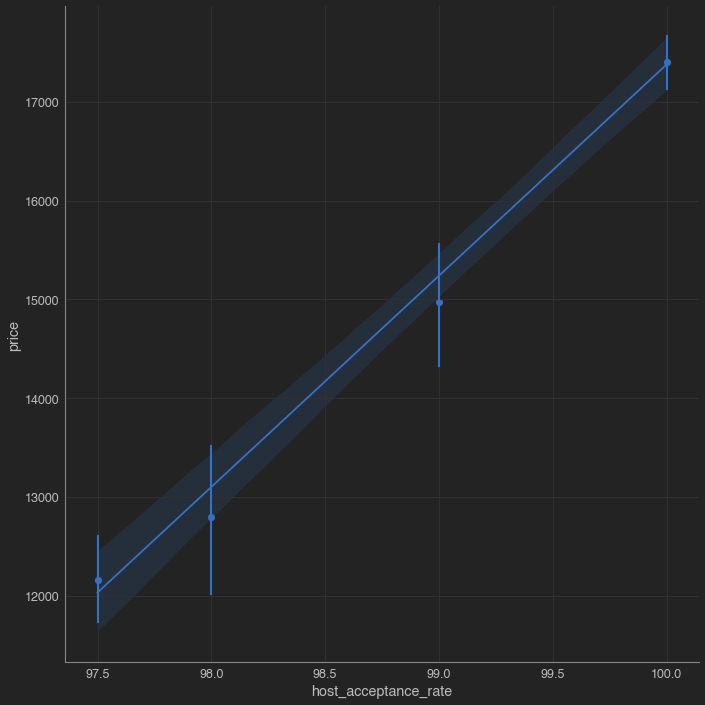

In [65]:
sns.lmplot(x="host_acceptance_rate", y="price", data=airbnb, x_estimator=np.mean,size=10);
plt.savefig('Host Acceptance vs Price.png');

Untuk data host_acceptance_rate terlihat berhubungan linear. yang mana menunjukkan semakin tinggi rate nya maka semakin besar juga harganya

In [66]:
airbnb.pivot_table(index='host_acceptance_rate', values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
                       price      price         price         price
host_acceptance_rate                                               
97.5                  1075.0  40178.875  12156.725996  2.715813e+07
98.0                  1509.0  40178.875  12795.010802  8.291167e+06
99.0                  1935.0  40178.875  14969.594115  1.666116e+07
100.0                 1075.0  40178.875  17403.603937  1.497580e+08

# ACCOMODATES VS PRICE

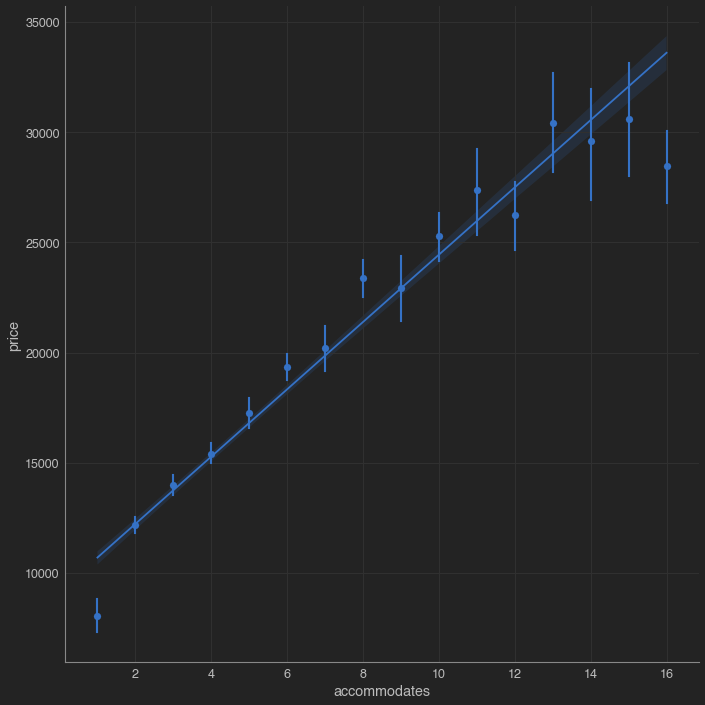

In [67]:
sns.lmplot(x="accommodates", y="price", data=airbnb, x_estimator=np.mean,size=10)
plt.savefig('Accomodates vs Price.png');

In [113]:
airbnb[numerical_feature].columns

Index(['host_id', 'reviews_per_month', 'review_scores_rating',
       'availability_365', 'guests_included', 'beds', 'bedrooms',
       'accommodates', 'longitude', 'latitude', 'host_acceptance_rate',
       'host_response_rate', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people'],
      dtype='object')

In [70]:
airbnb.pivot_table(index='accommodates', values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
               price      price         price         price
accommodates                                               
1             1075.0  40178.875   8065.250396  7.645857e+06
2             1075.0  40178.875  12181.419643  3.785985e+07
3             2042.0  40178.875  14000.145734  2.928830e+07
4             1505.0  40178.875  15420.702982  3.193628e+07
5             1505.0  40178.875  17267.278592  1.502253e+07
6             1075.0  40178.875  19353.177525  2.279804e+07
7             1935.0  40178.875  20207.300853  7.698982e+06
8             2480.0  40178.875  23368.013760  1.507237e+07
9             1935.0  40178.875  22918.170964  5.110752e+06
10            1182.0  40178.875  25271.238542  9.097646e+06
11            3010.0  40178.875  27376.234223  2.819752e+06
12            1397.0  40178.875  26243.059343  5.196126e+06
13            5052.0  40178.875  30413.852500  1.520693e+06
14            1505.0  40178.875  29598.472222  2.131090e+06
15            8949.0  40178.875  30587.002500  1.529350e+06
16            1720.0  40178.875  28449.553785  7.140838e+06

# BEDROOMS VS PRICE

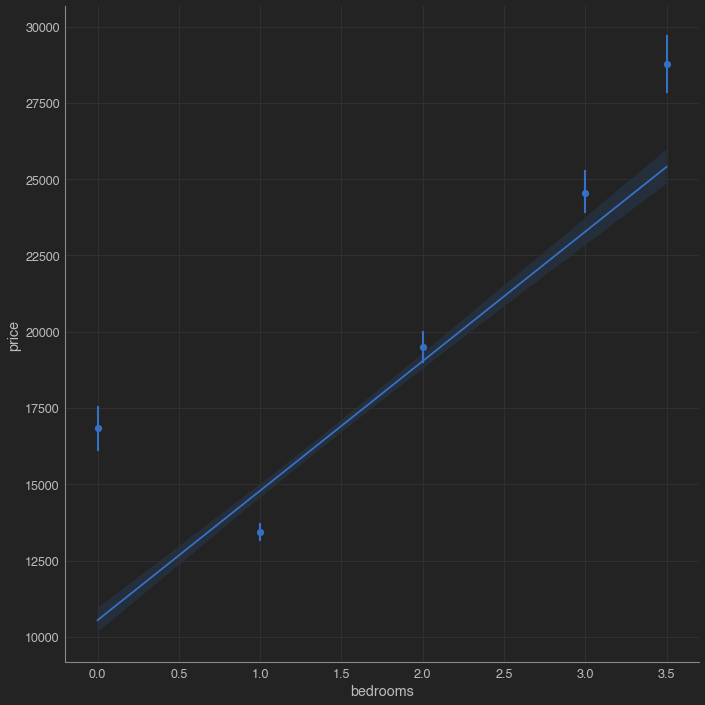

In [72]:
sns.lmplot(x="bedrooms", y="price", data=airbnb, x_estimator=np.mean,size=10);
plt.savefig('Bedrooms vs Price.png')

In [75]:
airbnb.pivot_table(index=['bedrooms','year'], values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
                 price      price         price         price
bedrooms year                                                
0.0      2011  19672.0  25047.000  23703.250000  9.481300e+04
         2012   6987.0  27950.000  13553.400000  6.776700e+04
         2013   3762.0  15050.000   6407.131579  2.434710e+05
         2014   1935.0  40178.875  12752.438830  5.993646e+05
         2015   1182.0  40178.875  13478.318798  1.738703e+06
         2016   3547.0  40178.875  17170.251786  2.403835e+06
         2017   3977.0  40178.875  13210.749290  2.325092e+06
         2018   2472.0  40178.875  17312.232353  4.414619e+06
         2019   2795.0  40178.875  21283.550686  6.981005e+06
         2020   3010.0  40178.875  17586.681452  1.090374e+06
1.0      2010   4192.0  10750.000   7596.333333  2.278900e+04
         2011   3010.0  35045.000  12727.642857  3.563740e+05
         2012   4192.0  40178.875  26982.991667  4.047449e+05
         2013   1720.0  40178.875  12695.622899  1.510779e+06
         2014   2042.0  40178.875  10219.624621  3.372476e+06
         2015   1075.0  40178.875  12096.223279  1.335423e+07
         2016   1075.0  40178.875  11835.665681  1.251030e+07
         2017   1505.0  40178.875  10767.100731  1.031488e+07
         2018   1075.0  40178.875  12639.475471  2.479865e+07
         2019   1720.0  40178.875  15930.047858  3.366019e+07
         2020   1505.0  40178.875  18888.104318  1.038846e+07
2.0      2011   4945.0  19350.000  12147.500000  2.429500e+04
         2012   7955.0   7955.000   7955.000000  7.955000e+03
         2013   5912.0  40178.875  24477.611702  1.150448e+06
         2014   1505.0  40178.875  19145.439560  1.742235e+06
         2015   1935.0  40178.875  16127.696360  4.209329e+06
         2016   2049.0  40178.875  18964.633333  4.835982e+06
         2017   2588.0  40178.875  18405.388966  3.294565e+06
         2018   2372.0  40178.875  20179.301506  8.374410e+06
         2019   2472.0  40178.875  20637.692637  9.039309e+06
         2020   1505.0  40178.875  22168.324219  2.128159e+06
3.0      2013  13222.0  40178.875  26431.593750  4.229055e+05
         2014   6020.0  40178.875  26780.117647  1.365786e+06
         2015   3977.0  40178.875  22503.080882  2.677867e+06
         2016   3332.0  40178.875  24318.701858  3.599168e+06
         2017   3450.0  40178.875  23119.462264  2.450663e+06
         2018   1397.0  40178.875  25787.495490  5.002774e+06
         2019   4300.0  40178.875  24664.813514  4.562990e+06
         2020   3019.0  40178.875  25102.892857  1.054322e+06
3.5      2012  19457.0  25047.000  23183.666667  6.955100e+04
         2013  17845.0  40178.875  33752.875000  4.387874e+05
         2014   1720.0  40178.875  26226.452703  9.703788e+05
         2015   3977.0  40178.875  25366.577744  2.080059e+06
         2016   5052.0  40178.875  29443.903947  2.797171e+06
         2017   3010.0  40178.875  25169.540909  1.384325e+06
         2018   3010.0  40178.875  32274.426471  3.840657e+06
         2019   7847.0  40178.875  28471.585396  2.875630e+06
         2020   3977.0  40178.875  31377.865385  8.158245e+05

# BEDS VS PRICE

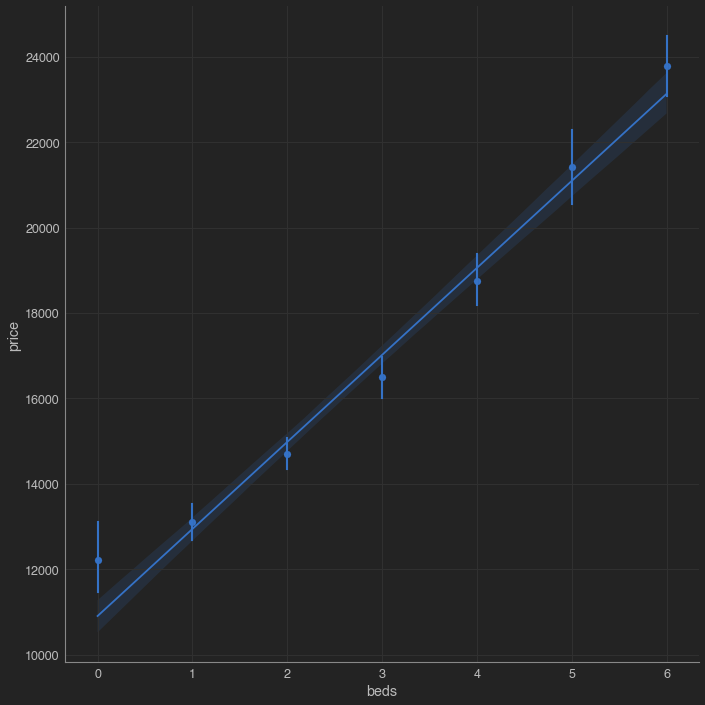

In [76]:
sns.lmplot(x="beds", y="price", data=airbnb, x_estimator=np.mean,size=10);
plt.savefig('Beds vs Price.png');

In [77]:
airbnb.pivot_table(index=['beds','year'], values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
             price      price         price         price
beds year                                                
0.0  2012   5391.0  19995.000  12693.000000  2.538600e+04
     2013   2687.0   6020.000   4634.111111  4.170700e+04
     2014   2480.0  39990.000   9425.187500  3.016060e+05
     2015   1397.0  40178.875  14620.823529  1.491324e+06
     2016   1075.0  40178.875   8823.088010  8.646626e+05
     2017   2480.0  35045.000  10746.145455  5.910380e+05
     2018   1182.0  40178.875  11928.588362  1.383716e+06
     2019   2795.0  40178.875  13643.526786  1.910094e+06
     2020   3010.0  40178.875  15404.540816  7.548225e+05
1.0  2010   4192.0   7847.000   6019.500000  1.203900e+04
     2011   3010.0  19780.000   6579.700000  6.579700e+04
     2012   4192.0  27950.000   9107.000000  5.464200e+04
     2013   1720.0  40178.875  10234.330357  5.731225e+05
     2014   1935.0  40178.875  10545.819182  1.676785e+06
     2015   1182.0  40178.875  12974.203363  5.111836e+06
     2016   1075.0  40178.875  11676.391765  4.962466e+06
     2017   1505.0  40178.875   9090.585961  3.027165e+06
     2018   1290.0  40178.875   9907.114043  8.024762e+06
     2019   1827.0  40178.875  17116.147256  1.528472e+07
     2020   1505.0  40178.875  19338.472584  5.202049e+06
2.0  2010  10750.0  10750.000  10750.000000  1.075000e+04
     2011   3977.0  19887.000  15603.214286  2.184450e+05
     2012   5052.0  40178.875  34056.079545  3.746169e+05
     2013   2150.0  40178.875  13818.851786  9.673196e+05
     2014   2049.0  40178.875  11875.836667  1.781376e+06
     2015   1075.0  40178.875  11611.342967  6.026287e+06
     2016   1075.0  40178.875  13890.177714  6.653395e+06
     2017   1505.0  40178.875  11111.859611  5.144791e+06
     2018   1509.0  40178.875  15379.942635  1.310371e+07
     2019   1720.0  40178.875  16951.550972  1.700241e+07
     2020   2472.0  40178.875  19416.582979  4.562897e+06
3.0  2011   3977.0  25047.000  16812.600000  8.406300e+04
     2012   7332.0  18490.000  12911.000000  2.582200e+04
     2013   2480.0  40178.875  15581.048387  4.830125e+05
     2014   2580.0  40178.875  16474.087500  9.884452e+05
     2015   2687.0  40178.875  14286.710470  3.343090e+06
     2016   2042.0  40178.875  15991.838201  3.422253e+06
     2017   2480.0  40178.875  14719.994213  3.179519e+06
     2018   1075.0  40178.875  17779.174552  6.951657e+06
     2019   2257.0  40178.875  16975.044851  7.995246e+06
     2020   2687.0  40178.875  19856.214096  1.866484e+06
4.0  2011   8062.0   9675.000   8868.500000  1.773700e+04
     2012  25047.0  25047.000  25047.000000  2.504700e+04
     2013   3019.0  40178.875  24816.681818  8.189505e+05
     2014   1505.0  40178.875  16767.468750  8.719084e+05
     2015   1612.0  40178.875  15610.696970  2.575765e+06
     2016   1505.0  40178.875  18362.219675  3.103215e+06
     2017   1827.0  40178.875  17091.318528  3.366990e+06
     2018   2257.0  40178.875  18068.955383  6.125376e+06
     2019   2042.0  40178.875  21598.137341  6.781815e+06
     2020   5052.0  40178.875  22240.656250  1.067552e+06
5.0  2011  19350.0  19350.000  19350.000000  1.935000e+04
     2012  19457.0  19457.000  19457.000000  1.945700e+04
     2013  12577.0  40178.875  27582.037500  2.758204e+05
     2014   3870.0  40178.875  18032.286290  5.590009e+05
     2015   1935.0  40178.875  18072.313187  1.644580e+06
     2016   2049.0  40178.875  20338.263889  2.013488e+06
     2017   2472.0  40178.875  22024.276786  1.541699e+06
     2018   5052.0  40178.875  23662.938433  3.170834e+06
     2019   2472.0  40178.875  21614.443376  2.528890e+06
     2020   7955.0  40178.875  25159.350962  6.541431e+05
6.0  2011  35045.0  35045.000  35045.000000  7.009000e+04
     2012  25047.0  25047.000  25047.000000  2.504700e+04
     2013   3977.0  40178.875  25269.093750  6.064582e+05
     2014   1720.0  40178.875  25987.767361  1.871119e+06
     2015   1505.0  40178.875  20354.239474  3.867306e+06
     2016   2

# GUEST INCLUDED VS PRICE

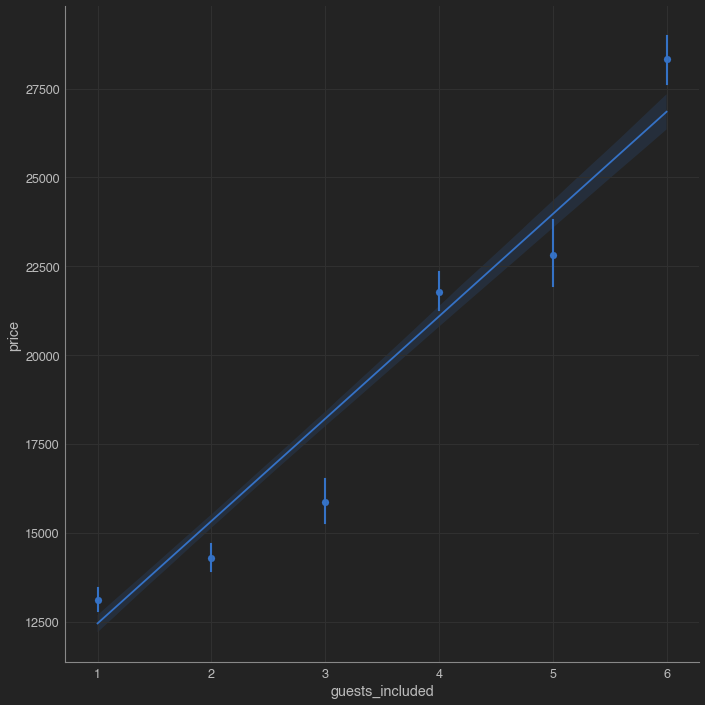

In [78]:
sns.lmplot(x="guests_included", y="price", data=airbnb, x_estimator=np.mean,size=10);
plt.savefig('Guest Included vs Price.png')

# MULTIVARIATE ANALYSIS

# Mendapatkan analisis data Airbnb yang legal berdasarkan aturan "Minpaku Law" mengenai maksimum hari dapat beroperasinya sebuah Airbnb pertahun.

In [79]:
airbnb_legal = airbnb[airbnb['availability_365']<=180]

In [120]:
airbnb.shape[0]

12600

In [80]:
airbnb_legal.shape[0]

7526

## Terdapat 7526 airbnb yang legal atau mematuhi peraturan terkait Minpaku Law tentang 180 hari beroperasinya sebuah Airbnb. Selanjutnya akan dilakukan analisis lebih dalam terkait Areanya, Neighbourhood, Room Type dan Spesifikasi lainnya.

In [81]:
latitude = airbnb_legal['latitude'].tolist()
longitude = airbnb_legal['longitude'].tolist()
locations = list(zip(latitude, longitude))
m = folium.Map([35.6812,139.7671],zoom_start=11,tiles='CartoDB dark_matter')
folium.Marker(location=[35.6812,139.7671],popup='<strong>Tokyo', tooltip='Click for more information',icon=folium.Icon(color='pink')).add_to(m)
folium.Marker(location=[35.6779, 139.7145],popup='<strong>Tokyo Olympic Stadium</strong><br>Sports: Athletics,Football', tooltip='Click for more information',icon=folium.Icon(color='blue')).add_to(m)
folium.Marker(location=[35.641014,139.792048],popup='<strong>Ariake Gymnastic Centre</strong><br>Sports: Gymnastic', tooltip='Click for more information',icon=folium.Icon(color='lightgray')).add_to(m)
folium.Marker(location=[35.651403, 139.815074],popup='<strong>Tokyo Aquatics Centre</strong><br>Sports: Swimming', tooltip='Click for more information',icon=folium.Icon(color='red')).add_to(m)
folium.Marker(location=[35.6933, 139.7499],popup='<strong>Nippon Budokan</strong><br>Sports: Karate', tooltip='Click for more information',icon=folium.Icon(color='beige')).add_to(m)
folium.Marker(location=[35.6767, 139.7638],popup='<strong>Tokyo International Forum</strong><br>Sports: Weightlifting', tooltip='Click for more information',icon=folium.Icon(color='darkpurple')).add_to(m)
FastMarkerCluster(data=locations).add_to(m)
m

Data yang legal merupakan yang memiliki lokasi dekat dengan Pusat kota. Hal ini makin membuat saya mengerti, bahwa dampaknya sangat terlihat setelah sebelumnya persebaran sangat luas akan tetapi sekarang hanya tersisa sedikit saja. Hal ini tepatnya terjadi pada tahun 2018 pertengahan menuju akhir. Berdasarkan berita-berita pun, dampak ini paling terasa di bulan ke 9 dimana ribuan yang dibatalkan hampir 50% menurut sumber terpercaya. Untuk selanjutnya akan dianalisa terkait jumlah area yang terdaftar legal dan analisis umum lainnya terkait data airbnb legal ini.

# NEIGHBOURHOOD

In [82]:
airbnb_legal['neighbourhood_cleansed'].nunique()

51

In [83]:
airbnb_legal['neighbourhood_cleansed'].unique()

array(['Shibuya Ku', 'Setagaya Ku', 'Shinjuku Ku', 'Adachi Ku',
       'Meguro Ku', 'Toshima Ku', 'Koto Ku', 'Shinagawa Ku',
       'Akishima Shi', 'Bunkyo Ku', 'Katsushika Ku', 'Edogawa Ku',
       'Arakawa Ku', 'Suginami Ku', 'Chuo Ku', 'Nakano Ku', 'Kita Ku',
       'Minato Ku', 'Mitaka Shi', 'Taito Ku', 'Hino Shi', 'Musashino Shi',
       'Koganei Shi', 'Kokubunji Shi', 'Itabashi Ku', 'Machida Shi',
       'Chiyoda Ku', 'Sumida Ku', 'Kodaira Shi', 'Fuchu Shi', 'Tama Shi',
       'Chofu Shi', 'Nerima Ku', 'Higashimurayama Shi', 'Hachioji Shi',
       'Nishitokyo Shi', 'Ota Ku', 'Hinohara Mura', 'Ome Shi',
       'Kunitachi Shi', 'Higashiyamato Shi', 'Okutama Machi',
       'Niijima Mura', 'Oshima Machi', 'Komae Shi', 'Hachijo Machi',
       'Musashimurayama Shi', 'Inagi Shi', 'Miyake Mura',
       'Higashikurume Shi', 'Fussa Shi'], dtype=object)

Bisa dilihat tidak ada area adachi,koganei shi,ogasawara,akiruno shi disini. Setelah ditelaah melalui riset, tidak terlihat penyebab yang jelas tentang hal tersebut akan tetapi berdasarkan uji value_counts sebelumnya. Area tersebut memang termasuk area tersedikit untuk jumlah Airbnb di Tokyo. Dari penilitan wikipedia ditemukan ke empat area ini merupakan area yang jauh dari pusat kota 40 hingga 50 km jaraknya. Dan juga akses untuk kesana sangatlah sedikit yaitu hanya kereta dengan sedikit line(jalur/jurusan) dan tol saja. 

https://en.wikipedia.org/wiki/Akiruno,_Tokyo

https://en.wikipedia.org/wiki/Koganei,_Tokyo

https://en.wikipedia.org/wiki/Ogasawara,_Tokyo

https://en.wikipedia.org/wiki/Adachi,_Tokyo



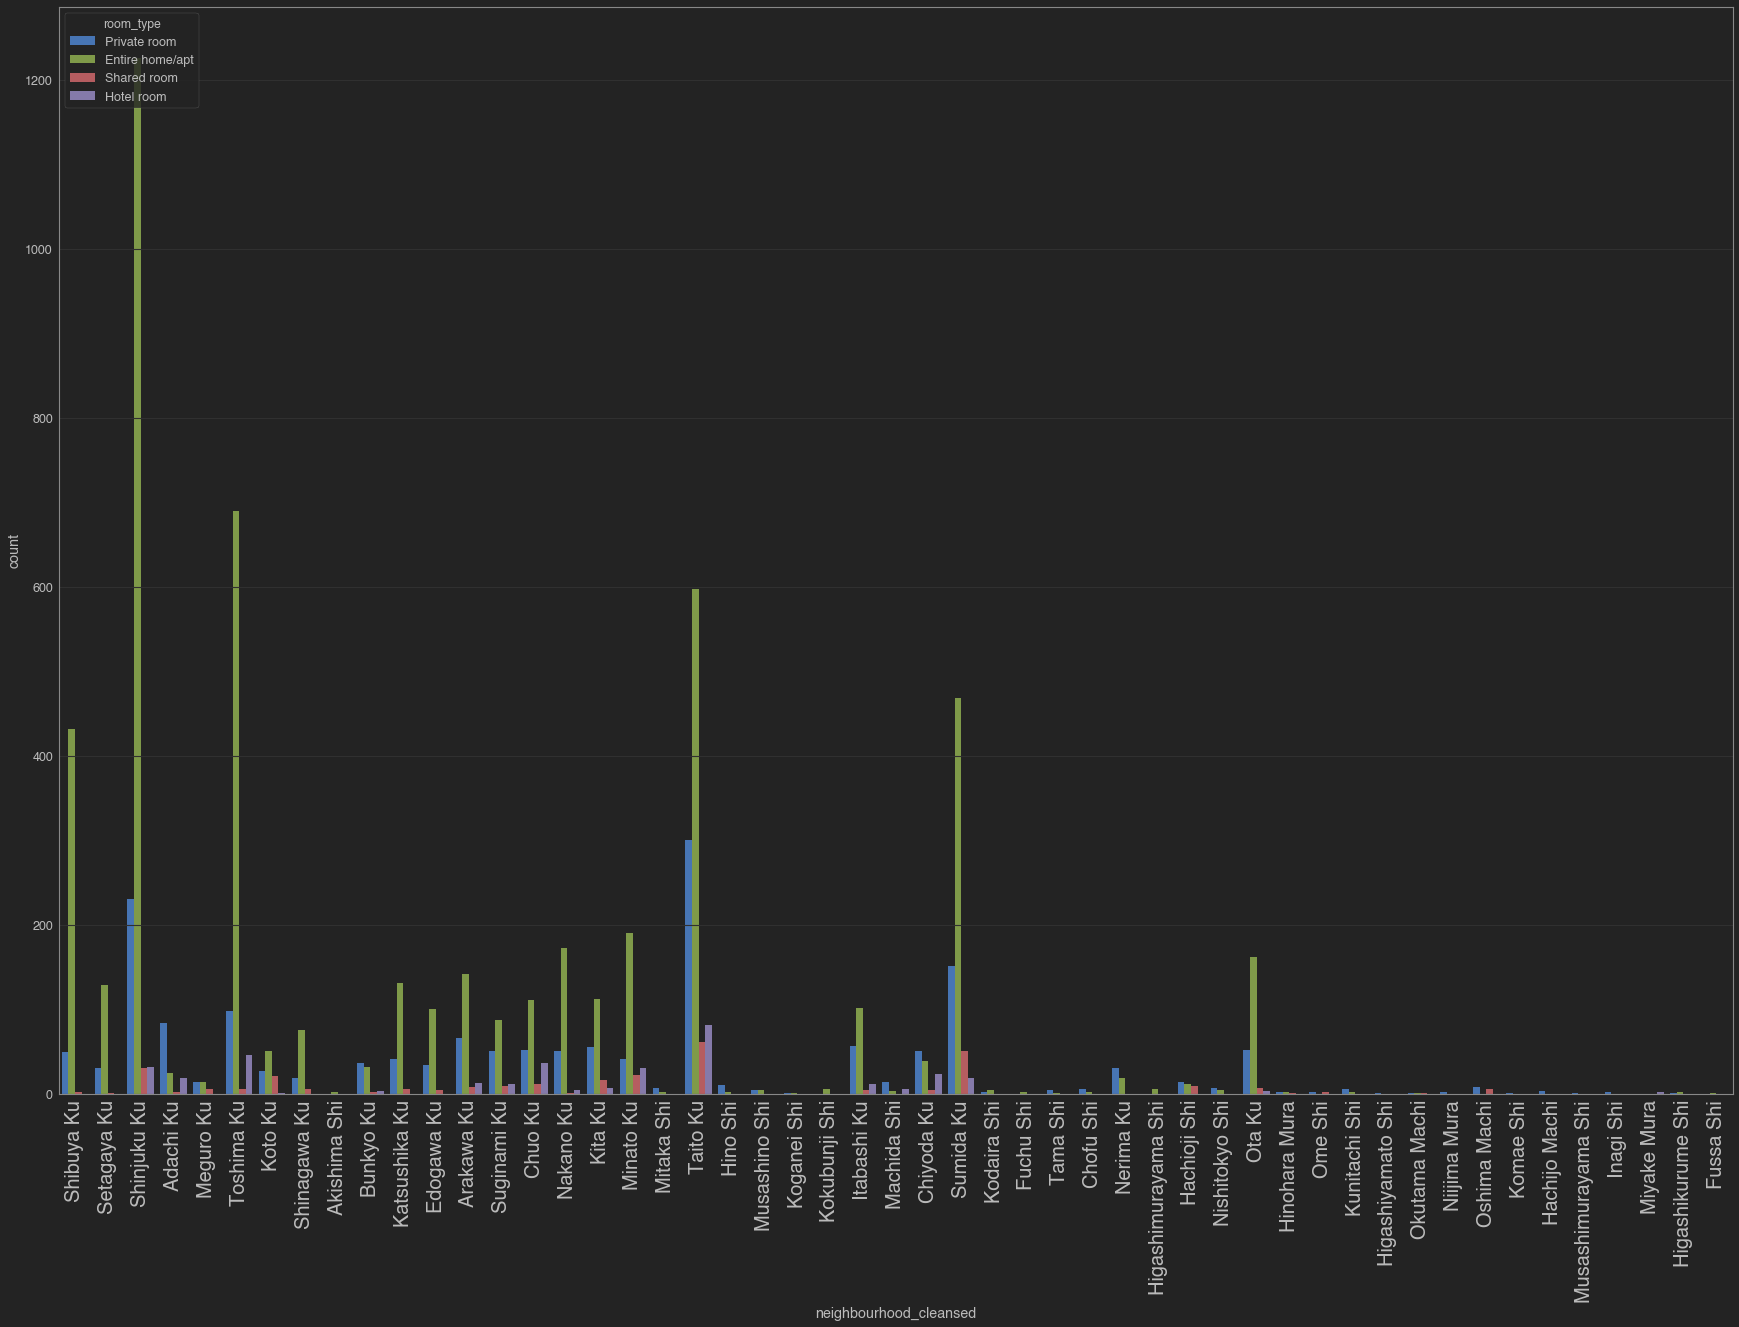

In [85]:
plt.figure(figsize=(30,20))
g= sns.countplot(data=airbnb_legal, x='neighbourhood_cleansed',hue='room_type') #memvisualisasikan jumlah setiap type properti dengan seabron countplot
g.set_xticklabels(g.get_xticklabels(),fontsize=20, rotation=90)
plt.savefig('Neighbourhood.png')

Untuk type ruangan sendiri, area Shinjuku di airbnb legal ini masih menjadi yang pertama untuk Entire home/Apt, dan Taito Untuk Private Room,Shared Room dan Hotel room. Sisanya tidak terlalu banyak perubahan hanya nilainya saja yang berkurang.

# ROOM TYPE

In [80]:
airbnb_legal['room_type'].value_counts()

Entire home/apt    5166
Private room       1715
Hotel room          346
Shared room         299
Name: room_type, dtype: int64

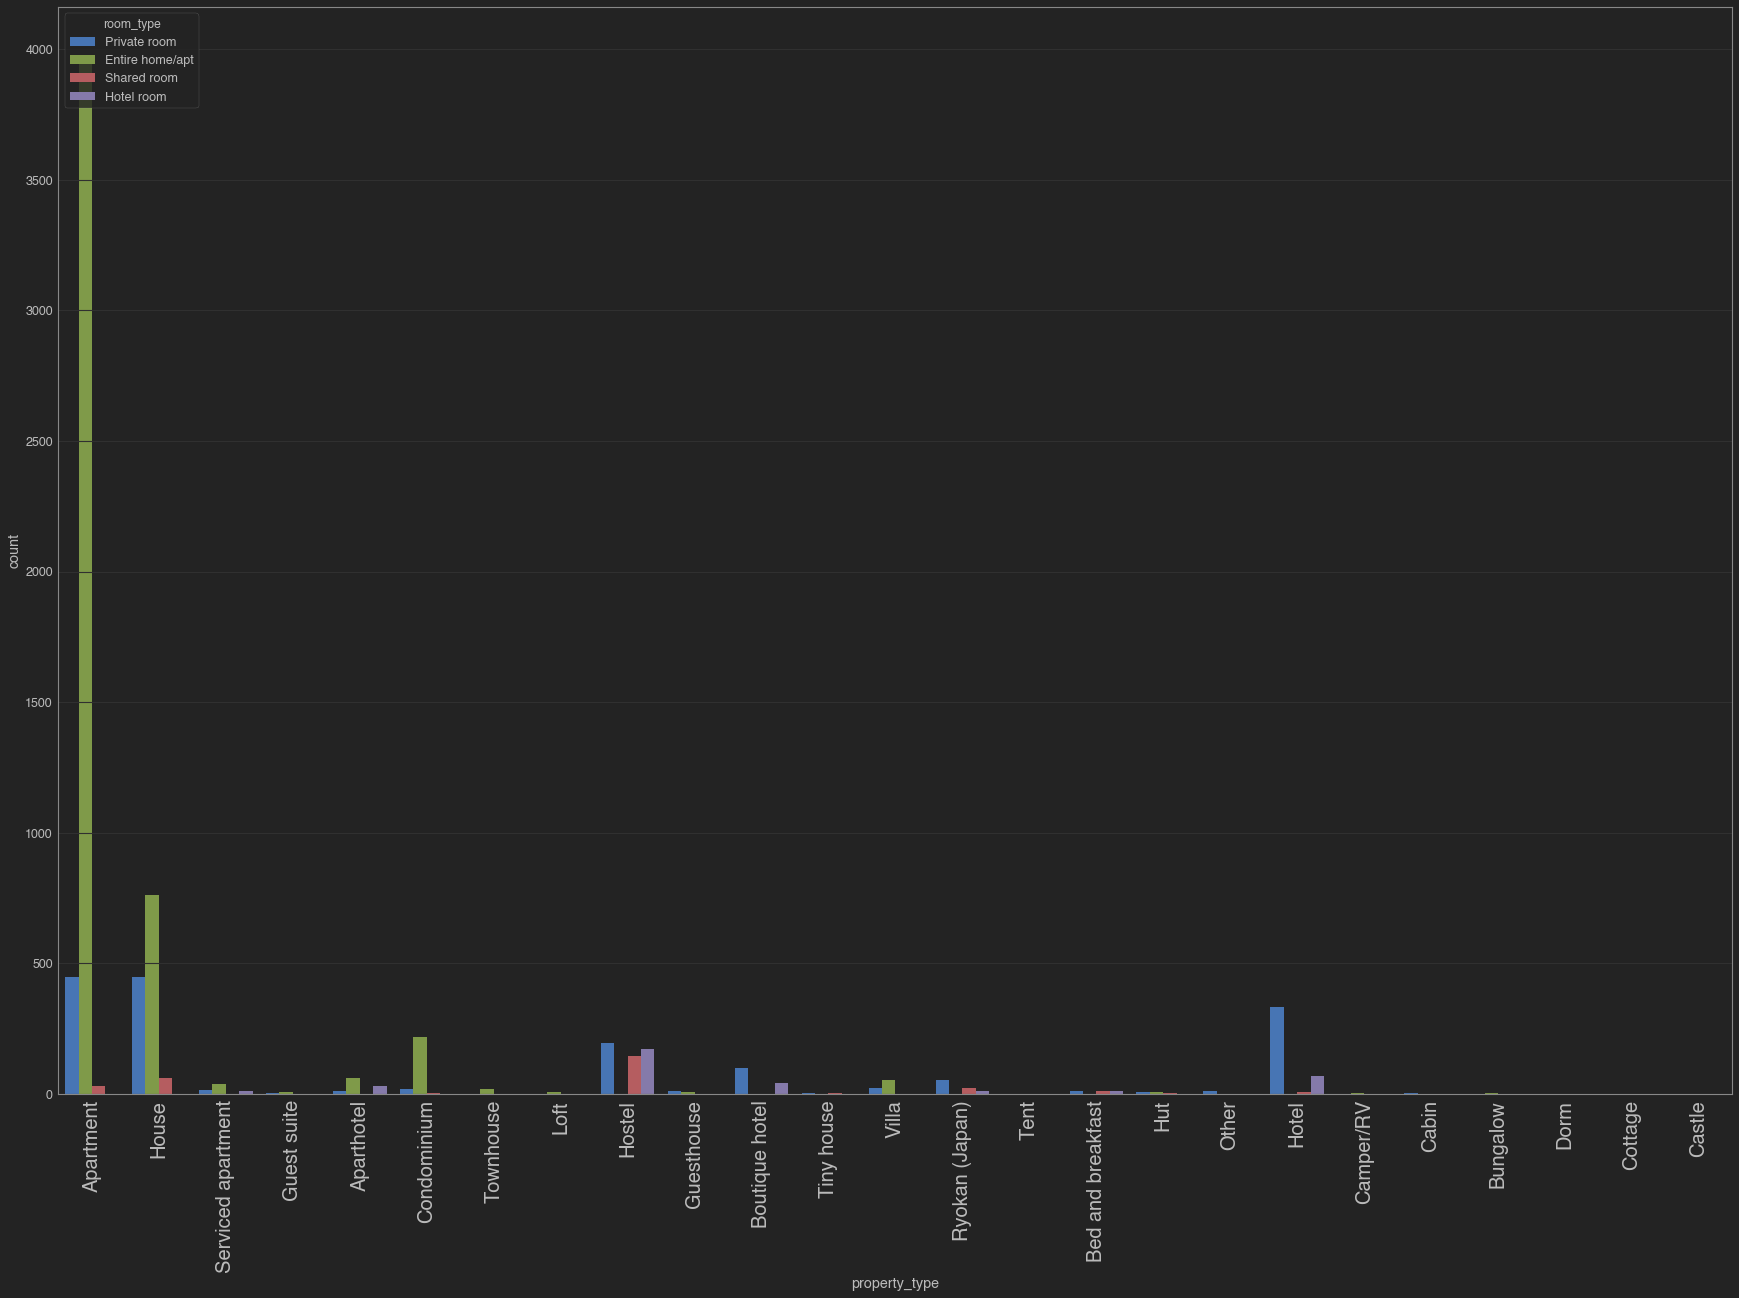

In [123]:
plt.figure(figsize=(30,20))
g= sns.countplot(data=airbnb_legal, x='property_type',hue='room_type') #memvisualisasikan jumlah setiap type properti dengan seabron countplot
g.set_xticklabels(g.get_xticklabels(),fontsize=20, rotation=90)
plt.savefig('Property hue Room type.png')

untuk property type sendiri juga sama, apartment masih yang nomor 1, yang mana banyak bertipe ruangan Entire home/apt dengan jumlah 3964 dan terbanyak di Shinjuku dengan total 1008,untuk private room ada kesamaan untuk property tipe apartment(450,Shinjuku 66), house(450,Shinjuku 39). Lalu untuk shared dan hotel room paling banyak di property hostel. Terdapat 146 shared room dan terbanyak di Taito dengan 45. Untuk hotel room berjumlah 172 dan terbanyak di Chuo Ku. Chuo akan saya bahas disini setelah dua yang lain sudah sering dibahas sebelumnya. Menurut sumber Area Chuo ini merupakan area yang terkenal dengan perkantoran perusahaan-perusahaan Internasional. Salah satunya IBM, Astellas Pharma, a global pharmaceutical company, KOSÉ perusahaan kosmetik internasional. Dan juga perusahaan Jepang yang sudah mendunia seperti Kao, Ajinomoto. Hal ini mungkin sangat sebanding dengan banyaknya jumlah hotel disana untuk menampung tamu-tamu asing di area tersebut.

https://en.wikipedia.org/wiki/Chūō,_Tokyo

In [138]:
entire = airbnb_legal[(airbnb_legal['property_type']=="Apartment")&(airbnb_legal['room_type']=="Entire home/apt")]

In [139]:
entire.pivot_table(index=['property_type'], values='host_id', aggfunc=['count'])

count
              host_id
property_type        
Apartment        3964

In [140]:
entire.pivot_table(index=['property_type','neighbourhood_cleansed'], values='host_id', aggfunc=['count'])

count
                                     host_id
property_type neighbourhood_cleansed        
Apartment     Adachi Ku                   10
              Akishima Shi                 1
              Arakawa Ku                 114
              Bunkyo Ku                   24
              Chiyoda Ku                  35
              Chofu Shi                    1
              Chuo Ku                    101
              Edogawa Ku                  72
              Fussa Shi                    1
              Hachioji Shi                 6
              Higashikurume Shi            2
              Higashimurayama Shi          6
              Hino Shi                     1
              Itabashi Ku                 71
              Katsushika Ku               59
              Kita Ku                     71
              Kodaira Shi                  1
              Koganei Shi                  1
              Kokubunji Shi                6
              Koto Ku                     29
              Kunitachi Shi                2
              Meguro Ku                    4
              Minato Ku                  139
              Mitaka Shi                   1
              Musashino Shi                3
              Nakano Ku                  125
              Nerima Ku                   17
              Nishitokyo Shi               3
              Ota Ku                     132
              Setagaya Ku                105
              Shibuya Ku                 354
              Shinagawa Ku                45
              Shinjuku Ku               1008
              Suginami Ku                 72
              Sumida Ku                  354
              Taito Ku                   451
              Toshima Ku                 537

In [144]:
PrivateApt = airbnb_legal[(airbnb_legal['property_type']=="Apartment")&(airbnb_legal['room_type']=="Private room")]
PrivateHouse = airbnb_legal[(airbnb_legal['property_type']=="House")&(airbnb_legal['room_type']=="Private room")]
PrivateHostel = airbnb_legal[(airbnb_legal['property_type']=="Hostel")&(airbnb_legal['room_type']=="Private room")]

In [143]:
PrivateApt.pivot_table(index=['property_type'], values='host_id', aggfunc=['count'])

count
              host_id
property_type        
Apartment         450

In [147]:
PrivateApt.pivot_table(index=['property_type','neighbourhood_cleansed'], values='host_id', aggfunc=['count'])

count
                                     host_id
property_type neighbourhood_cleansed        
Apartment     Adachi Ku                   64
              Arakawa Ku                  25
              Bunkyo Ku                    4
              Chiyoda Ku                   5
              Chuo Ku                     24
              Edogawa Ku                   1
              Hino Shi                     5
              Itabashi Ku                 30
              Katsushika Ku                8
              Kita Ku                      6
              Komae Shi                    1
              Koto Ku                      8
              Kunitachi Shi                2
              Machida Shi                  4
              Meguro Ku                    1
              Minato Ku                    4
              Mitaka Shi                   4
              Nakano Ku                   23
              Nerima Ku                   17
              Ota Ku                       5
              Setagaya Ku                 10
              Shibuya Ku                   5
              Shinjuku Ku                 66
              Suginami Ku                 14
              Sumida Ku                   46
              Taito Ku                    42
              Toshima Ku                  26

In [145]:
PrivateHouse.pivot_table(index=['property_type'], values='host_id', aggfunc=['count'])

count
              host_id
property_type        
House             450

In [148]:
PrivateHouse.pivot_table(index=['property_type','neighbourhood_cleansed'], values='host_id', aggfunc=['count'])

count
                                     host_id
property_type neighbourhood_cleansed        
House         Adachi Ku                   20
              Arakawa Ku                  15
              Bunkyo Ku                    7
              Chofu Shi                    5
              Chuo Ku                      1
              Edogawa Ku                  21
              Hachijo Machi                1
              Hachioji Shi                10
              Higashikurume Shi            1
              Higashiyamato Shi            1
              Hino Shi                     5
              Hinohara Mura                1
              Inagi Shi                    2
              Itabashi Ku                 16
              Katsushika Ku               21
              Kita Ku                     12
              Kodaira Shi                  2
              Koganei Shi                  1
              Koto Ku                     12
              Kunitachi Shi                4
              Machida Shi                  4
              Meguro Ku                    9
              Minato Ku                    7
              Mitaka Shi                   3
              Musashimurayama Shi          1
              Musashino Shi                4
              Nakano Ku                   18
              Nerima Ku                   14
              Niijima Mura                 2
              Nishitokyo Shi               7
              Ome Shi                      1
              Ota Ku                      27
              Setagaya Ku                 15
              Shibuya Ku                  20
              Shinagawa Ku                11
              Shinjuku Ku                 39
              Suginami Ku                 30
              Sumida Ku                   27
              Taito Ku                    30
              Tama Shi                     2
              Toshima Ku                  21

In [146]:
PrivateHostel.pivot_table(index=['property_type'], values='host_id', aggfunc=['count'])

count
              host_id
property_type        
Hostel            195

In [124]:
shared = airbnb_legal[(airbnb_legal['property_type']=="Hostel")&(airbnb_legal['room_type']=="Shared room")]

In [130]:
shared.pivot_table(index=['property_type'], values='host_id', aggfunc=['count'])

count
              host_id
property_type        
Hostel            146

In [132]:
shared.pivot_table(index=['property_type','neighbourhood_cleansed'], values='host_id', aggfunc=['count'])

count
                                     host_id
property_type neighbourhood_cleansed        
Hostel        Arakawa Ku                   2
              Bunkyo Ku                    1
              Chiyoda Ku                   2
              Chuo Ku                      8
              Edogawa Ku                   2
              Hachioji Shi                 9
              Katsushika Ku                1
              Kita Ku                     10
              Koto Ku                      4
              Minato Ku                   22
              Okutama Machi                1
              Oshima Machi                 6
              Ota Ku                       4
              Shibuya Ku                   2
              Shinagawa Ku                 2
              Shinjuku Ku                  2
              Sumida Ku                   22
              Taito Ku                    45
              Toshima Ku                   1

In [125]:
hotel = airbnb_legal[(airbnb_legal['property_type']=="Hostel")&(airbnb_legal['room_type']=="Hotel room")]

In [133]:
hotel.pivot_table(index=['property_type'], values='host_id', aggfunc=['count'])

count
              host_id
property_type        
Hostel            172

In [134]:
hotel.pivot_table(index=['property_type','neighbourhood_cleansed'], values='host_id', aggfunc=['count'])

count
                                     host_id
property_type neighbourhood_cleansed        
Hostel        Adachi Ku                   10
              Arakawa Ku                   4
              Chiyoda Ku                   9
              Chuo Ku                     34
              Itabashi Ku                  3
              Kita Ku                      6
              Machida Shi                  5
              Minato Ku                   30
              Ota Ku                       3
              Shinjuku Ku                 24
              Suginami Ku                 11
              Sumida Ku                    8
              Taito Ku                    17
              Toshima Ku                   8

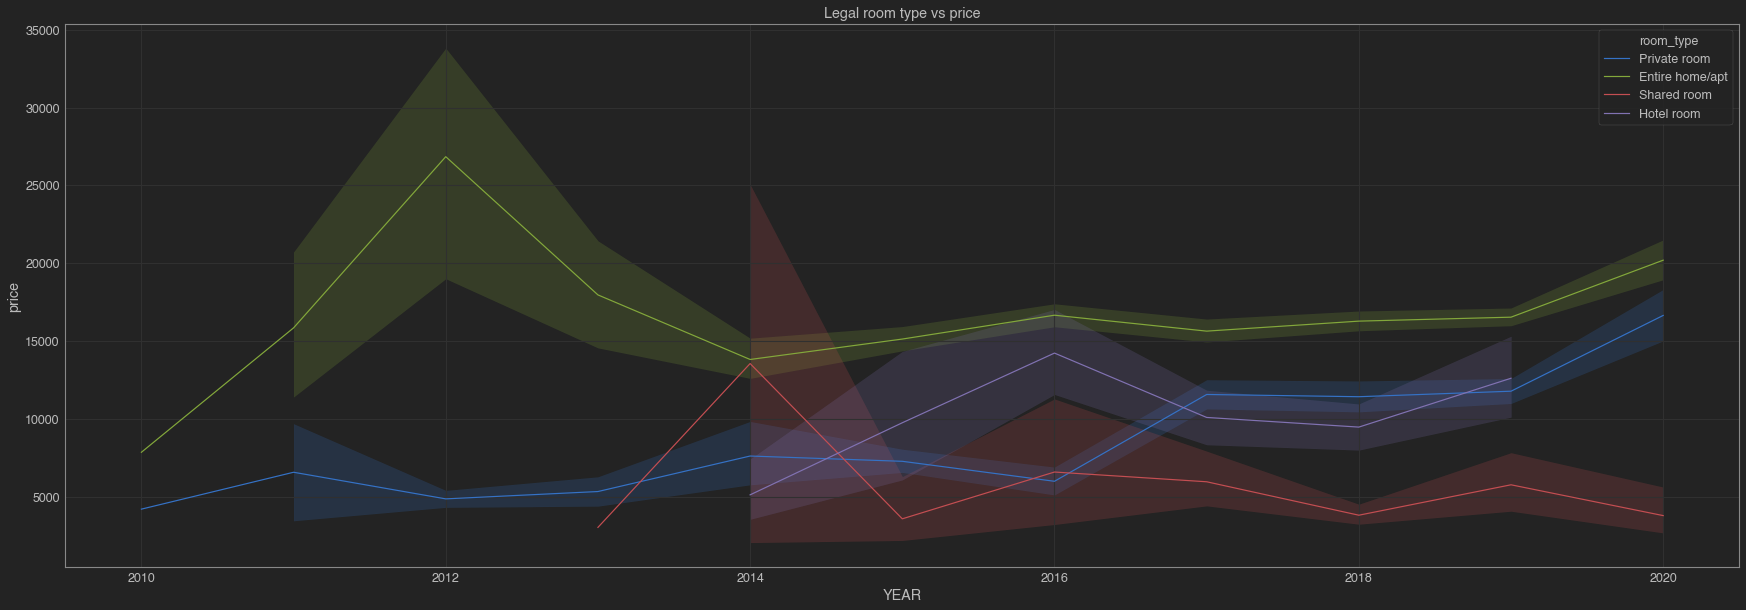

In [87]:
plt.figure(figsize=(30,10))
sns.lineplot(x='year', y='price', data=airbnb_legal, hue='room_type')
plt.xlabel('YEAR')
plt.title('Legal room type vs price');

Perkembangan harga di disini sangat besar untuk Entire home/Apt. Dimana banyak yang turun di 2018 ataupun stagnan, Entire home/Apt malah cenderung naik meskipun tidak banyak diangka 18000 yen ke 20000 yen. Lalu ada hal baru lagi yang kita dapatkan disini bahwa, Hotel Room berhenti tahun 2019. Setelah ditelaah ini terjadi karena banyak hotel yang memiliki bintang kecil (3 bintarng) memasang harga yang cukup mahal. Terlebih lagi disebutkan, kualitas dan amenities nya pun kurang apabila dibandingkan dengan Airbnb. Lalu Airbnb biasa memiliki experience lain yang ditawarkan Host, seperti tinggla di hotel mana pun di dunia. Jadi, meskipun sempat naik di 2016 akhirnya hotel room berusaha menyamakan price nya di tahun 2018 dan karena tidak berhasil untuk dapat untung akhirnya menyelesaikan kerja sama nya dengan airbnb di 2019 tepatnya awal 2019.

https://blog.btrax.com/traveling-to-japan-pros-and-cons-of-airbnb-vs-hotels-2/

In [88]:
airbnb_legal.pivot_table(index=['neighbourhood_cleansed','room_type'], values=['beds','bedrooms','accommodates','guests_included','host_response_rate','host_acceptance_rate','reviews_per_month','review_scores_rating','availability_365','price'],aggfunc=['median'],margins=True)

median                            \
                                       accommodates availability_365 bedrooms   
neighbourhood_cleansed room_type                                                
Adachi Ku              Entire home/apt          5.0             82.0      2.0   
                       Hotel room               2.0             89.0      1.0   
                       Private room             1.0             84.0      1.0   
                       Shared room              2.0            135.5      1.0   
Akishima Shi           Entire home/apt          2.0             84.0      1.0   
Arakawa Ku             Entire home/apt          3.0            154.5      1.0   
                       Hotel room               2.0             68.0      1.0   
                       Private room             4.0            143.0      1.0   
                       Shared room              1.0            153.0      1.0   
Bunkyo Ku              Entire home/apt          7.5            157.0      2.0   
                       Hotel room               5.0            168.0      1.0   
                       Private room             2.0             90.0      1.0   
                       Shared room             10.5            135.5      1.0   
Chiyoda Ku             Entire home/apt          4.0            130.0      1.0   
                       Hotel room               2.0             73.0      1.0   
                       Private room             3.0             88.5      1.0   
                       Shared room              1.0             80.5      1.0   
Chofu Shi              Entire home/apt          4.0            134.0      0.5   
                       Private room             2.0             93.0      1.0   
Chuo Ku                Entire home/apt          3.0             89.0      1.0   
                       Hotel room               1.0             20.0      1.0   
                       Private room             2.0            129.5      1.0   
                       Shared room              1.0            148.0      1.0   
Edogawa Ku             Entire home/apt          5.0             91.0      2.0   
                       Private room             3.0             96.0      1.0   
                       Shared room              1.5            161.5      1.0   
Fuchu Shi              Entire home/apt          8.5            109.0      2.5   
Fussa Shi              Entire home/apt          3.0             55.0      1.0   
Hachijo Machi          Private room             4.0              1.0      0.0   
Hachioji Shi           Entire home/apt          4.0             90.5      1.0   
                       Private room             4.0             88.5      1.0   
                       Shared room              1.0              9.0      1.0   
Higashikurume Shi      Entire home/apt          3.0             89.5      1.5   
                       Private room             3.0            172.0      1.0   
Higashimurayama Shi    Entire home/apt          3.5            133.5      1.0   
Higashiyamato Shi      Private room             2.0             93.0      0.0   
Hino Shi               Entire home/apt          4.5             89.0      2.0   
                       Private room             1.5            161.5      1.0   
Hinohara Mura          Entire home/apt          4.5             80.5      1.0   
                       Private room             5.0            106.0      1.0   
                       Shared room              7.0             91.0      1.0   
Inagi Shi              Private room             1.0             90.0      1.0   
Itabashi Ku            Entire home/apt          4.0            149.0      1.0   
                       Hotel room               2.0             89.0      1.0   
                       Private room             2.0             88.0      1.0   
                       Shared room              2.5            115.5      1.0   
Katsushika Ku          Entire home/apt          6.0             93.0      2.

# Mendapatkan analisis tentang perkembangan untuk Airbnb yang berlokasi dekat dengan venue yang akan dipakai pada 2020 Olympics
- top 5 closest

In [89]:
airbnb_legal.loc[(airbnb_legal['neighbourhood_cleansed'] == 'Shinjuku Ku') | 
           (airbnb_legal['neighbourhood_cleansed'] == 'Taito Ku') | 
           (airbnb_legal['neighbourhood_cleansed'] == 'Toshima Ku') | 
           (airbnb_legal['neighbourhood_cleansed'] == 'Sumida Ku') | 
           (airbnb_legal['neighbourhood_cleansed'] == 'Shibuya Ku') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Minato Ku') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Arakawa Ku') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Nakano Ku') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Ota Ku') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Chuo Ku') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Kita Ku') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Katsushika Ku') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Itabashi Ku') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Setagaya Ku') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Suginami Ku') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Edogawa Ku') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Adachi Ku') ,
           'Posisi'] = 'Dekat'
airbnb_legal.loc[(airbnb_legal['neighbourhood_cleansed'] == 'Chiyoda Ku') | 
           (airbnb_legal['neighbourhood_cleansed'] == 'Koto Ku') | 
           (airbnb_legal['neighbourhood_cleansed'] == 'Kokubunji Shi') | 
           (airbnb_legal['neighbourhood_cleansed'] == 'Shinagawa Ku') | 
           (airbnb_legal['neighbourhood_cleansed'] == 'Bunkyo Ku') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Nerima Ku') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Hachioji Shi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Meguro Ku') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Machida Shi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Oshima Machi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Hino Shi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Nishitokyo Shi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Mitaka Shi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Musashino Shi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Kunitachi Shi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Chofu Shi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Kodaira Shi') ,
           'Posisi'] = 'Menengah'
airbnb_legal.loc[(airbnb_legal['neighbourhood_cleansed'] == 'Higashimurayama Shi') | 
           (airbnb_legal['neighbourhood_cleansed'] == 'Hinohara Mura') | 
           (airbnb_legal['neighbourhood_cleansed'] == 'Tama Shi') | 
           (airbnb_legal['neighbourhood_cleansed'] == 'Ome Shi') | 
           (airbnb_legal['neighbourhood_cleansed'] == 'Okutama Machi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Hachijo Machi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Higashikurume Shi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Miyake Mura') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Inagi Shi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Akishima Shi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Niijima Mura') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Koganei Shi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Fuchu Shi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Higashiyamato Shi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Fussa Shi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Komae Shi') |
           (airbnb_legal['neighbourhood_cleansed'] == 'Musashimurayama Shi') ,
           'Posisi'] = 'Jauh'

Disini saya membuat kolom baru bernama posisi, berdasarkan kedekatan posisi neighbourhood terhadap lokasi Stadium. Dibagi menjadi tiga agar lebih mudah mengerti, yaitu dekat, menengah dan jauh. Jumlah yang dekat lebih banyak sedikit dibandingkan yang lain. Selanjutnya saya akan mencoba melihat lebih dalam tentang kolom baru ini.

In [90]:
airbnb_legal.head()

host_id                                               name  \
0    151977  La Casa Gaienmae C Harajuku, Omotesando is nearby   
5   1573631                 RELAX AT HOME:Shimo 5'/Shibuya 10'   
6   4799233                  Classy room @Shinjuku, Takadanoba   
8   5596383     WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya   
10  5686404        Stay with host Cozy private room Senju area   

    host_is_superhost                                 host_verifications  \
0               False  ['email', 'phone', 'facebook', 'reviews', 'jum...   
5                True  ['email', 'phone', 'facebook', 'reviews', 'jum...   
6               False  ['email', 'phone', 'facebook', 'reviews', 'jum...   
8                True  ['email', 'phone', 'reviews', 'manual_offline'...   
10               True  ['email', 'phone', 'reviews', 'jumio', 'offlin...   

    host_identity_verified neighbourhood_cleansed host_since property_type  \
0                     True             Shibuya Ku 2010-06-25     Apartment   
5                     True            Setagaya Ku 2012-01-06         House   
6                     True            Shinjuku Ku 2013-01-22     Apartment   
8                     True            Setagaya Ku 2013-03-24         House   
10                    True              Adachi Ku 2013-03-30         House   

          room_type                                          amenities  \
0      Private room  {TV,Internet,Wifi,Kitchen,"Paid parking off pr...   
5   Entire home/apt  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
6   Entire home/apt  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
8      Private room  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   
10     Private room  {TV,Internet,Wifi,"Air conditioning",Kitchen,"...   

                                              license  instant_bookable  \
0   Other reasons | \n弊社は不動産事業者であり賃貸住宅管理事業者でもあります。...             False   
5   Other reasons | We called and got confirmation...             False   
6   Other reasons | 【マンスリー契約】最低30泊以上の一時使用賃貸借契約を結びま...             False   
8                                          M130001107              True   
10                                         M130007760             False   

            cancellation_policy  reviews_per_month  review_scores_rating  \
0   strict_14_with_grace_period               0.18                  94.0   
5                      moderate               0.52                  96.0   
6                      moderate               1.05                  90.0   
8                      moderate               2.42                  99.0   
10  strict_14_with_grace_period               1.15                  94.0   

    availability_365  guests_included  beds  bedrooms  accommodates  \
0                 89              1.0   1.0       1.0             1   
5                 33              1.0   2.0       2.0             3   
6                172              3.0   4.0       1.0             3   
8                  2              1.0   1.0       1.0             2   
10                92              1.0   2.0       1.0             2   

    longitude  latitude  host_acceptance_rate  host_response_rate   price  \
0   139.71203  35.67152                 100.0           96.488942  4192.0   
5   139.65159  35.66832                  97.5          100.000000  7955.0   
6   139.69681  35.70865                 100.0          100.000000  5160.0   
8   139.67153  35.65833                 100.0          100.000000  6987.0   
10  139.79895  35.74409                  97.5          100.000000  3547.0   

    security_deposit  cleaning_fee  extra_people  year  month  day Posisi  
0            30000.0        5000.0           0.0  2010      6   25  Dekat  
5            25000.0        8000.0         550.0  2012      1    6  Dekat  
6                0.0        3000.0           0.0  2013      1   22  Dekat  
8            20000.0        4000.0        5000.0  2013      3   24  Dekat  
10           15000.0        2000.0        2000.0  2013    

In [95]:
airbnb_legal.pivot_table(index=['Posisi','year'], values='price', aggfunc=['count']).T

Posisi      Dekat                                                     Jauh  \
year         2010 2011 2012 2013 2014 2015 2016 2017  2018  2019 2020 2012   
count price     2   20   16   57  265  825  973  857  1548  1800  510    1   

Posisi                                         Menengah                      \
year        2014 2015 2016 2017 2018 2019 2020     2012 2013 2014 2015 2016   
count price    6    8    1    8   12    7    2        1   17   26   86   81   

Posisi                           
year        2017 2018 2019 2020  
count price   45  135  154   63

In [97]:
airbnb_legal.pivot_table(index=['Posisi','year'], values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
                 price      price         price         price
Posisi   year                                                
Dekat    2010   4192.0   7847.000   6019.500000  1.203900e+04
         2011   3450.0  35045.000  14913.400000  2.982680e+05
         2012   4192.0  40178.875  26841.304688  4.294609e+05
         2013   2687.0  40178.875  14528.037281  8.280981e+05
         2014   1505.0  40178.875  12540.815094  3.323316e+06
         2015   1075.0  40178.875  12411.334848  1.023935e+07
         2016   1075.0  40178.875  13958.727518  1.358184e+07
         2017   1827.0  40178.875  14090.003063  1.207513e+07
         2018   1182.0  40178.875  14263.486999  2.207988e+07
         2019   1720.0  40178.875  15257.885625  2.746419e+07
         2020   1505.0  40178.875  18669.724755  9.521560e+06
Jauh     2012   5391.0   5391.000   5391.000000  5.391000e+03
         2014   3870.0  33002.000  15804.500000  9.482700e+04
         2015   3019.0  12040.000   7352.750000  5.882200e+04
         2016  23005.0  23005.000  23005.000000  2.300500e+04
         2017   1617.0   4960.000   3390.750000  2.712600e+04
         2018   2588.0  19995.000   8579.083333  1.029490e+05
         2019   3450.0  40178.875  12083.410714  8.458388e+04
         2020  36012.0  36012.000  36012.000000  7.202400e+04
Menengah 2012   4313.0   4313.000   4313.000000  4.313000e+03
         2013   2480.0  38485.000  11487.882353  1.952940e+05
         2014   2911.0  29992.000   9591.384615  2.493760e+05
         2015   1505.0  40178.875   9908.180233  8.521035e+05
         2016   1182.0  40178.875  10575.413580  8.566085e+05
         2017   2042.0  40178.875  11018.019444  4.958109e+05
         2018   2042.0  40178.875  13657.254630  1.843729e+06
         2019   1827.0  40178.875  12220.145292  1.881902e+06
         2020   2795.0  40178.875  16652.000000  1.049076e+06

In [149]:
airbnb_legal.pivot_table(index=['Posisi','year','accommodates'], values='price', aggfunc=['min','max','mean','sum'])

min        max          mean          sum
                                price      price         price        price
Posisi   year accommodates                                                 
Dekat    2010 1              4192.000   4192.000   4192.000000     4192.000
              2              7847.000   7847.000   7847.000000     7847.000
         2011 2              3450.000   9997.000   6723.500000    13447.000
              3              5912.000  25047.000  16377.700000   163777.000
              4              8062.000   9675.000   8868.500000    17737.000
              5              3977.000   4945.000   4622.333333    13867.000
              6             19350.000  35045.000  29813.333333    89440.000
         2012 2              7008.000   7008.000   7008.000000     7008.000
              3              4192.000   7955.000   5446.333333    16339.000
              4              5052.000  40178.875  35150.625000   386656.875
              10            19457.000  19457.000  19457.000000    19457.000
         2013 1              3558.000   3558.000   3558.000000     3558.000
              2              3225.000  40178.875   8752.039474   166288.750
              3              2687.000  40178.875  12022.156250   144265.875
              4              3019.000  40178.875  11354.984375    90839.875
              5             19027.000  40178.875  26421.964286   184953.750
              6             13975.000  23972.000  18024.000000    54072.000
              7             19995.000  19995.000  19995.000000    19995.000
              8             26660.000  29992.000  28326.000000    56652.000
              9             11502.000  11502.000  11502.000000    11502.000
              10            17845.000  17845.000  17845.000000    17845.000
              11            37947.000  37947.000  37947.000000    37947.000
              15            40178.875  40178.875  40178.875000    40178.875
         2014 1              2042.000   3547.000   3154.896552    91492.000
              2              1935.000  40178.875   8820.561594   608618.750
              3              3870.000  16017.000   7676.272727   168878.000
              4              1505.000  37947.000  13300.550000   532022.000
              5              3547.000  40178.875  14119.554167   423586.625
              6              4960.000  40178.875  15022.494318   330494.875
              7              6987.000  25047.000  17753.666667   159783.000
              8              9030.000  40178.875  20515.062500   287210.875
              9              6020.000  39990.000  20998.111111   188983.000
              10             5052.000  39990.000  27006.222222   243056.000
              11             9997.000  39990.000  24008.000000    72024.000
              12             9997.000  35045.000  18259.000000    73036.000
              13            27950.000  40178.875  35280.218750   141120.875
              16             3010.000   3010.000   3010.000000     3010.000
         2015 1              1612.000  40178.875   4755.527344   152176.875
              2              1075.000  40178.875   8923.621292  2105974.625
              3              2042.000  40178.875  10577.404221  1628920.250
              4              1505.000  40178.875  11043.786232  1524042.500
              5              1505.000  26015.000  12686.907407   685093.000
              6              3010.000  40178.875  15213.517857   958451.625
              7              5052.000  40178.875  16328.812500   359233.875
              8              9030.000  40178.875  23999.475000   959979.000
              9              2042.000  39775.000  15547.333333   233210.000
              10             3977.000  40178.875  19460.138393   544883.875
              11            10750.000  20962.000  15891.833333    95351.000
              12             9997.000  39022.000  23403.928571   327655.000
              13            29974.000  40178.875  35076.437500    70152.875
      

In [150]:
airbnb_legal.pivot_table(index=['Posisi','year','bedrooms'], values='price', aggfunc=['min','max','mean','sum'])

min        max          mean           sum
                            price      price         price         price
Posisi   year bedrooms                                                  
Dekat    2010 1.0        4192.000   7847.000   6019.500000  1.203900e+04
         2011 0.0       25047.000  25047.000  25047.000000  7.514100e+04
              1.0        3450.000  35045.000  13255.466667  1.988320e+05
              2.0        4945.000  19350.000  12147.500000  2.429500e+04
         2012 0.0        7008.000   7008.000   7008.000000  7.008000e+03
              1.0        4192.000  40178.875  30387.759615  3.950409e+05
              2.0        7955.000   7955.000   7955.000000  7.955000e+03
              3.5       19457.000  19457.000  19457.000000  1.945700e+04
         2013 0.0        3762.000  12040.000   6446.800000  6.446800e+04
              1.0        2687.000  40178.875  13235.708333  4.367784e+05
              2.0        5912.000  40178.875  18782.109375  1.502569e+05
              3.0       23972.000  26660.000  25316.000000  5.063200e+04
              3.5       17845.000  40178.875  31490.718750  1.259629e+05
         2014 0.0        1935.000  40178.875  13370.175926  3.609948e+05
              1.0        2042.000  40178.875   8488.885220  1.349733e+06
              2.0        1505.000  40178.875  16756.432292  8.043088e+05
              3.0        6020.000  40178.875  28715.837500  5.743168e+05
              3.5        3010.000  35045.000  21269.363636  2.339630e+05
         2015 0.0        3010.000  40178.875  12703.592803  8.384371e+05
              1.0        1075.000  40178.875   9554.685946  4.997101e+06
              2.0        3774.000  40178.875  14775.637324  2.098140e+06
              3.0        5052.000  40178.875  24488.936441  1.444847e+06
              3.5        3977.000  40178.875  24595.017857  8.608256e+05
         2016 0.0        4622.000  40178.875  13581.978395  1.100140e+06
              1.0        1075.000  40178.875   9906.674959  6.023258e+06
              2.0        2472.000  40178.875  19265.108108  2.851236e+06
              3.0        3332.000  40178.875  24773.783228  1.957129e+06
              3.5        5052.000  40178.875  28948.743421  1.650078e+06
         2017 0.0        4515.000  40178.875  15124.343487  1.799797e+06
              1.0        1827.000  40178.875  11385.263592  6.387133e+06
              2.0        3547.000  40178.875  19261.070707  1.906846e+06
              3.0        5697.000  40178.875  22725.358173  1.181719e+06
              3.5       19995.000  40178.875  30755.317308  7.996382e+05
         2018 0.0        2472.000  40178.875  13064.243321  1.711416e+06
              1.0        1182.000  40178.875  11418.636899  1.163559e+07
              2.0        2372.000  40178.875  18788.765369  4.584459e+06
              3.0        1397.000  40178.875  25020.933594  2.402010e+06
              3.5        3010.000  40178.875  30110.390086  1.746403e+06
         2019 0.0        3450.000  40178.875  12953.239739  1.735734e+06
              1.0        1720.000  40178.875  12968.246426  1.541924e+07
              2.0        3655.000  40178.875  19147.240449  5.763319e+06
              3.0        4945.000  40178.875  24384.486486  2.706678e+06
              3.5        7847.000  40178.875  28295.655769  1.839218e+06
         2020 0.0        3010.000  40178.875  16368.781250  9.166518e+05
              1.0        1505.000  40178.875  17790.976429  6.226842e+06
              2.0        1505.000  40178.875  21446.750000  1.436932e+06
              3.0        6987.000  40178.875  23265.880952  4.885835e+05
              3.5        3977.000  40178.875  28284.398438  4.525504e+05
Jauh     2012 1.0        5391.000   5391.000   5391.000000  5.391000e+03
         2014 1.0        3870.000  33002.000  15804.500000  9.482700e+04
         2015 0.0        3019.000   3019.000   3019.000000  3.019000e+03
              1.0        3440.000  12040.000   6796.200000  3.398100e+04
              2

In [151]:
airbnb_legal.pivot_table(index=['Posisi','year','neighbourhood_cleansed'], values='price', aggfunc=['min','max','mean','sum'])

min        max          mean  \
                                          price      price         price   
Posisi   year neighbourhood_cleansed                                       
Dekat    2010 Shibuya Ku               4192.000   7847.000   6019.500000   
         2011 Chuo Ku                  9997.000   9997.000   9997.000000   
              Itabashi Ku              3450.000   3450.000   3450.000000   
              Ota Ku                   3977.000   4945.000   4622.333333   
              Setagaya Ku             15050.000  15050.000  15050.000000   
              Shibuya Ku              13007.000  19623.000  15212.333333   
              Shinjuku Ku              5912.000  35045.000  22590.000000   
              Taito Ku                 8062.000  19350.000  12362.333333   
         2012 Edogawa Ku              19995.000  19995.000  19995.000000   
              Setagaya Ku              4192.000  40178.875  29612.067308   
              Shinjuku Ku              5052.000   5052.000   5052.000000   
              Toshima Ku              19457.000  19457.000  19457.000000   
         2013 Adachi Ku                3547.000   9352.000   6449.500000   
              Arakawa Ku              23972.000  23972.000  23972.000000   
              Chuo Ku                  5499.000   5499.000   5499.000000   
              Edogawa Ku              29992.000  29992.000  29992.000000   
              Itabashi Ku              4515.000  17845.000   7928.000000   
              Katsushika Ku            5482.000  37947.000  21714.500000   
              Minato Ku               22037.000  40178.875  28585.958333   
              Nakano Ku                2687.000  11502.000   7094.500000   
              Setagaya Ku              3019.000  19995.000   7581.400000   
              Shibuya Ku               6450.000  40178.875  17983.812500   
              Shinjuku Ku              3977.000  40178.875  21885.291667   
              Sumida Ku               12040.000  12040.000  12040.000000   
              Taito Ku                 5160.000   6987.000   6019.666667   
              Toshima Ku               3225.000  40178.875  21575.550000   
         2014 Arakawa Ku               2472.000   9460.000   4408.800000   
              Chuo Ku                  3547.000  40178.875   5798.494318   
              Edogawa Ku               3019.000   5160.000   4574.750000   
              Itabashi Ku              2049.000   9997.000   5644.300000   
              Katsushika Ku            3547.000  12792.000   8117.875000   
              Kita Ku                  2042.000  25047.000   6669.500000   
              Minato Ku                4960.000  29992.000  17552.923077   
              Nakano Ku                1505.000  15050.000   6306.214286   
              Setagaya Ku              3977.000  40178.875  15173.575000   
              Shibuya Ku               3010.000  40178.875  16938.536458   
              Shinjuku Ku              1935.000  40178.875  12764.107143   
              Suginami Ku              8492.000  25047.000  17231.777778   
              Sumida Ku                5052.000  40178.875  26362.383333   
              Taito Ku                 5052.000  39990.000  14489.739130   
              Toshima Ku               2049.000  40178.875  15110.924107   
         2015 Adachi Ku                3010.000  40178.875  12064.929688   
              Arakawa Ku               2042.000  40178.875   8715.895833   
              Chuo Ku                  3547.000  29992.000  12520.275862   
              Edogawa Ku               3774.000  20962.000   8950.333333   
              Itabashi Ku              1935.000  11825.000   4888.470588   
              Katsushika Ku            1612.000  40178.875   7821.737903   
              Kita Ku                  1075.000  29992.000   8435.375000   
              Minato Ku                4960.000  40178.875  16783.529070   
              Nakano Ku                3225.000  33970.000  10289.160000   
              Ot

Berdasarkan data diatas, dapat dilihat bahwa Airbnb yang berlokasi dekat dengan Stadium memiliki kenaikkan yang sangat pesat pertahunnya. Untuk 3 tahun terakhir 2017,2018,2019 jumlahnya terus naik 857,1548,1800. Dan untuk 2020 yang mana datanya cuma sampai bulan ke 4 sudah mencapai 510. atau 1/3 dari tahun 2019. Lalu untuk rata-rata harganya pun untuk yang berlokasi dekat naik terus melonjak setiap tahunnya akan tetapi dua tahun terakhir yaitu 2019-2020 awal naiknnya paling kontras yaitu 15257 ke 18669. Wow hebat sekali bukan. Untuk akomodasi sendiri ditahun 2020 untuk jarak yang dekat naik menjadi 8144.715909 setelah sebelumnya 7483.630068 di tahun 2019/ tahun pengumuman Tokyo menjadi Host 2020 Olympics dan 3850.669118 di tahun 2018. Kenaikkan nya 2 hampir kali lipat. Untuk bedrooms dari tahun 2019 12953.239739 untuk satu kamar, naik menjadi 16368.781250. Untuk area sendiri rata-rata harga termahal sekarang adalah Shibuya dengan 26317.253788. Siapa yang tidak tahu Shibuya? Shibuya Crossing adalah tempat penyebrangan terpadat di dunia, dijuluki sebagai area tak pernah tidur 24 jam non stop.

# TOP 5

In [98]:
TOP = airbnb_legal[(airbnb_legal.neighbourhood_cleansed == 'Shinjuku Ku')|(airbnb_legal.neighbourhood_cleansed == 'Taito Ku')|(airbnb_legal.neighbourhood_cleansed == 'Toshima Ku')|(airbnb_legal.neighbourhood_cleansed == 'Sumida Ku')|(airbnb_legal.neighbourhood_cleansed == 'Shibuya Ku')]

In [99]:
TOP['neighbourhood_cleansed'].unique()

array(['Shibuya Ku', 'Shinjuku Ku', 'Toshima Ku', 'Taito Ku', 'Sumida Ku'],
      dtype=object)

In [100]:
TOP['neighbourhood_cleansed'].value_counts()

Shinjuku Ku    1519
Taito Ku       1040
Toshima Ku      839
Sumida Ku       690
Shibuya Ku      483
Name: neighbourhood_cleansed, dtype: int64

In [101]:
TOP.pivot_table(index=['neighbourhood_cleansed','year','month'], values='host_id', aggfunc=['count']).T

neighbourhood_cleansed Shibuya Ku                                            \
year                         2010 2011    2013       2014                     
month                          6    7  8    1  8  11   3  4  6  8  9  10 11   
count host_id                   2    1  2    3  1  2    2  5  4  4  3  1  2   

neighbourhood_cleansed                                                       \
year                      2015                              2016              
month                  12   1  2  3  4  6  8   9   10 11 12   1   2   3  4    
count host_id           3    5  1  1  3  9  7  15  16  3  6    6  19  25  7   

neighbourhood_cleansed                                                      \
year                                            2017                         
month                  5  6  7  8   9  10 11 12   1  2  3  4  5  6  7   8    
count host_id           2  6  6  1  16  2  9  3    1  6  5  1  2  3  2  10   

neighbourhood_cleansed                                                         \
year                                2018                                        
month                   9  10 11 12   1  2  3  4   5  6  7   8   9  10 11  12   
count host_id           14  3  1  1    1  4  9  2  18  3  9  11  21  4  8  14   

neighbourhood_cleansed                                                       \
year                   2019                                   2020            
month                    1  2  3  4  6   7  8  9   10  11  12   1  2  3  4    
count host_id             7  1  3  6  1  15  9  4  16  13  19    7  6  2  2   

neighbourhood_cleansed     Shinjuku Ku                                         \
year                              2011    2012 2013             2014            
month                   5           9  10   8    1  2  8  11 12   3  4  5  6    
count host_id           16           2  5    1    2  1  2  3  1   23  1  3  5   

neighbourhood_cleansed                                            ...  \
year                                   2015                       ...   
month                  7  8   9  10 12   1   3  4   5  6  7   8   ...   
count host_id           5  1  23  1  1    7  27  4  19  8  5  14  ...   

neighbourhood_cleansed Taito Ku                                                \
year                       2018                                      2019       
month                        1  3   4  5   6   7   8   9  10  11  12   1   2    
count host_id                 1  5  11  6  63  21  25  13  2  23  24    8  32   

neighbourhood_cleansed                                                     \
year                                                          2020          
month                   3   4   5  6   7   8   9   10  11  12   1   2  3    
count host_id           23  24  39  6  47  42  25  27  16  12   32  25  2   

neighbourhood_cleansed Toshima Ku                                             \
year                         2012 2013       2014                 2015         
month                          8    5  7  11   1  4  5  6   7  8    2  3  4    
count host_id                   1    1  2  2    1  3  1  6  14  3   18  3  2   

neighbourhood_cleansed                                                         \
year                                            2016                            
month                  5  6  7   8  9  10 11 12   1  2   3  4   5   6   7  8    
count host_id           1  5  3  14  7  3  7  9    9  8  14  1  25  14  18  3   

neighbourhood_cleansed                                                         \
year                                2017                                        
month                   9  10 11 12   1  2   3  4  5   6  7  8   9   10 11 12   
count host_id           10  5  6  8    3  1  11  2  1  20  8  5  10  14  8  2   

neighbourhood_cleansed                                                       \
year                   2018                                        2019       
month                    1  2 

# 2018

In [102]:
year2018 = TOP[TOP.year == 2018]

In [105]:
year2018.pivot_table(index=['month'], values='price', aggfunc=['min','max','mean','sum'])

min        max          mean          sum
        price      price         price        price
month                                              
1      2042.0  32035.000  15491.777778   278852.000
2      6987.0  40178.875  16900.984375   270415.750
3      2049.0  40178.875  12363.981618   840750.750
4      3977.0  33862.000  11621.044444  1045894.000
5      4945.0  40178.875  11209.377660   526840.750
6      1827.0  40178.875  11173.014254  1273723.625
7      4515.0  40178.875  16357.625000  1815696.375
8      1827.0  40178.875  14080.351190  2365499.000
9      1397.0  40178.875  14789.815789   843019.500
10     2795.0  40178.875  12795.682796  1189998.500
11     1720.0  40178.875  13972.838170  1564957.875
12     2795.0  40178.875  15773.249313  2870731.375

# 2019

In [107]:
year2019 = TOP[TOP.year == 2019]

In [108]:
year2019.pivot_table(index=['month'], values='price', aggfunc=['min','max','mean','sum'])

min        max          mean          sum
        price      price         price        price
month                                              
1      2042.0  40178.875  17562.855392   895705.625
2      2365.0  40178.875  22095.617188  1767649.375
3      3655.0  40178.875  15591.630208  1496796.500
4      2472.0  40178.875  15703.958621  2277074.000
5      3010.0  40178.875  19318.091176  1642037.750
6      1720.0  40178.875  10858.967105  1031601.875
7      2042.0  40178.875  12425.856831  2137247.375
8      3010.0  40178.875  18100.585938  2606484.375
9      2257.0  40178.875  12823.788366  1295202.625
10     2257.0  40178.875  16555.264019  1771413.250
11     3010.0  40178.875  14115.551389  1270399.625
12     3117.0  40178.875  12171.269231  1107585.500

# 2020

In [109]:
year2020 = TOP[TOP.year == 2020]

In [110]:
year2020.pivot_table(index=['month'], values='price', aggfunc=['min','max','mean','sum'])

min        max          mean          sum
        price      price         price        price
month                                              
1      2472.0  40178.875  18050.465461  2743670.750
2      3010.0  40178.875  16437.216584  1660158.875
3      1505.0  40178.875  20008.659574   940407.000
4      3117.0  40178.875  30352.925000   303529.250
5      3010.0  40178.875  16047.308594   513513.875

# CATEGORICAL

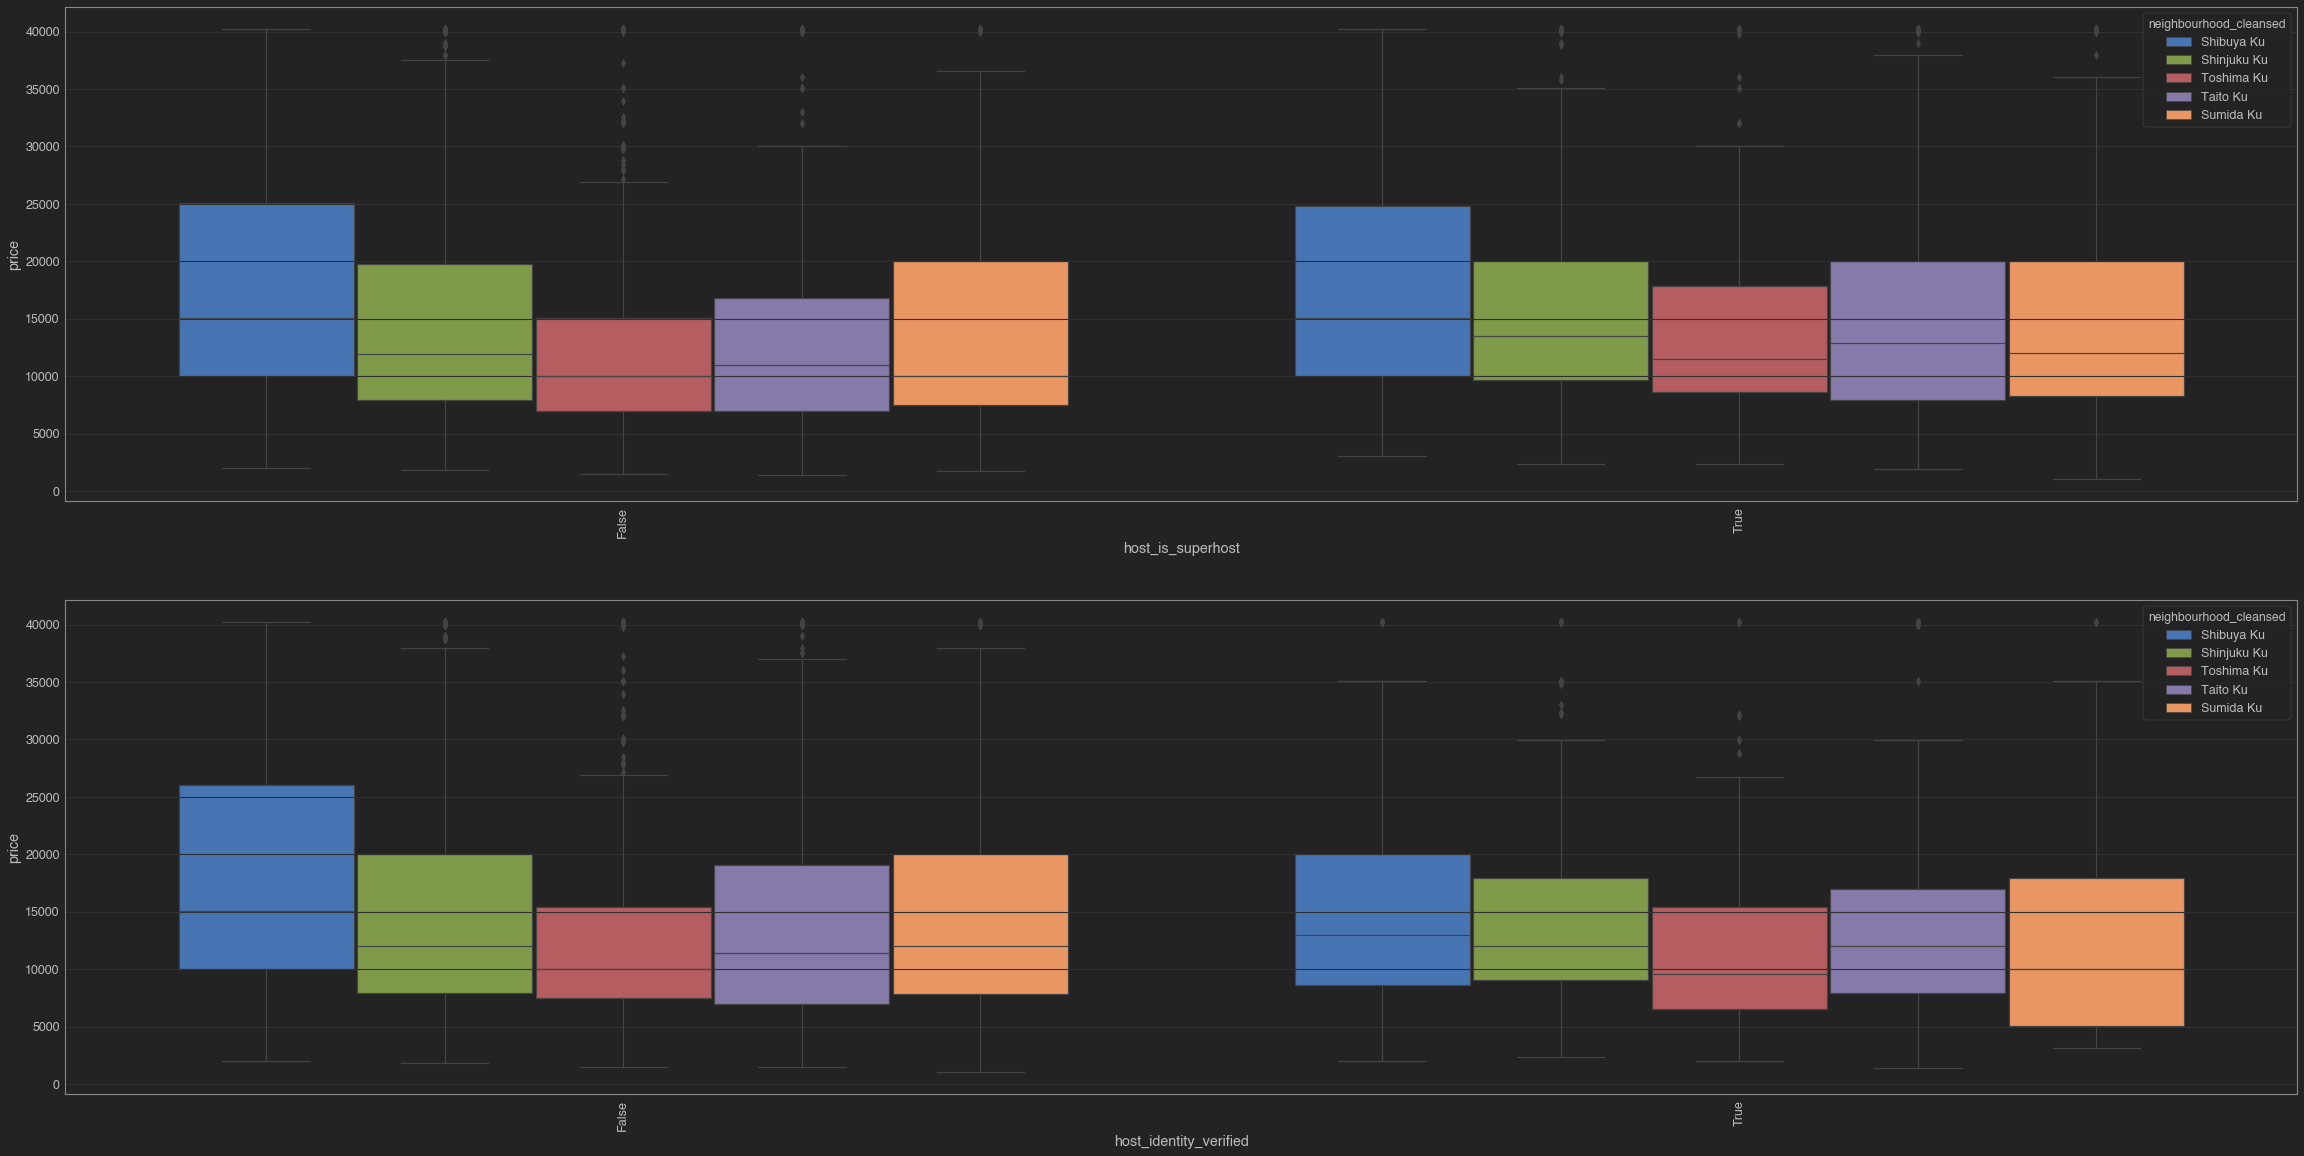

In [111]:
fig, ax = plt.subplots(2, 1, figsize=(40, 20))
for var, subplot in zip(['host_is_superhost','host_identity_verified'], ax.flatten()):
    sns.boxplot(x=var, y='price', data=TOP, hue='neighbourhood_cleansed',ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

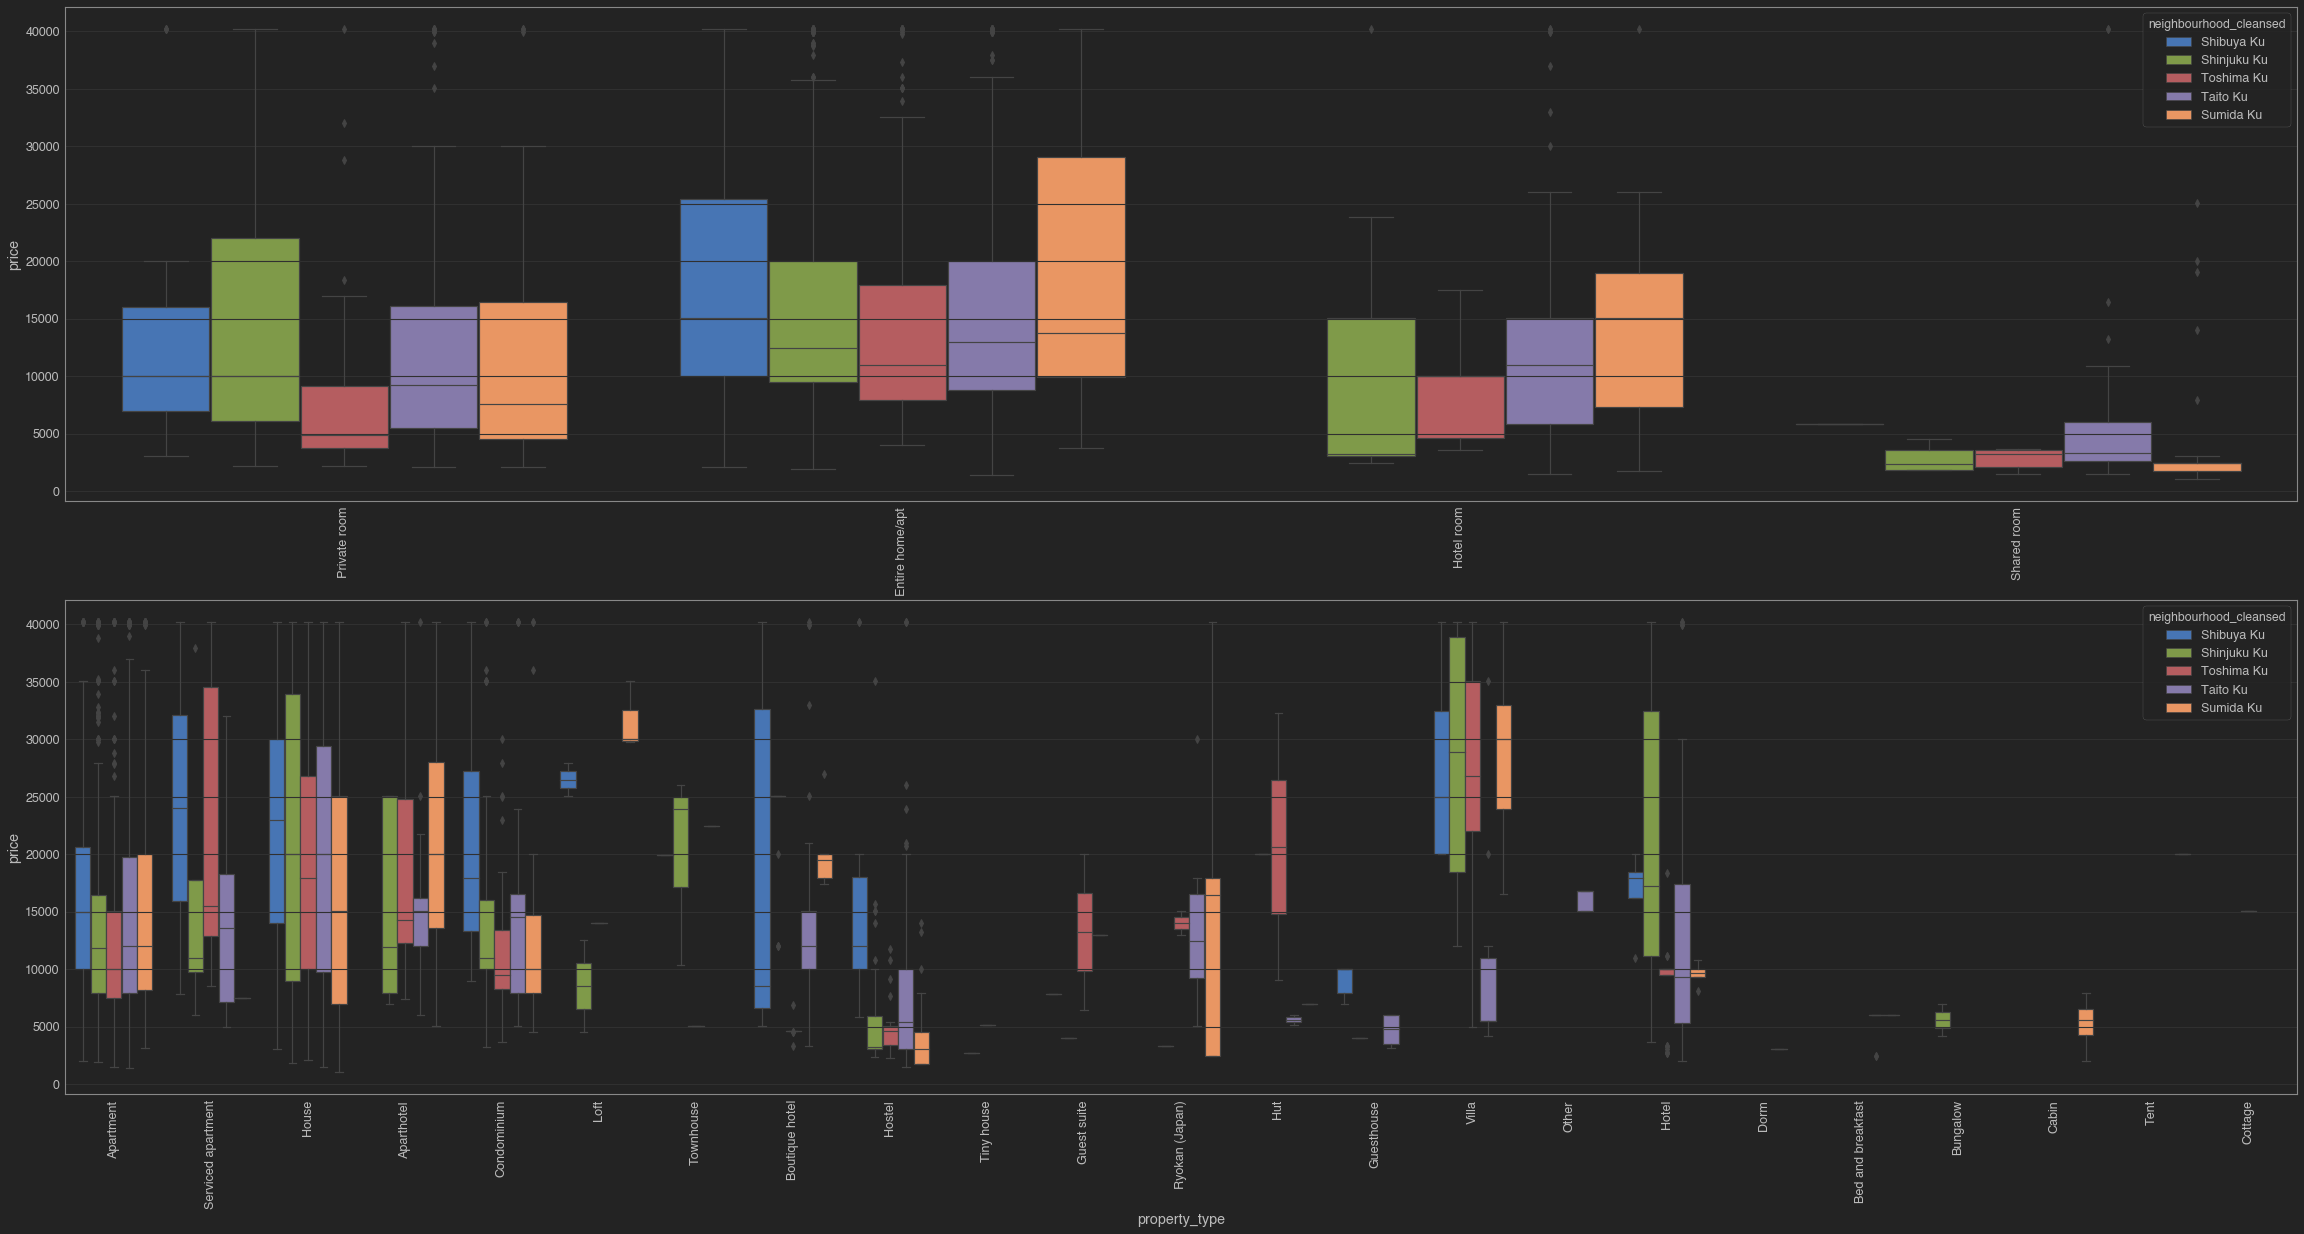

In [112]:
fig, ax = plt.subplots(2, 1, figsize=(40, 20))
for var, subplot in zip(['room_type','property_type'], ax.flatten()):
    sns.boxplot(x=var, y='price', data=TOP, hue='neighbourhood_cleansed',ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)



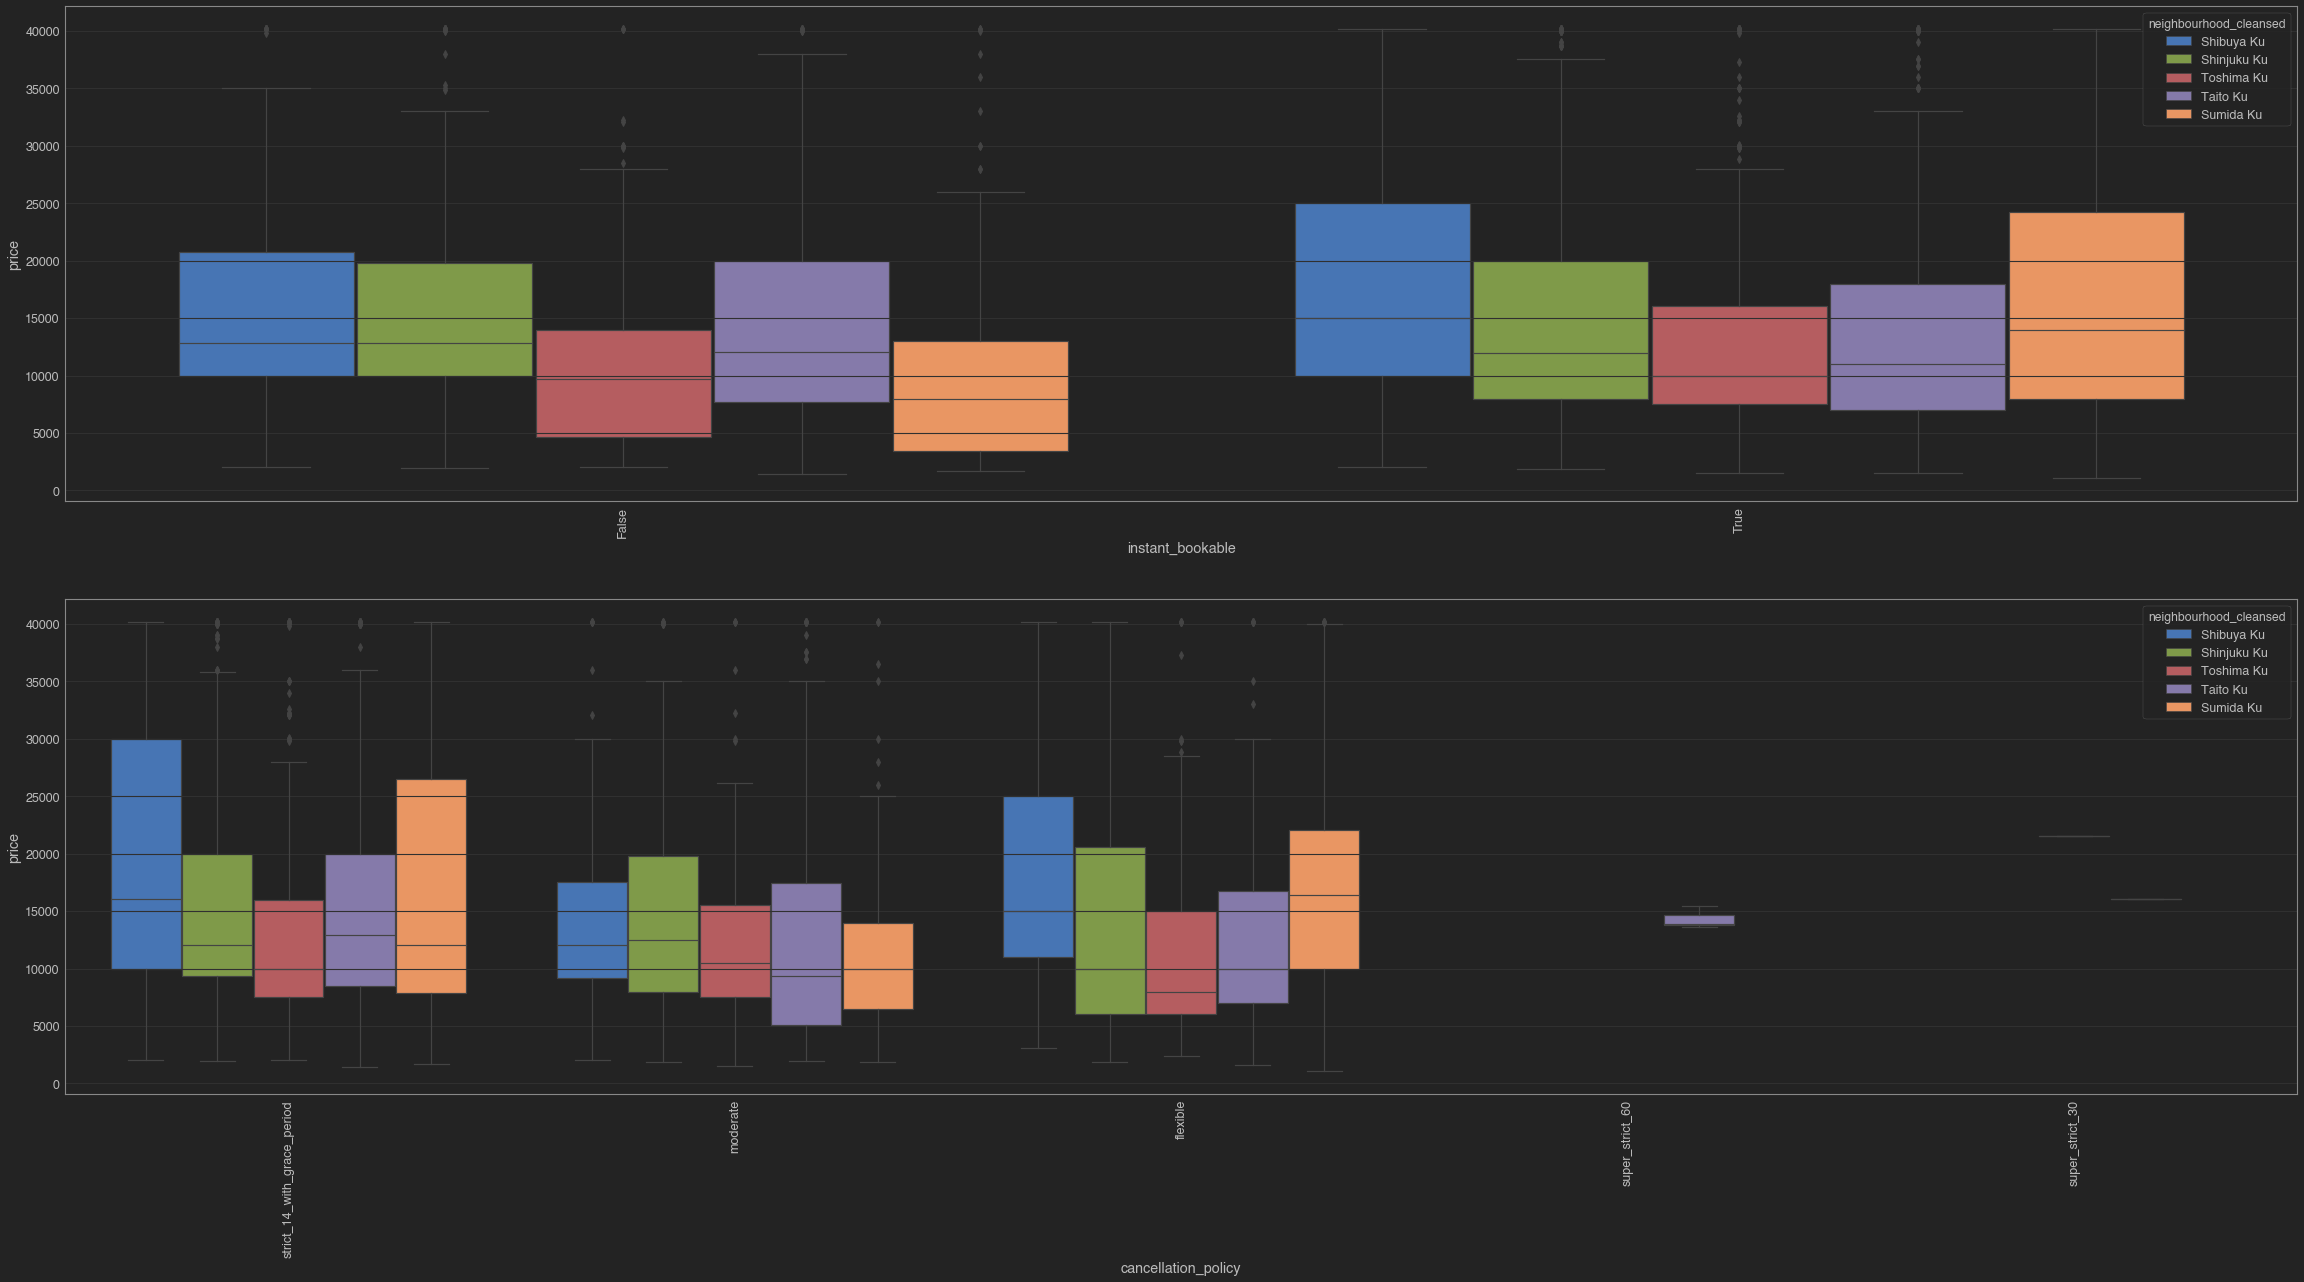

In [113]:
fig, ax = plt.subplots(2, 1, figsize=(40, 20))
for var, subplot in zip(['instant_bookable','cancellation_policy'], ax.flatten()):
    sns.boxplot(x=var, y='price', data=TOP, hue='neighbourhood_cleansed',ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# NUMERICAL

In [114]:
TOP.pivot_table(index=['neighbourhood_cleansed','room_type'], values=['beds','bedrooms','accommodates','guests_included','host_response_rate','host_acceptance_rate','reviews_per_month','review_scores_rating','availability_365','price'],aggfunc=['median'],margins=True)

median                            \
                                       accommodates availability_365 bedrooms   
neighbourhood_cleansed room_type                                                
Shibuya Ku             Entire home/apt            4             90.5      1.0   
                       Private room               2             99.0      1.0   
                       Shared room                1            118.0      1.0   
Shinjuku Ku            Entire home/apt            4             91.0      1.0   
                       Hotel room                 1            171.5      1.0   
                       Private room               2             89.0      1.0   
                       Shared room                1             69.0      1.0   
Sumida Ku              Entire home/apt            4            119.0      1.0   
                       Hotel room                 3            106.0      1.0   
                       Private room               3            117.0      1.0   
                       Shared room                1            115.0      1.0   
Taito Ku               Entire home/apt            5            124.0      1.0   
                       Hotel room                 2            117.0      1.0   
                       Private room               3             93.0      1.0   
                       Shared room                2             90.0      1.0   
Toshima Ku             Entire home/apt            4             94.0      1.0   
                       Hotel room                 3             94.5      1.0   
                       Private room               2             89.5      1.0   
                       Shared room                2             90.0      1.0   
All                                               4             94.0      1.0   

                                                             \
                                       beds guests_included   
neighbourhood_cleansed room_type                              
Shibuya Ku             Entire home/apt  2.0             2.0   
                       Private room     1.0             1.0   
                       Shared room      1.0             1.0   
Shinjuku Ku            Entire home/apt  2.0             2.0   
                       Hotel room       1.0             1.0   
                       Private room     2.0             1.0   
                       Shared room      1.0             1.0   
Sumida Ku              Entire home/apt  2.0             2.0   
                       Hotel room       3.0             1.0   
                       Private room     2.0             1.0   
                       Shared room      1.0             1.0   
Taito Ku               Entire home/apt  3.0             2.0   
                       Hotel room       2.0             1.0   
                       Private room     2.0             1.0   
                       Shared room      2.0             1.0   
Toshima Ku             Entire home/apt  2.0             2.0   
                       Hotel room       1.0             3.0   
                       Private room     1.0             1.0   
                       Shared room      1.0             1.0   
All                                     2.0             2.0   

                                                             \
                                       host_acceptance_rate   
neighbourhood_cleansed room_type                              
Shibuya Ku             Entire home/apt                100.0   
                       Private room                   100.0   
                       Shared room                     97.5   
Shinjuku Ku            Entire home/apt                100.0   
                       Hotel room                      99.5   
                       Private room                   100.0   
                       Shared room                    100.0   
Sumida Ku              Entire home/apt                100.0   
                       Hotel room     

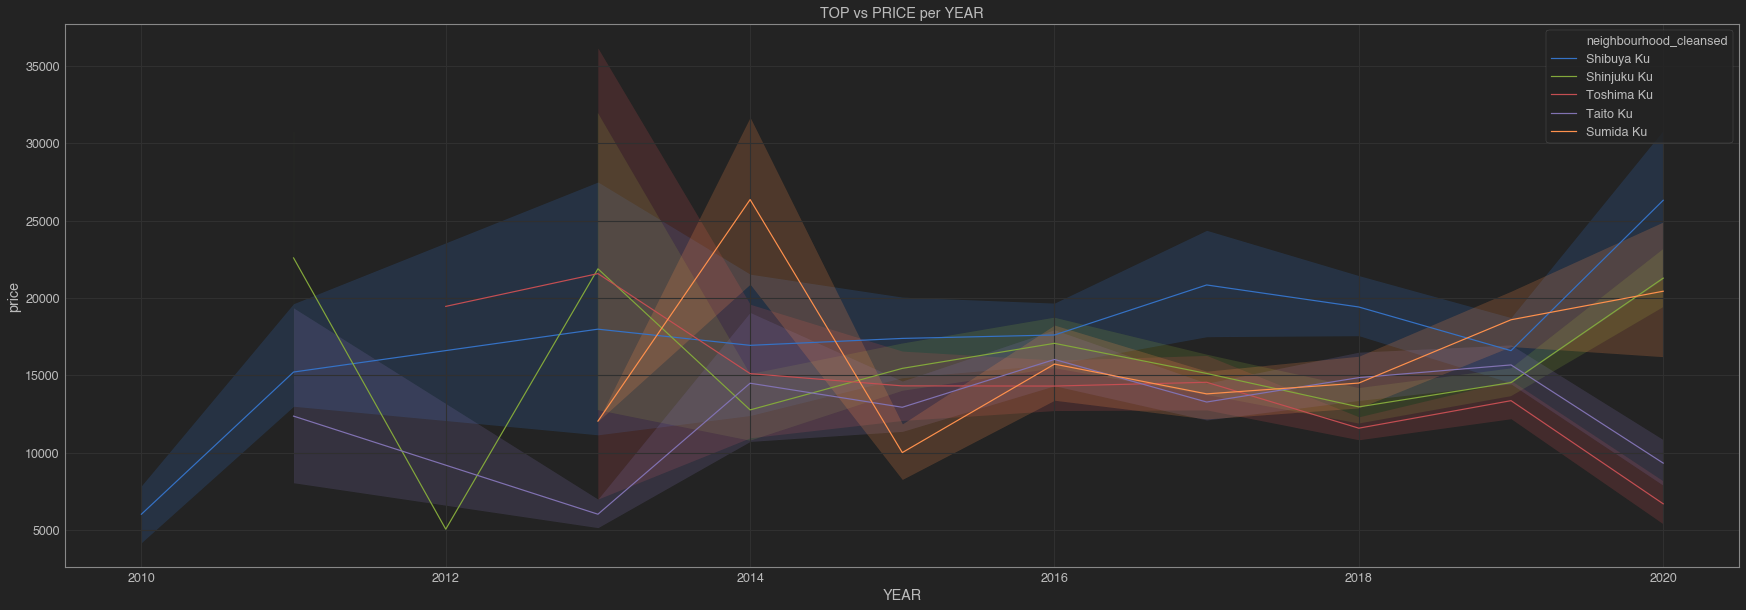

In [115]:
plt.figure(figsize=(30,10))
sns.lineplot(x='year', y='price', data=TOP, hue='neighbourhood_cleansed')
plt.xlabel('YEAR')
plt.title('TOP vs PRICE per YEAR');


In [118]:
TOP.pivot_table(index=['neighbourhood_cleansed','room_type','year'], values='price', aggfunc=['min','max','mean','sum'])

min        max          mean  \
                                               price      price         price   
neighbourhood_cleansed room_type       year                                     
Shibuya Ku             Entire home/apt 2010   7847.0   7847.000   7847.000000   
                                       2011  13007.0  19623.000  15212.333333   
                                       2013  12147.0  40178.875  20290.575000   
                                       2014   3010.0  40178.875  17525.585227   
                                       2015   3010.0  40178.875  19010.216518   
                                       2016   3450.0  40178.875  18235.144737   
                                       2017   3225.0  40178.875  20842.323980   
                                       2018   2042.0  40178.875  19936.844551   
                                       2019   2042.0  40178.875  16595.222074   
                                       2020   3547.0  40178.875  28546.081897   
                       Private room    2010   4192.0   4192.000   4192.000000   
                                       2013   6450.0   6450.000   6450.000000   
                                       2014   3010.0  17952.000  10481.000000   
                                       2015   6020.0  15050.000   8290.600000   
                                       2016   5052.0  17952.000   9091.000000   
                                       2018   9997.0  40178.875  18860.854167   
                                       2020   3117.0  16017.000  10158.250000   
                       Shared room     2018   5805.0   5805.000   5805.000000   
Shinjuku Ku            Entire home/apt 2011   5912.0  35045.000  22590.000000   
                                       2012   5052.0   5052.000   5052.000000   
                                       2013   3977.0  40178.875  21885.291667   
                                       2014   1935.0  40178.875  12841.673387   
                                       2015   3010.0  40178.875  16524.824153   
                                       2016   2150.0  40178.875  17707.220126   
                                       2017   3225.0  40178.875  16137.827614   
                                       2018   2042.0  40178.875  15850.633102   
                                       2019   2795.0  40178.875  14573.618470   
                                       2020   3010.0  40178.875  20364.257576   
                       Hotel room      2015  12040.0  12040.000  12040.000000   
                                       2018   2472.0  23865.000   5625.791667   
                                       2019   3547.0  40178.875  17963.982143   
                       Private room    2014   7955.0   7955.000   7955.000000   
                                       2015   3010.0  35045.000  13349.937500   
                                       2016   5052.0  26015.000  10295.000000   
                                       2017   3977.0  40178.875   9830.355000   
                                       2018   2150.0  27950.000   6832.153846   
                                       2019   3332.0  40178.875  14061.042910   
                                       2020   3870.0  40178.875  22599.211957   
                       Shared room     2015   2365.0   2687.000   2595.000000   
                                       2016   3655.0   3655.000   3655.000000   
                                       2017   3450.0   3547.000   3498.500000   
                                       2018   1827.0   3977.000   2472.000000   
                                       2019   4515.0   4515.000   4515.000000   
Sumida Ku              Entire home/apt 2013  12040.0  12040.000  12040.000000   
                                       2014   5052.0  40178.875  27211.977273   
                                       2015   5052.0  40178.875  14907.708333   
                                       2016   4407.0  40178.875  16639.092105   

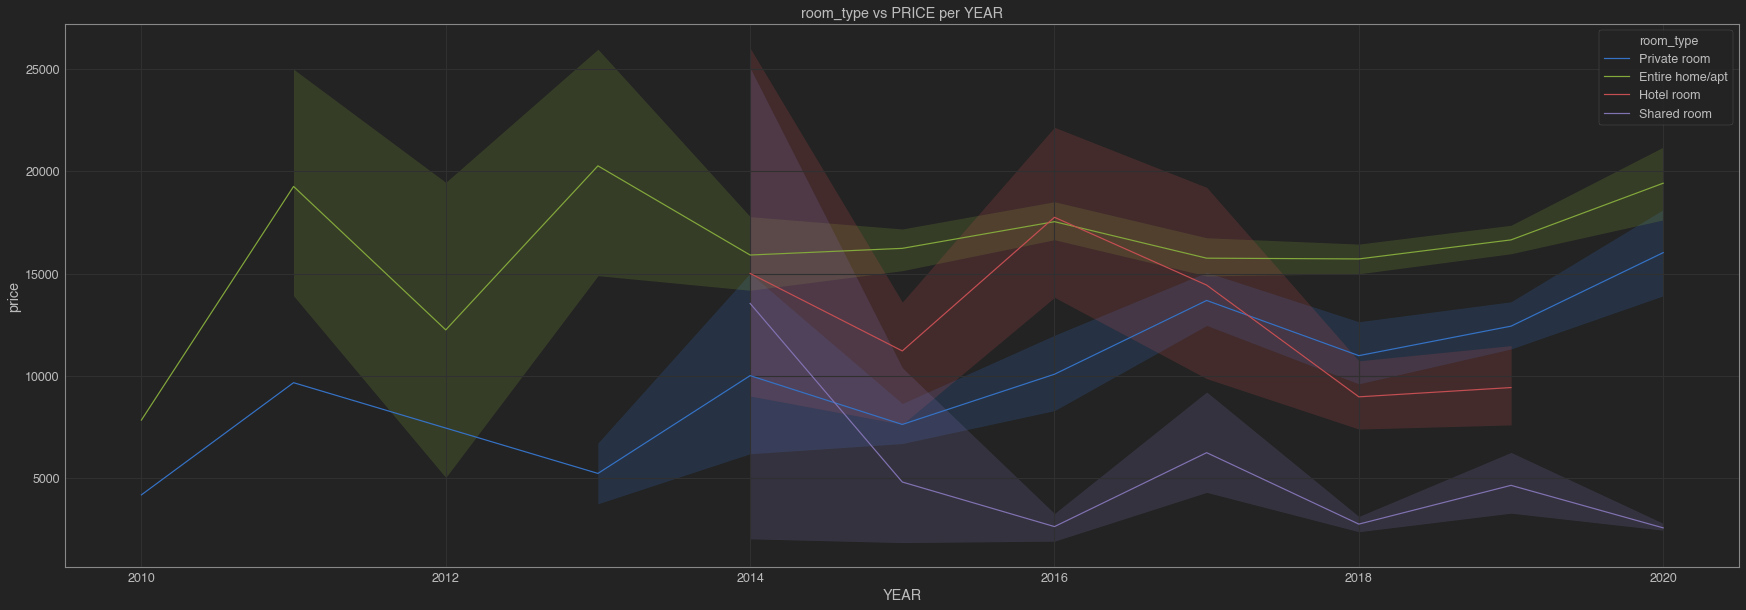

In [119]:
plt.figure(figsize=(30,10))
sns.lineplot(x='year', y='price', data=TOP, hue='room_type')
plt.xlabel('YEAR')
plt.title('room_type vs PRICE per YEAR')
plt.savefig('Room Type vs Price per Year.png');

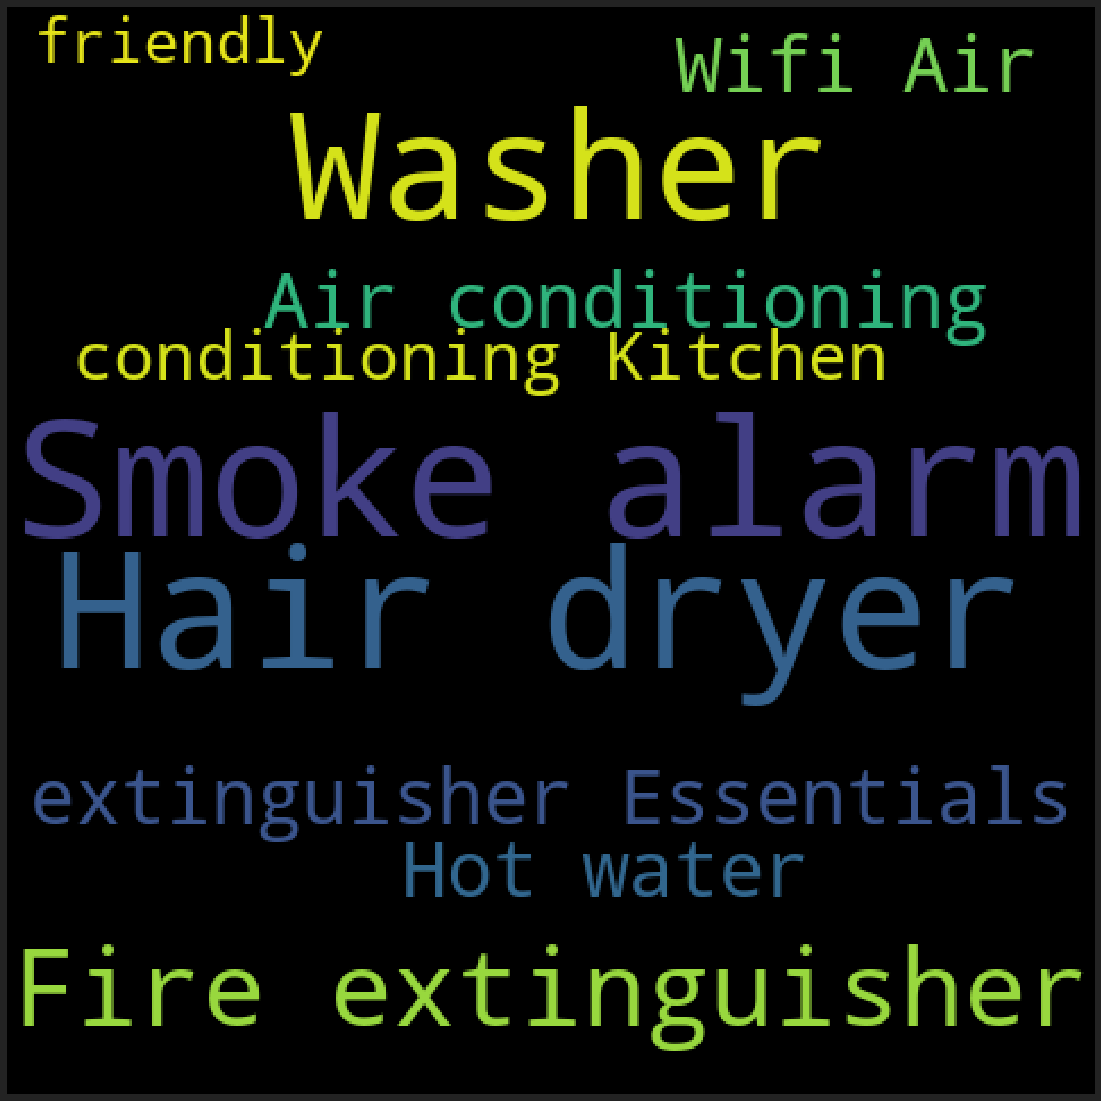

<Figure size 460.8x403.2 with 0 Axes>

In [143]:
text = TOP['amenities'].values
amenities = WordCloud(width=480, height=480, max_words=10, colormap='viridis',background_color="black").generate(str(text))
plt.figure(figsize=(20,20))
plt.imshow(amenities)
plt.axis("off")
plt.show()
plt.savefig('Amenities.jpg')

 # KESIMPULAN

Data Distribution

Pada dataset Airbnb Tokyo ini terdapat 16 kolom numerical di dataset ini dan 11 kolom categorical. Berdasarkan uji skewness sebelumnya, dapat diihat bahwa banyak data yang tidak terdistribusi normal. Berdasarkan data ini banyak skewness positif yang menandakan sebagian distribusi berada di sebelah kiri atau nilai yang kecil. Untuk kolom Price sendiri hal ini menandakan bahwa banyak harga sewa yang berhasil di rent dibawah rata-rata. Tentu buruk, karena hal ini juga menandakan banyak outliers yang membuat hal ini terjadi. Hal tersebut pun semakin jelas pada uji Kurtosis, banyak ditemukan derajat keruncingan (tailedness) yang besar/melebihi 3. Kurtosis yang tinggi menandakan banyak outliers. Bila kita ambil contoh tadi, di bedrooms terdapat 2 airbnb yang memiliki angka 50 yang mana berlokasi di neighbourhood yang sama yaitu Arakawa Ku. Setelah ditelaah lebih dalam kedua Airbnb/listing ini benar adanya atau bukan kesalahan ketik/human error. Airbnb ini pun dimiliki oleh host yang sama bernama Niiyama. Airbnb ini sudah disewakan sudah cukup lama dan berfokus kepada komunitas-komunitas yang ingin berlibur. Dapat dilihat dari review-reviewnya, penyewa biasanya berasal dari komunitas kantor, keluarga, komunitas internasional, dan lain-lain. Selain data yang tidak terdistribusi dengan normal, ada beberapa keunikan yang saya temukan dari distribusi numerical nnya yaitu frekuensi terbanyak kebanyakkan berada di kisaran nilai-nilai yang kecil. kecuali untuk kolom-kolom penilaian seperti rate dan rating yang menandakan keseluruhan Airbnb memiliki rating yang baik. Lalu dengan jenis kurtosis positif ini, dapat ditarik kesimpulan juga bahwa nilai modus lebih kecil dibandingkan nilai mean dan median nya. Hal ini tidak baik karena akan menyebabkan kesalahan terhadap penarikan kesimpulan. Lalu dilakukan handling dengan Winsorizer. Karena metode ini terbilang aman dibandingkan membuang outliers yang jumlahnya sangat besar berdasarkan uji kurtosis yang membuat sangat mudah hilangnya informasi.

Analisis

Dari peta persebaran dapat dilihat bahwa persebaran angka Airbnb memang terpusat di tengah kota yang cenderung dekat dengan Stadium-Stadium yang akan digunakan di 2020 Olympics . Berdasarkan angka kasat mata, Shinjuku merupakan area yang paling banyak memiliki Airbnb yang disewakan. Setelah sebelumnya melihat angka-angkanya berdasarkan cluster, saya juga memetakan lagi dengan Heatmap dan terlihat Shinjuku memiliki density Airbnb terbesar. Setelah ditelaah, Shinjuku memang dijuluki salah satu kota teramai di Tokyo. Terlebih lagi Stasiun di Shinjuku ini atau Stasiun Shinjuku merupakan stasiun tersibuk di dunia sejak tahun 2007. untuk setiap harinya dengan berbagai line baik bawah tanah , maupun biasa terdapat 3.64 juta orang perhari. Berdasarkan data diatas, dapat dilihat  host_is_superhost f nya kok lebih besar? jelek semua dong? tentu tidak, jd superhost ini diberikan oleh airbnb kepada host yang mana memberikan contoh teladan untuk host yang lain dan memberikan experience yang lebih baik kepada guest nya. Apa sisanya berarti jelek? tentu engga, jd kayak pemberian mvp atau murid teladan. seluruh host ini bisa dibilang sama-sama berjuang disini tp hanya beberapa aja yg dipilih. Dan jg badge superhost ini tidak tetap jg krn akan diperbaharui terus selama 4 tahun sekali menurut situs resmi airbnb. Lalu belum dilakukan bivariate dengan Price sehingga tidak dapat disimpulkan hanya dengan melihat jumlahnya saja. Untuk host_identity_verified hal ini juga terasa janggal karena banyak yg ga terverifikasi? apakah menandakan banyak yang ilegal? jd menurut situs airbnb nya. ada yang disebut host_verifications yang berbentuk list tentang bagaimana cara host memverifikasi akunnya. ada by email, government id, facebook dll. Lalu setelah disetujui, tentu mereka akan dpt balasan dari airbnb untuk mengklik verifikasi, disinilah banyak yang tidak memperdulikan hal tsb. Akan lebih jelas kegunaannya nanti setelah dilakukan uji bivariate. Untuk kolom Room Type Entire home/apt merupakan yang paling banyak, hal ini terjadi karena tipe ini dinilai sangat cocok untuk orang jepang dan turis yang menginap yang membutuhkan ketenangan. Dimana ruangan dengan tipe ini memiliki seluruh tempat untuk diri mereka sendiri tanpa harus share dengan orang lain atau pemilik rumah. Yang biasanya mencakup kamar tidur, kamar mandi, dan dapur. Untuk Property Type, Property jenis apartment paling banyak digunakan untuk pengusaha Airbnb karena memiliki beberapa kemudahan untuk yang menginap dan turis yang ingin tinggal dalam jangka waktu pendek. Cancelation policies, pembatalan yang selain tiga teratas terasa sangat kontras, sehingga nantinya akan dilihat lebih dalam. Dari segi verifikasi terhadap host, ada beberapa top yang digunakan host untuk memverifikasi akun mereka. Ada istilah yang baru disini yaitu "Jumio". jumio adalah identity verifications berbasis AI yang mana dipercaya dapat mengurangi kecurangan, kebohongan identitas dll. Dapat disimpulkan bahwa untuk menjadi host Airbnb, harus memiliki persyaratan-persyaratan tersebut. Tentu alasannya adalah untuk keamanan dan agar tidak terjadi kebohongan-kebohongan terkait identitas yang dapat merugikan guest nantinya. Untuk data berdasarkan tipe ruangan sendiri dapat dilihat tipe Entire Home/Apt paling banyak masih terletak di Shinjuku, Untuk Private Room,Hotel, dan Shared Room keseluruhan banyak di Taito Ku. Setelah ditelaah ternyata Taito ini merupakan area yang terkenal akan wisata budaya nya salah satunya Sensoji Temple di asakusa.

# Mendapatkan analisis data Airbnb yang legal berdasarkan aturan "Minpaku Law" mengenai maksimum hari dapat beroperasinya sebuah Airbnb pertahun.

Terdapat 7526 airbnb yang legal atau mematuhi peraturan terkait Minpaku Law tentang 180 hari beroperasinya sebuah Airbnb. Selanjutnya akan dilakukan analisis lebih dalam terkait Areanya, Neighbourhood, Room Type dan Spesifikasi lainnya. Berdasarkan pemetaan data yang legal banyak terlihat di lokasi dekat dengan Pusat kota. Hal ini makin membuat saya mengerti, bahwa dampaknya sangat terlihat setelah sebelumnya persebaran sangat luas akan tetapi sekarang hanya tersisa sedikit saja. Hal ini tepatnya terjadi pada tahun 2018 pertengahan menuju akhir. Berdasarkan berita-berita pun, dampak ini paling terasa di bulan ke 9 dimana ribuan yang dibatalkan hampir 50% menurut sumber terpercaya. Dari sebelumnya 55 tersisa 51 area yang mana tidak ada area adachi,koganei shi,ogasawara,akiruno shi disini. Setelah ditelaah melalui riset, tidak terlihat penyebab yang jelas tentang hal tersebut akan tetapi berdasarkan uji value_counts sebelumnya, area tersebut memang termasuk area tersedikit untuk jumlah Airbnb di Tokyo. Dari penelusuran wikipedia ditemukan ke empat area ini merupakan area yang jauh dari pusat kota 40 hingga 50 km jaraknya. Dan juga akses untuk kesana sangatlah sedikit yaitu hanya kereta dengan sedikit line(jalur/jurusan) dan tol saja. Untuk type ruangan sendiri, area Shinjuku di airbnb legal ini masih menjadi yang pertama untuk Entire home/Apt, dan Taito Untuk Private Room,Shared Room dan Hotel room. Sisanya tidak terlalu banyak perubahan hanya nilainya saja yang berkurang. Untuk property type sendiri juga sama, apartment masih yang nomor 1, yang mana banyak bertipe ruangan Entire home/apt dengan jumlah 3964 dan terbanyak di Shinjuku dengan total 1008,untuk private room ada kesamaan untuk property tipe apartment(450,Shinjuku 66) dan house(450,Shinjuku 39). Lalu untuk shared dan hotel room paling banyak di property hostel. Terdapat 146 shared room dan terbanyak di Taito dengan 45. Untuk hotel room berjumlah 172 dan terbanyak di Chuo Ku. Chuo akan saya bahas disini setelah dua yang lain sudah sering dibahas sebelumnya. Menurut sumber Area Chuo ini merupakan area yang terkenal dengan perkantoran perusahaan-perusahaan berkelas Internasional. Salah satunya IBM,McKinsey & Company, Astellas Pharma, a global pharmaceutical company, KOSÉ perusahaan kosmetik internasional. Dan juga perusahaan Jepang yang sudah mendunia seperti Kao, Ajinomoto. Hal ini mungkin sangat sebanding dengan banyaknya jumlah hotel disana untuk menampung tamu-tamu asing di area tersebut. Perkembangan harga airbnb legal ini sangat besar untuk Entire home/Apt. Dimana jenis ruangan lain banyak yang turun di 2018 ataupun stagnan, Entire home/Apt malah cenderung naik meskipun tidak banyak diangka 18000 yen ke 20000 yen. Lalu ada hal baru lagi yang kita dapatkan disini bahwa, Hotel Room berhenti tahun 2019. Setelah ditelaah ini terjadi karena banyak hotel yang memiliki bintang kecil (3 bintarng) memasang harga yang cukup mahal. Terlebih lagi disebutkan, kualitas dan amenities nya pun kurang apabila dibandingkan dengan Airbnb. Lalu Airbnb biasa memiliki experience lain yang ditawarkan Host, sedangkan menginap di hotel akan memiliki experience yang sama dimana pun di dunia. Jadi, meskipun sempat naik di 2016 akhirnya hotel room berusaha menyamakan price nya di tahun 2018 dan karena tidak berhasil untuk dapat untung akhirnya menyelesaikan kerja sama nya dengan airbnb di 2019 tepatnya awal 2019.

# Mendapatkan analisis tentang perkembangan untuk Airbnb yang berlokasi dekat dengan venue yang akan dipakai pada 2020 Olympics

Disini saya membuat kolom baru bernama posisi, berdasarkan kedekatan posisi neighbourhood terhadap lokasi Stadium. Dibagi menjadi tiga agar lebih mudah mengerti, yaitu dekat, menengah dan jauh. Jumlah yang dekat lebih banyak sedikit dibandingkan yang lain. Berdasarkan data diatas, dapat dilihat bahwa Airbnb yang berlokasi dekat dengan Stadium memiliki kenaikkan jumlah yang sangat pesat pertahunnya. Untuk 3 tahun terakhir 2017,2018,2019 jumlahnya terus naik 857,1548,1800. Dan untuk 2020 yang mana datanya cuma sampai bulan ke 4 sudah mencapai 510. atau 1/3 dari tahun 2019. Lalu untuk rata-rata harganya pun untuk yang berlokasi dekat naik terus melonjak setiap tahunnya akan tetapi dua tahun terakhir yaitu 2019-2020 awal naiknnya paling kontras yaitu 15257 ke 18669. Yaitu sebesar 477680 apabila di rupiah kan. Untuk akomodasi sendiri ditahun 2020 untuk jarak yang dekat naik menjadi 8144.715909 setelah sebelumnya 7483.630068 di tahun 2019/ tahun pengumuman Tokyo menjadi Host 2020 Olympics dan 3850.669118 di tahun 2018. Kenaikkan nya 2 hampir kali lipat. Untuk bedrooms dari tahun 2019 12953.239739 untuk satu kamar, naik menjadi 16368.781250. Untuk area sendiri rata-rata harga termahal sekarang adalah Shibuya dengan 26317.253788. Siapa yang tidak tahu Shibuya? Shibuya Crossing adalah tempat penyebrangan terpadat di dunia, dijuluki sebagai area tak pernah tidur 24 jam non stop. Untuk data top 5 Shibuya Ku', 'Shinjuku Ku', 'Toshima Ku', 'Taito Ku', 'Sumida Ku juga tidak kalah menarik. Dimana Shibuya merupakan area dengan rata-rata harga termahal.